In [1]:

from __future__ import print_function

import datetime
import numpy as np
import pandas as pd

from Backtest.strategy import Strategy
from Backtest.event import SignalEvent
from Backtest.event import EventType
from Backtest.backtest import Backtest
from Backtest.data import JSONDataHandler
import queue



class MACDStrategy(Strategy):
    def __init__(self, bars, events, suggested_quantity = 1,
                 short_window = 10, long_window = 40):
        self.bars = bars
        self.symbol_list = self.bars.tickers
        self.events = events
        self.suggested_quantity = suggested_quantity
        self.holdinds = self._calculate_initial_holdings()

        self.short_window = short_window
        self.long_window = long_window
        
        self.short_ma = pd.Series(0.0, index = bars.times)
        self.long_ma = pd.Series(0.0, index = bars.times)

    def _calculate_initial_holdings(self):
        holdings = {}
        for s in self.symbol_list:
            holdings[s] = "EMPTY"
        return holdings

    def generate_signals(self, event):
        if event.type == EventType.MARKET:
            ticker = event.ticker
            bars = self.bars.get_latest_bars_values(
                ticker, "close", N=self.long_window
            )
            bar_date = event.timestamp
            if bars is not None and bars != []:
                short_ma = np.mean(bars[-self.short_window:])
                long_ma  = np.mean(bars[-self.long_window:])
                
                self.short_ma[bar_date] = short_ma
                self.long_ma[bar_date] = long_ma

                if short_ma > long_ma and self.holdinds[ticker] == "EMPTY":
                    print("LONG: %s" % bar_date)
                    signal = SignalEvent(ticker, "LONG", self.suggested_quantity)
                    self.events.put(signal)
                    self.holdinds[ticker] = "HOLD"
                elif short_ma < long_ma and self.holdinds[ticker] == "HOLD":
                    print("SHORT: %s" % bar_date)
                    signal = SignalEvent(ticker, "SHORT", self.suggested_quantity)
                    self.events.put(signal)
                    self.holdinds[ticker] = "EMPTY"


In [2]:
def run(config, short_window = 10, long_window = 40):
    events_queue = queue.Queue()
    data_handler = JSONDataHandler(
        config['csv_dir'], config['freq'], events_queue, config['tickers'],
        start_date=config['start_date'], end_date=config['end_date']
    )
    strategy = MACDStrategy(data_handler, events_queue, suggested_quantity = 1,
                            short_window = short_window, long_window = long_window)
    
    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading(config)
    return backtest, results

In [3]:

config = {
    "csv_dir": "F:/Python/backtest/backtest/ethusdt-trade.csv.2018-07-25.formatted",
    "out_dir": "C:\\Users\\user\\out\\MACDStrategy\\",
    "title": "MACDStrategy",
    "save_plot": True,
    "save_tradelog": True,
    "start_date": pd.Timestamp("2018-07-25T00:00:00", tz = "UTC"),
    "end_date": pd.Timestamp("2018-07-25T06:20:00", tz = "UTC"),
    "equity": 500.0,
    "freq": 1,      # min
    "tickers": ['ETHUSDT']
}

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:06:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:55:00+00:00


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


SHORT: 2018-07-25 02:09:00+00:00
LONG: 2018-07-25 03:45:00+00:00
SHORT: 2018-07-25 06:07:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.1910390588
Max Drawdown: 1.1278202964
Max Drawdown Duration: 271
Total Returns: 0.0023840000


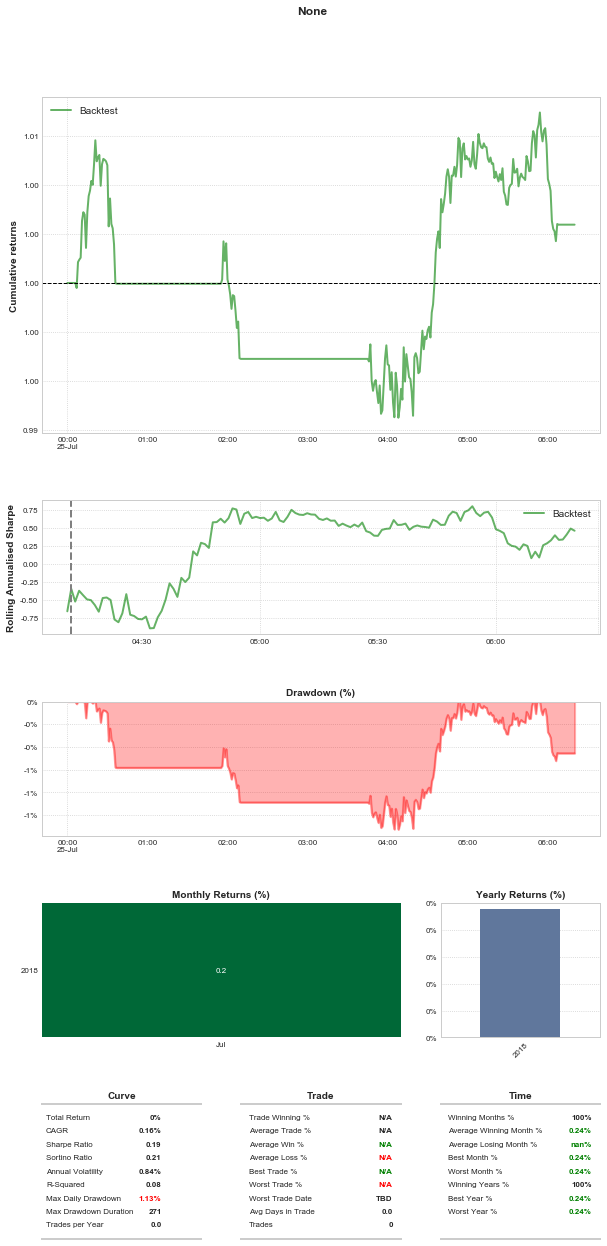

In [4]:
backtest, results = run(config, short_window = 6, long_window = 120)

In [83]:
results.keys()

dict_keys(['returns', 'equity', 'rolling_sharpe', 'cum_returns', 'drawdown', 'max_drawdown', 'max_drawdown_duration', 'sharpe', 'positions'])

In [4]:
interval = np.array([5, 10, 12, 26, 30, 35, 45, 60, 72, 84, 96, 120, 252])
interval

array([  5,  10,  12,  26,  30,  35,  45,  60,  72,  84,  96, 120, 252])

In [5]:
ans = []

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:28:00+00:00
LONG: 2018-07-25 00:45:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 01:07:00+00:00
SHORT: 2018-07-25 01:29:00+00:00
LONG: 2018-07-25 01:47:00+00:00
SHORT: 2018-07-25 02:03:00+00:00
LONG: 2018-07-25 02:28:00+00:00
SHORT: 2018-07-25 02:36:00+00:00
LONG: 2018-07-25 02:37:00+00:00
SHORT: 2018-07-25 02:40:00+00:00
LONG: 2018-07-25 02:43:00+00:00
SHORT: 2018-07-25 02:44:00+00:00
LONG: 2018-07-25 02:51:00+00:00
SHORT: 2018-07-25 02:53:00+00:00
LONG: 2018-07-25 02:59:00+00:00
SHORT: 2018-07-25 03:01:00+00:00
LONG: 2018-07-25 03:16:00+00:00
SHORT: 2018-07-25 03:22:00+00:00


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


LONG: 2018-07-25 03:23:00+00:00
SHORT: 2018-07-25 03:24:00+00:00
LONG: 2018-07-25 03:27:00+00:00
SHORT: 2018-07-25 03:30:00+00:00
LONG: 2018-07-25 03:35:00+00:00
SHORT: 2018-07-25 03:52:00+00:00
LONG: 2018-07-25 03:59:00+00:00
SHORT: 2018-07-25 04:05:00+00:00
LONG: 2018-07-25 04:13:00+00:00
SHORT: 2018-07-25 04:19:00+00:00
LONG: 2018-07-25 04:23:00+00:00
SHORT: 2018-07-25 05:01:00+00:00
LONG: 2018-07-25 05:07:00+00:00
SHORT: 2018-07-25 05:16:00+00:00
LONG: 2018-07-25 05:34:00+00:00
SHORT: 2018-07-25 05:41:00+00:00
LONG: 2018-07-25 05:44:00+00:00
SHORT: 2018-07-25 05:59:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6638088269
Max Drawdown: 0.8066388921
Max Drawdown Duration: 166
Total Returns: 0.0080920000


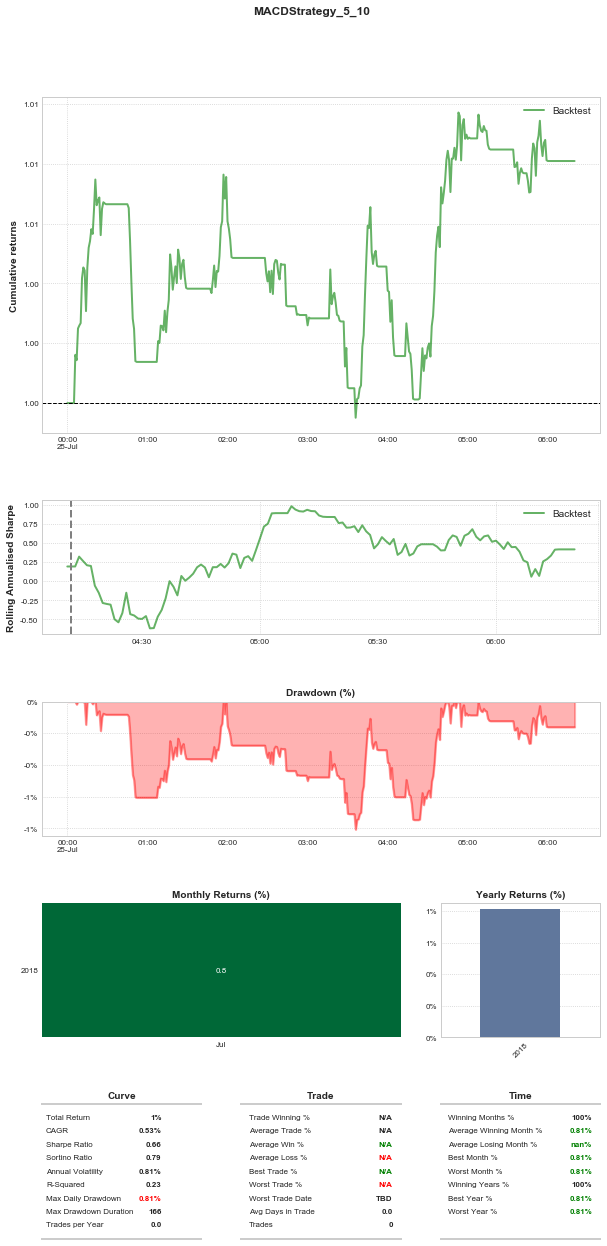

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:29:00+00:00
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:31:00+00:00
LONG: 2018-07-25 00:46:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 01:08:00+00:00
SHORT: 2018-07-25 01:29:00+00:00
LONG: 2018-07-25 01:47:00+00:00
SHORT: 2018-07-25 02:04:00+00:00
LONG: 2018-07-25 02:29:00+00:00
SHORT: 2018-07-25 02:38:00+00:00
LONG: 2018-07-25 02:39:00+00:00
SHORT: 2018-07-25 02:40:00+00:00
LONG: 2018-07-25 02:43:00+00:00
SHORT: 2018-07-25 02:45:00+00:00
LONG: 2018-07-25 03:17:00+00:00
SHORT: 2018-07-25 03:24:00+00:00
LONG: 2018-07-25 03:26:00+00:00
SHORT: 2018-07-25 03:28:00+00:00
LONG: 2018-07-25 03:29:00+00:00
SHORT: 2018-07-25 03:30:00+00:00
LONG: 2018-07-25 03:35:00+00:00
SHORT: 2018-07-25 03:53:00+00:00
LONG: 2018-07-25 03:59:00+00:00
SHORT:

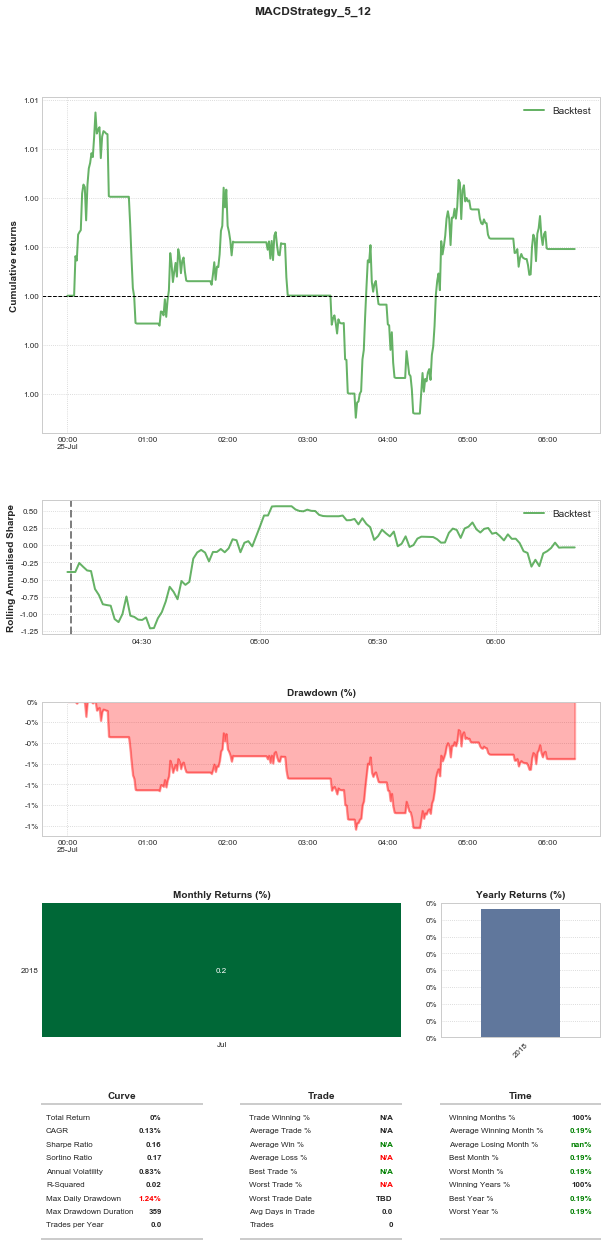

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:33:00+00:00
LONG: 2018-07-25 01:13:00+00:00
SHORT: 2018-07-25 01:34:00+00:00
LONG: 2018-07-25 01:49:00+00:00
SHORT: 2018-07-25 02:09:00+00:00
LONG: 2018-07-25 02:37:00+00:00
SHORT: 2018-07-25 02:46:00+00:00
LONG: 2018-07-25 03:27:00+00:00
SHORT: 2018-07-25 03:30:00+00:00
LONG: 2018-07-25 03:35:00+00:00
SHORT: 2018-07-25 04:06:00+00:00
LONG: 2018-07-25 04:13:00+00:00
SHORT: 2018-07-25 04:19:00+00:00
LONG: 2018-07-25 04:21:00+00:00
SHORT: 2018-07-25 05:17:00+00:00
LONG: 2018-07-25 05:37:00+00:00
SHORT: 2018-07-25 05:42:00+00:00
LONG: 2018-07-25 05:43:00+00:00
SHORT: 2018-07-25 06:02:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8158811715
Max Drawdown: 0.9021750989
Max Drawdown Duration: 160


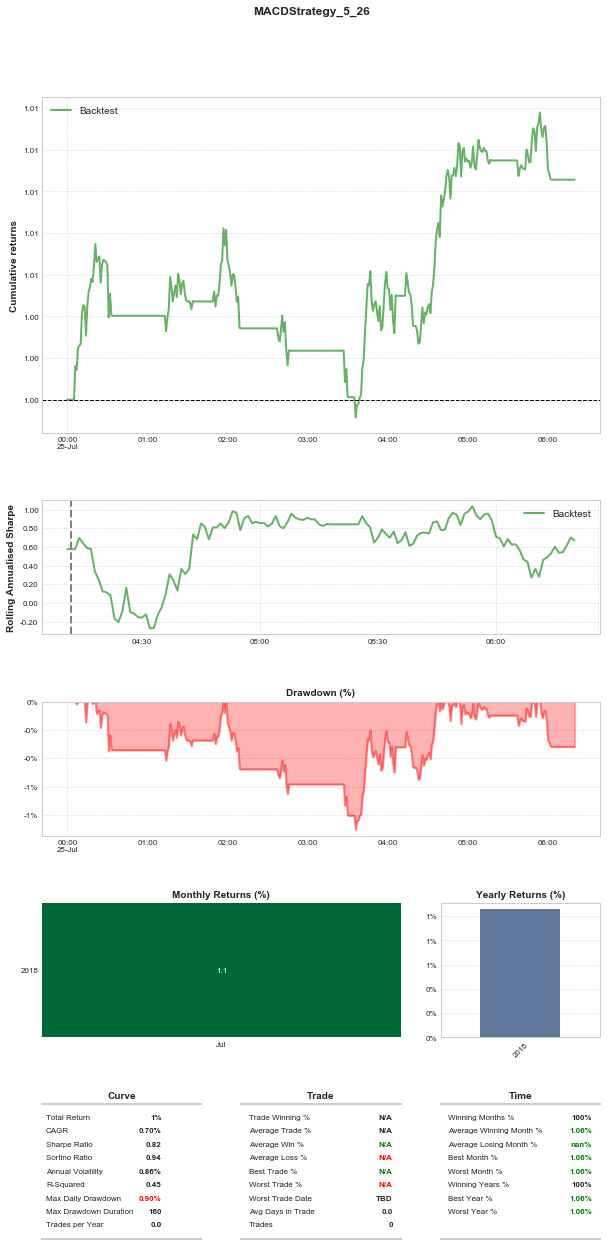

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:34:00+00:00
LONG: 2018-07-25 01:15:00+00:00
SHORT: 2018-07-25 01:36:00+00:00
LONG: 2018-07-25 01:49:00+00:00
SHORT: 2018-07-25 02:09:00+00:00
LONG: 2018-07-25 02:41:00+00:00
SHORT: 2018-07-25 02:46:00+00:00
LONG: 2018-07-25 03:35:00+00:00
SHORT: 2018-07-25 04:08:00+00:00
LONG: 2018-07-25 04:14:00+00:00
SHORT: 2018-07-25 04:19:00+00:00
LONG: 2018-07-25 04:20:00+00:00
SHORT: 2018-07-25 05:18:00+00:00
LONG: 2018-07-25 05:44:00+00:00
SHORT: 2018-07-25 06:02:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6229764231
Max Drawdown: 0.7448212885
Max Drawdown Duration: 162
Total Returns: 0.0078040000


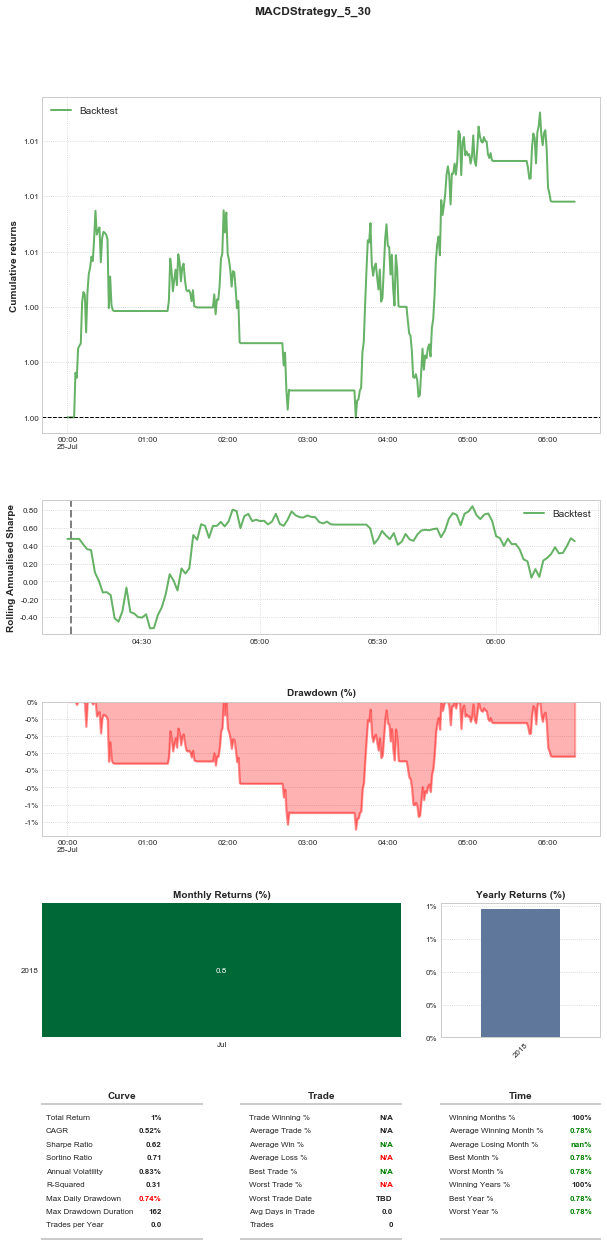

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:35:00+00:00
LONG: 2018-07-25 01:17:00+00:00
SHORT: 2018-07-25 01:39:00+00:00
LONG: 2018-07-25 01:49:00+00:00
SHORT: 2018-07-25 02:10:00+00:00
LONG: 2018-07-25 03:35:00+00:00
SHORT: 2018-07-25 04:19:00+00:00
LONG: 2018-07-25 04:21:00+00:00
SHORT: 2018-07-25 05:19:00+00:00
LONG: 2018-07-25 05:45:00+00:00
SHORT: 2018-07-25 06:02:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6114446004
Max Drawdown: 1.0060805539
Max Drawdown Duration: 258
Total Returns: 0.0078880000


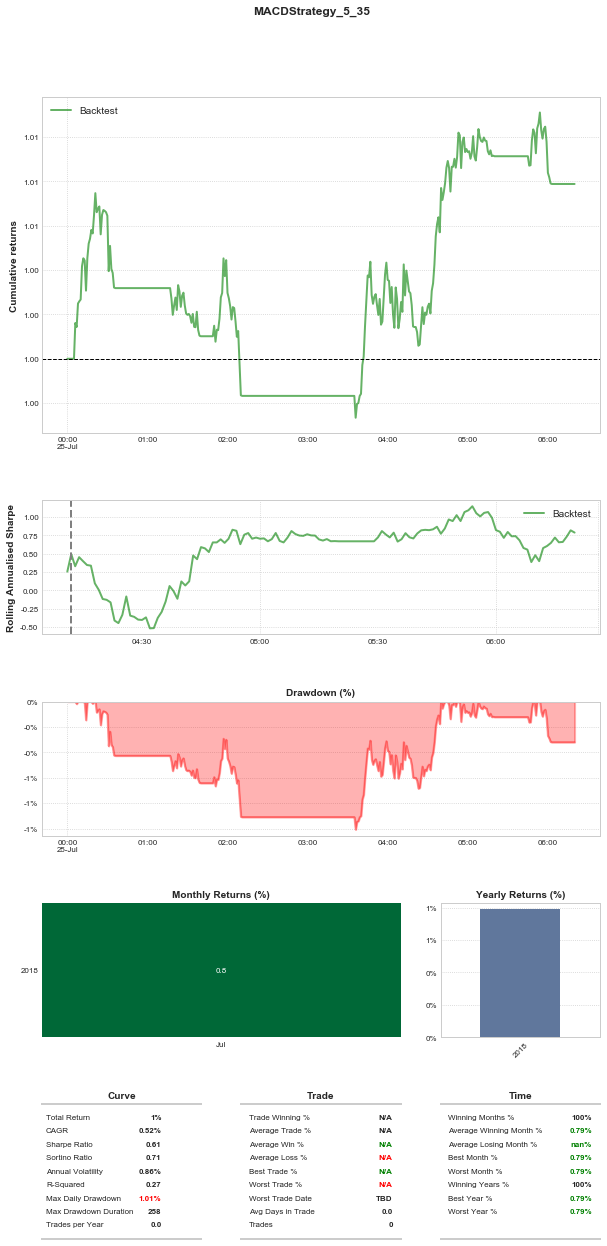

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:18:00+00:00
SHORT: 2018-07-25 01:45:00+00:00
LONG: 2018-07-25 01:47:00+00:00
SHORT: 2018-07-25 02:10:00+00:00
LONG: 2018-07-25 03:37:00+00:00
SHORT: 2018-07-25 05:22:00+00:00
LONG: 2018-07-25 05:47:00+00:00
SHORT: 2018-07-25 06:03:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6183633056
Max Drawdown: 1.0154108195
Max Drawdown Duration: 255
Total Returns: 0.0083400000


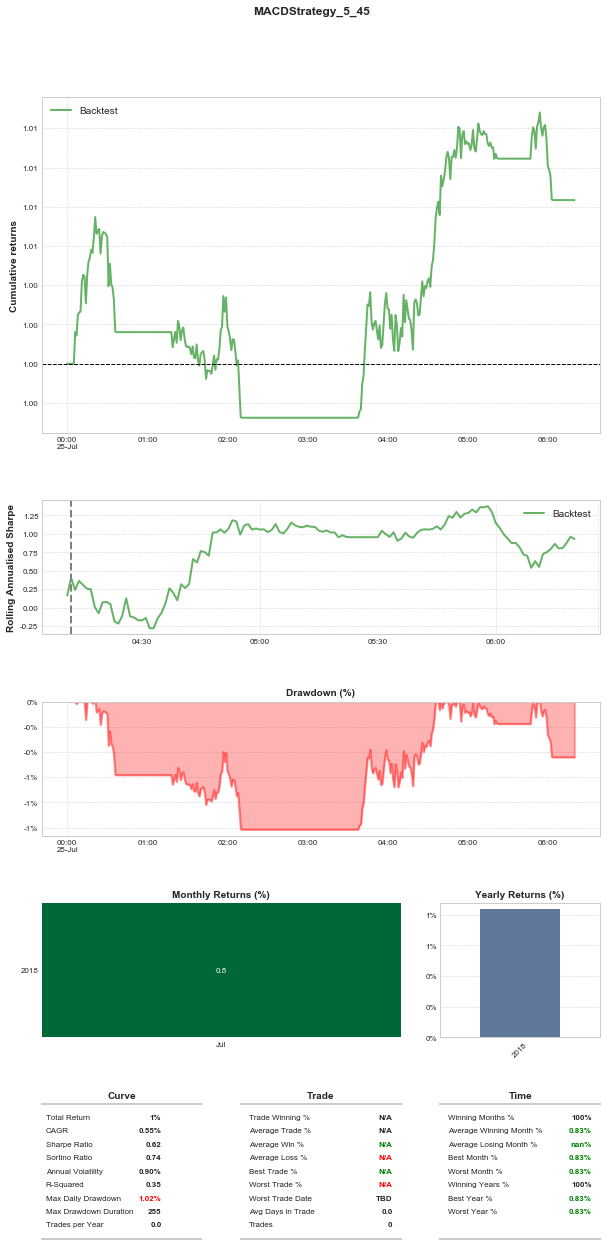

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:26:00+00:00
SHORT: 2018-07-25 01:39:00+00:00
LONG: 2018-07-25 01:46:00+00:00
SHORT: 2018-07-25 02:10:00+00:00
LONG: 2018-07-25 03:40:00+00:00
SHORT: 2018-07-25 05:29:00+00:00
LONG: 2018-07-25 05:37:00+00:00
SHORT: 2018-07-25 05:38:00+00:00
LONG: 2018-07-25 05:48:00+00:00
SHORT: 2018-07-25 06:02:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.4698839063
Max Drawdown: 1.0094553309
Max Drawdown Duration: 255
Total Returns: 0.0061680000


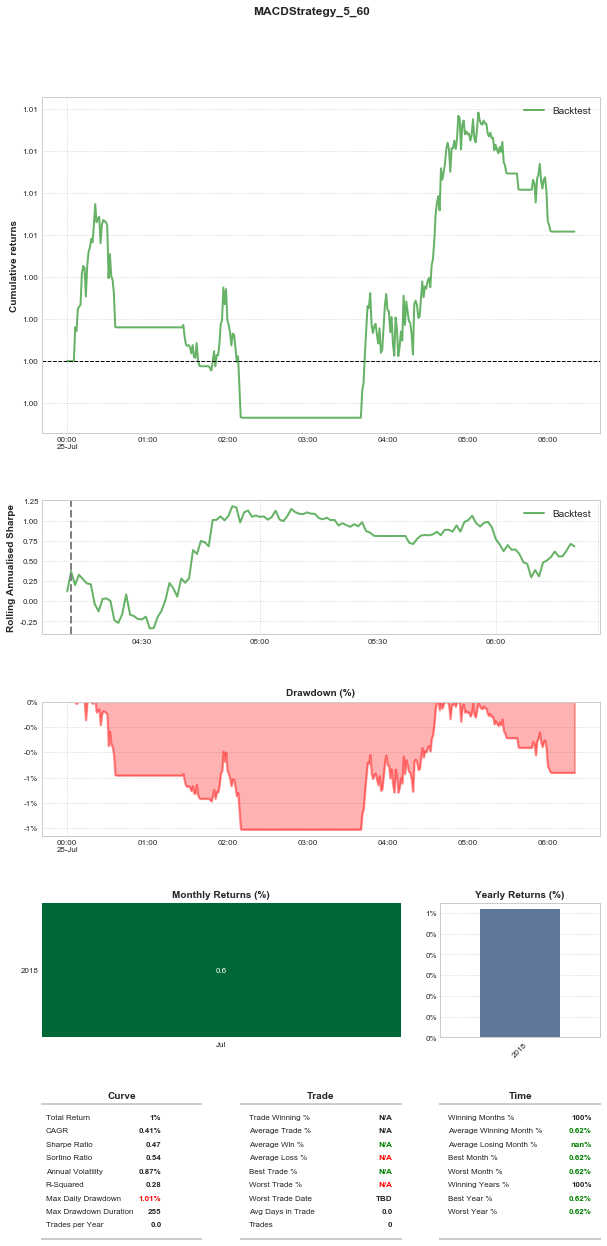

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:47:00+00:00
SHORT: 2018-07-25 02:11:00+00:00
LONG: 2018-07-25 03:41:00+00:00
SHORT: 2018-07-25 06:02:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8234558651
Max Drawdown: 0.8170930466
Max Drawdown Duration: 254
Total Returns: 0.0109040000


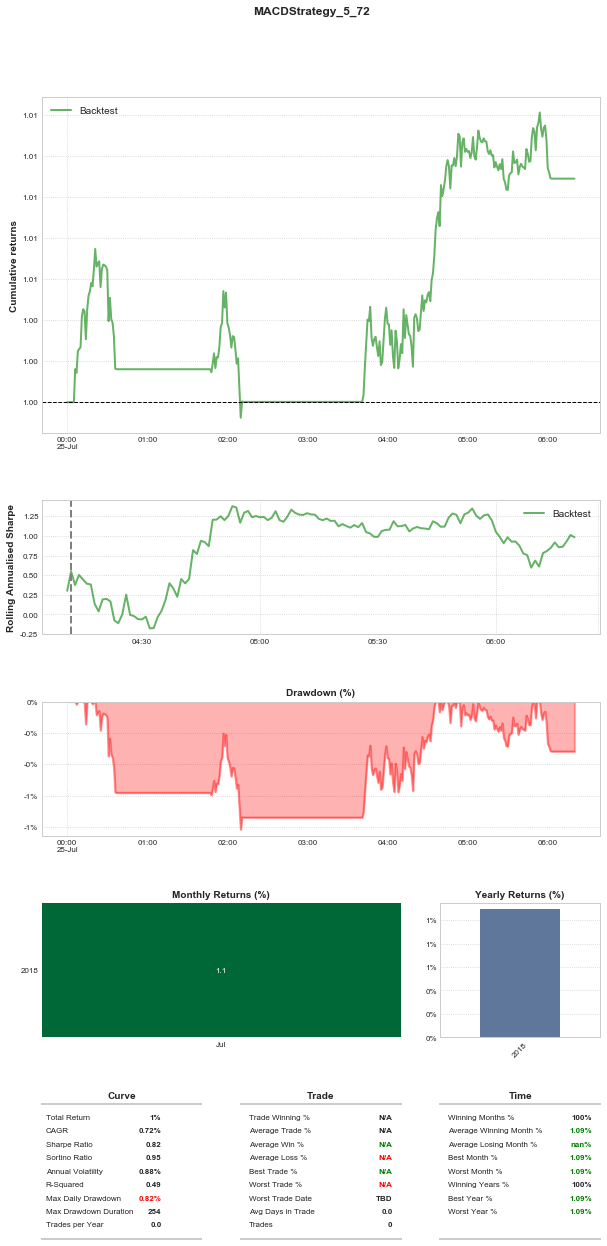

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:49:00+00:00
SHORT: 2018-07-25 02:12:00+00:00
LONG: 2018-07-25 03:42:00+00:00
SHORT: 2018-07-25 06:03:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6472610554
Max Drawdown: 0.8468704900
Max Drawdown Duration: 255
Total Returns: 0.0086040000


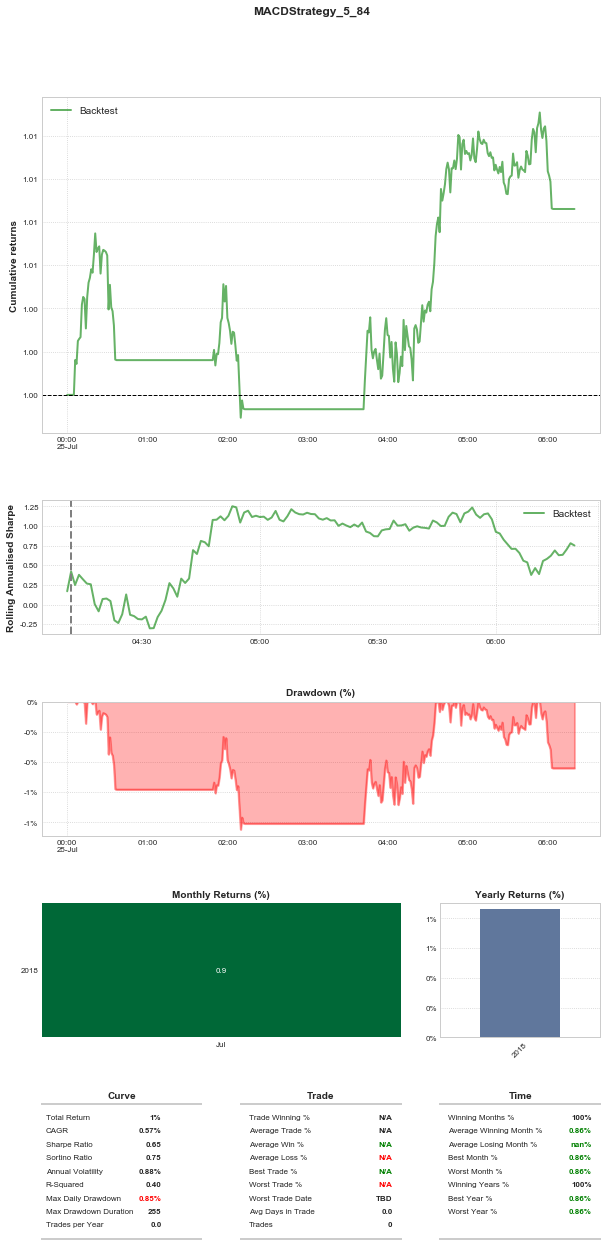

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:52:00+00:00
SHORT: 2018-07-25 02:11:00+00:00
LONG: 2018-07-25 03:43:00+00:00
SHORT: 2018-07-25 06:03:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.5569674051
Max Drawdown: 0.8786330962
Max Drawdown Duration: 258
Total Returns: 0.0073040000


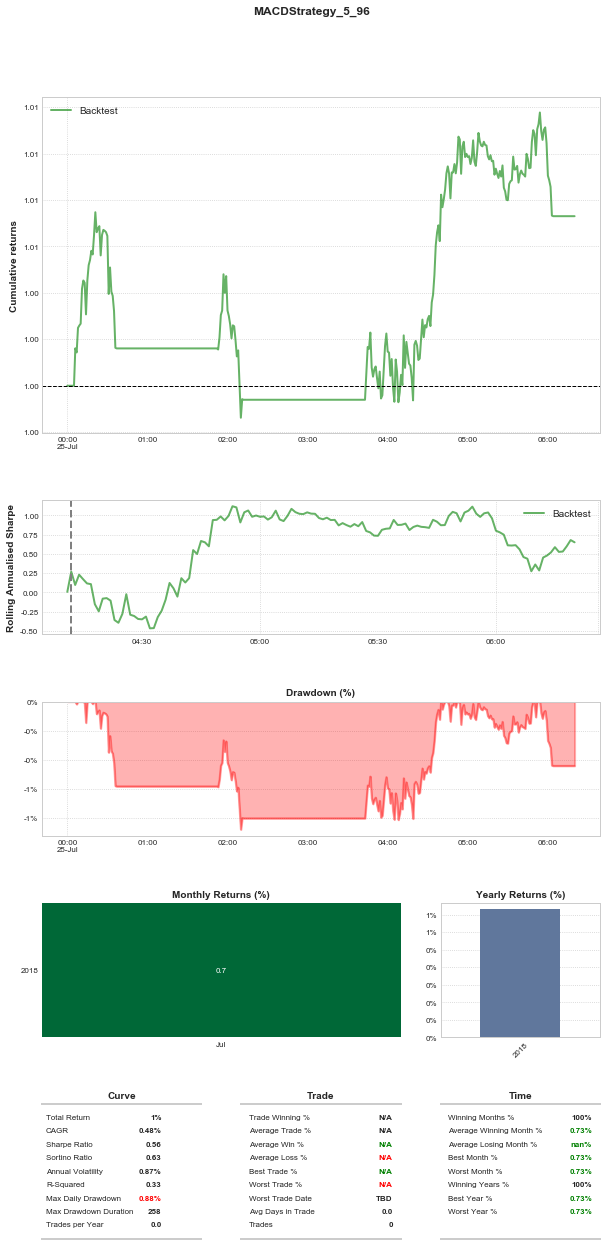

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:54:00+00:00
SHORT: 2018-07-25 02:09:00+00:00
LONG: 2018-07-25 03:45:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.3359123585
Max Drawdown: 1.0306965738
Max Drawdown Duration: 271
Total Returns: 0.0042840000


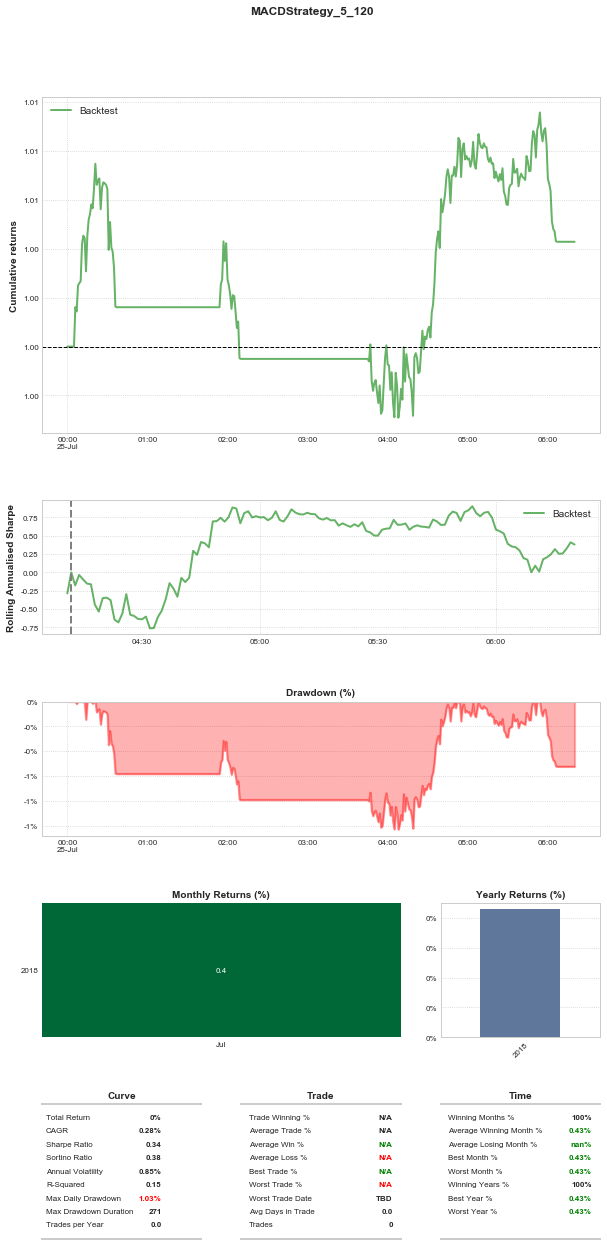

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:05:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:54:00+00:00
SHORT: 2018-07-25 02:09:00+00:00
LONG: 2018-07-25 04:01:00+00:00
SHORT: 2018-07-25 04:03:00+00:00
LONG: 2018-07-25 04:16:00+00:00
SHORT: 2018-07-25 04:17:00+00:00
LONG: 2018-07-25 04:23:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.0078010138
Max Drawdown: 0.9527903287
Max Drawdown Duration: 270
Total Returns: 0.0000460000


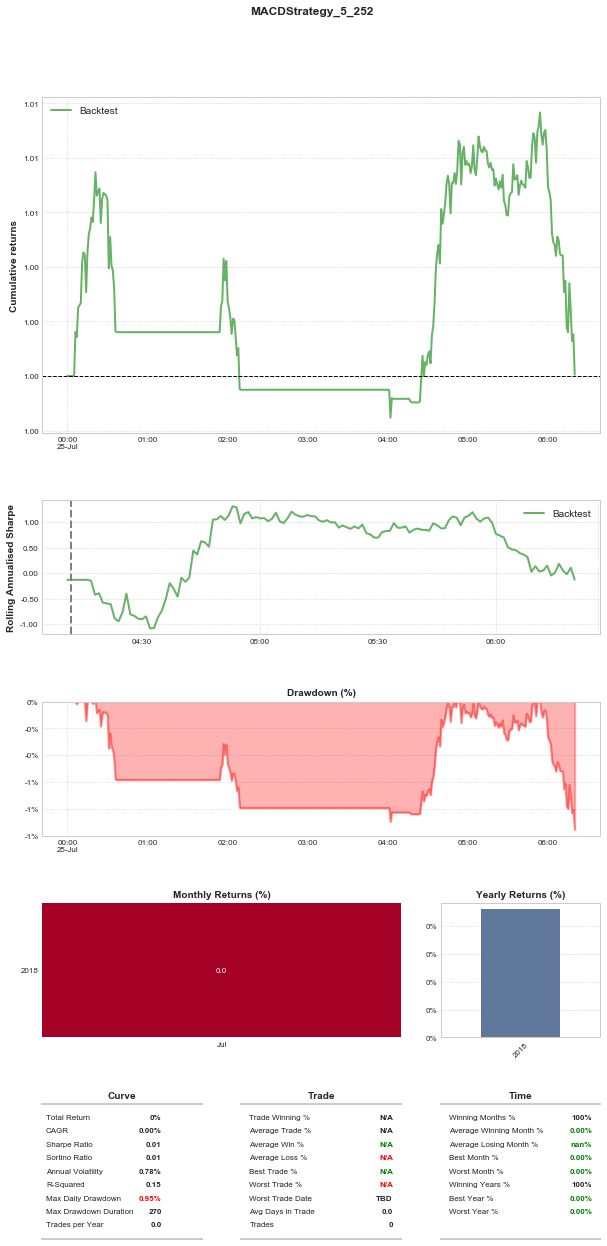

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:31:00+00:00
LONG: 2018-07-25 00:48:00+00:00
SHORT: 2018-07-25 00:54:00+00:00
LONG: 2018-07-25 01:11:00+00:00
SHORT: 2018-07-25 01:28:00+00:00
LONG: 2018-07-25 01:29:00+00:00
SHORT: 2018-07-25 01:31:00+00:00
LONG: 2018-07-25 01:32:00+00:00
SHORT: 2018-07-25 01:33:00+00:00
LONG: 2018-07-25 01:46:00+00:00
SHORT: 2018-07-25 01:47:00+00:00
LONG: 2018-07-25 01:48:00+00:00
SHORT: 2018-07-25 02:07:00+00:00
LONG: 2018-07-25 02:32:00+00:00
SHORT: 2018-07-25 02:38:00+00:00
LONG: 2018-07-25 02:42:00+00:00
SHORT: 2018-07-25 02:45:00+00:00
LONG: 2018-07-25 02:49:00+00:00
SHORT: 2018-07-25 02:50:00+00:00
LONG: 2018-07-25 02:55:00+00:00
SHORT: 2018-07-25 02:57:00+00:00
LONG: 2018-07-25 03:04:00+00:00
SHORT: 2018-07-25 03:05:00+00:00
LONG: 2018-07-25 03:19:00+00:00
SHORT:

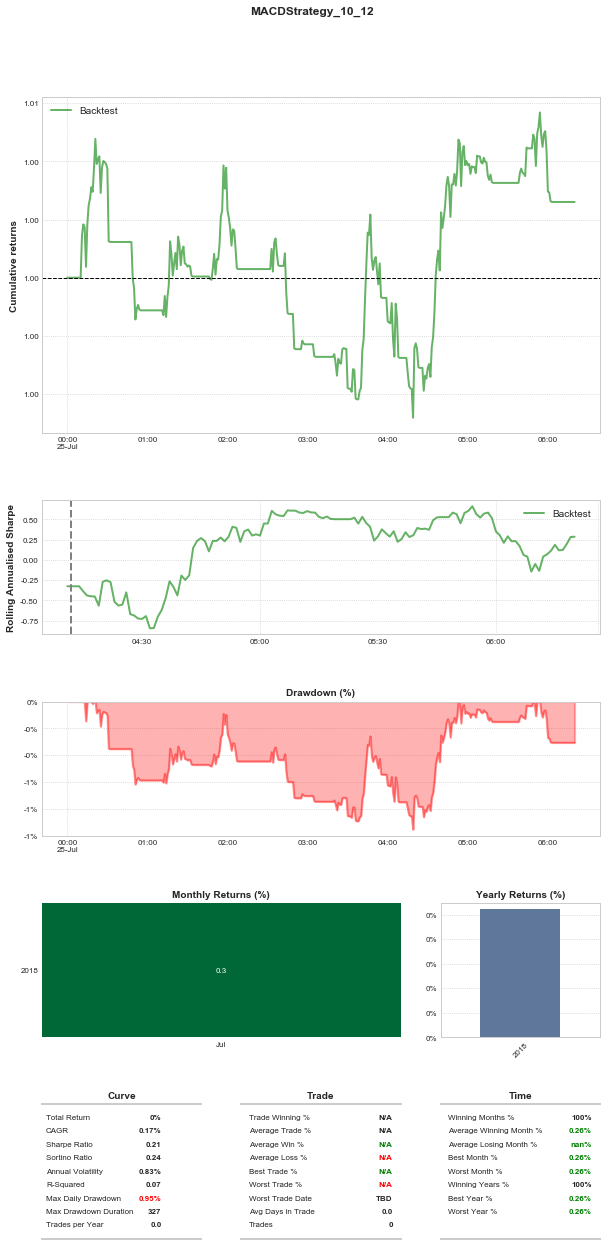

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:35:00+00:00
LONG: 2018-07-25 01:14:00+00:00
SHORT: 2018-07-25 01:36:00+00:00
LONG: 2018-07-25 01:50:00+00:00
SHORT: 2018-07-25 02:10:00+00:00
LONG: 2018-07-25 02:36:00+00:00
SHORT: 2018-07-25 02:49:00+00:00
LONG: 2018-07-25 03:32:00+00:00
SHORT: 2018-07-25 04:09:00+00:00
LONG: 2018-07-25 04:15:00+00:00
SHORT: 2018-07-25 05:20:00+00:00
LONG: 2018-07-25 05:40:00+00:00
SHORT: 2018-07-25 06:04:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6245816446
Max Drawdown: 0.8933352177
Max Drawdown Duration: 203
Total Returns: 0.0082560000


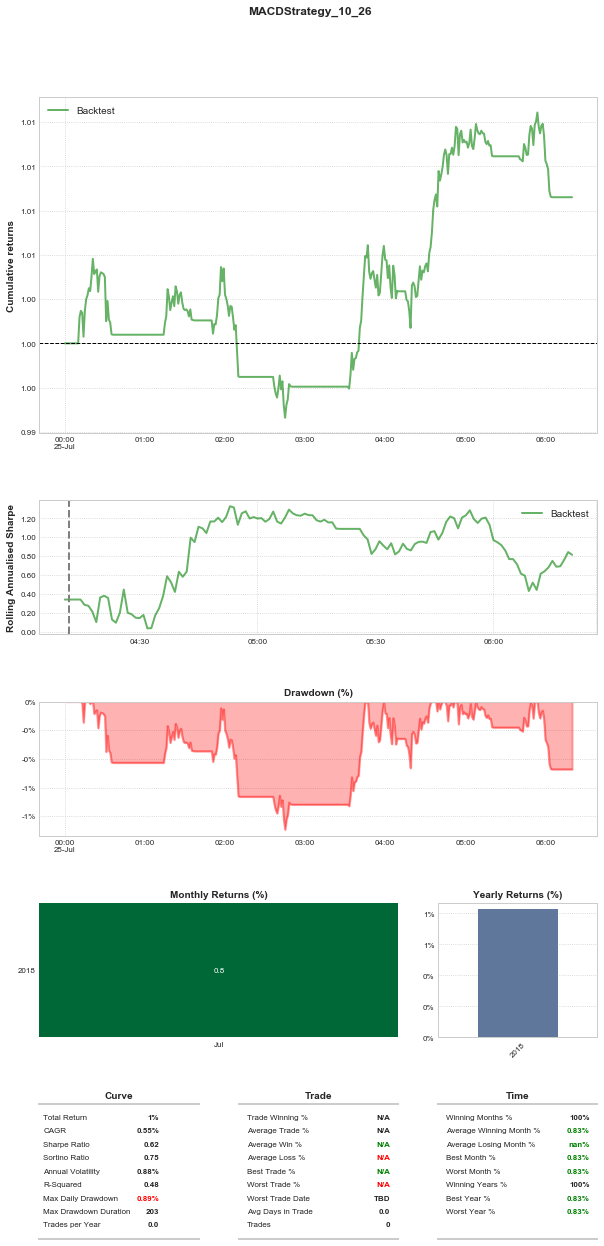

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:17:00+00:00
SHORT: 2018-07-25 01:38:00+00:00
LONG: 2018-07-25 01:50:00+00:00
SHORT: 2018-07-25 02:11:00+00:00
LONG: 2018-07-25 02:41:00+00:00
SHORT: 2018-07-25 02:51:00+00:00
LONG: 2018-07-25 03:35:00+00:00
SHORT: 2018-07-25 04:10:00+00:00
LONG: 2018-07-25 04:15:00+00:00
SHORT: 2018-07-25 05:20:00+00:00
LONG: 2018-07-25 05:42:00+00:00
SHORT: 2018-07-25 06:04:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.1900131633
Max Drawdown: 1.2926289892
Max Drawdown Duration: 263
Total Returns: 0.0024760000


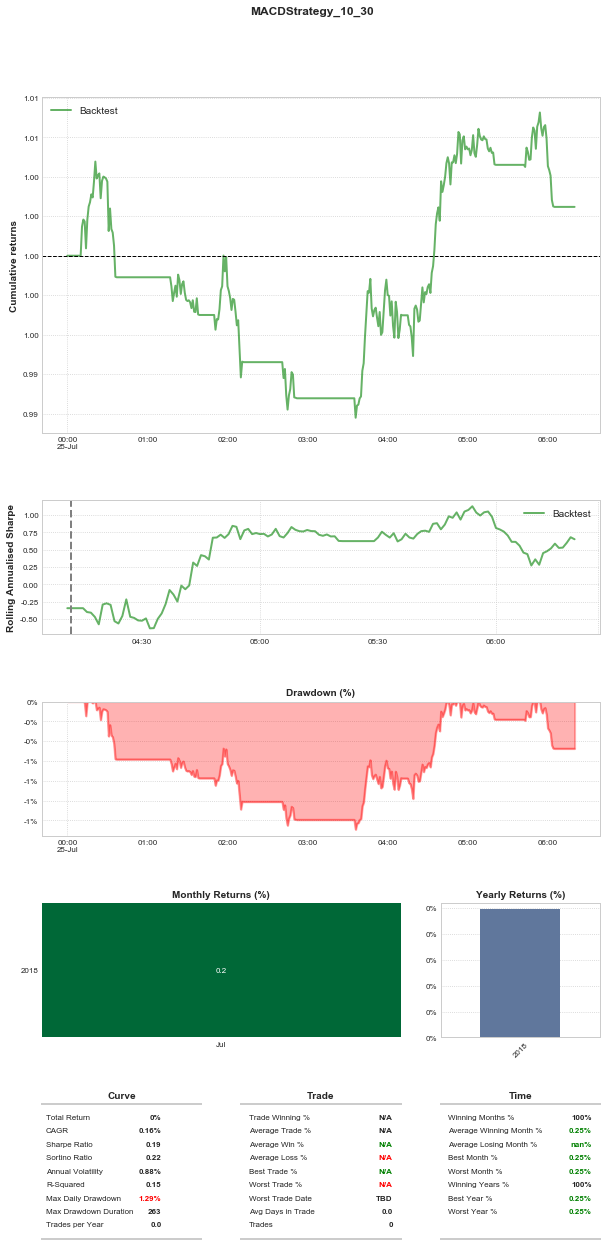

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:37:00+00:00
LONG: 2018-07-25 01:18:00+00:00
SHORT: 2018-07-25 01:40:00+00:00
LONG: 2018-07-25 01:51:00+00:00
SHORT: 2018-07-25 02:11:00+00:00
LONG: 2018-07-25 02:49:00+00:00
SHORT: 2018-07-25 02:50:00+00:00
LONG: 2018-07-25 03:37:00+00:00
SHORT: 2018-07-25 05:21:00+00:00
LONG: 2018-07-25 05:46:00+00:00
SHORT: 2018-07-25 06:04:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.2032140060
Max Drawdown: 1.2960128347
Max Drawdown Duration: 262
Total Returns: 0.0027680000


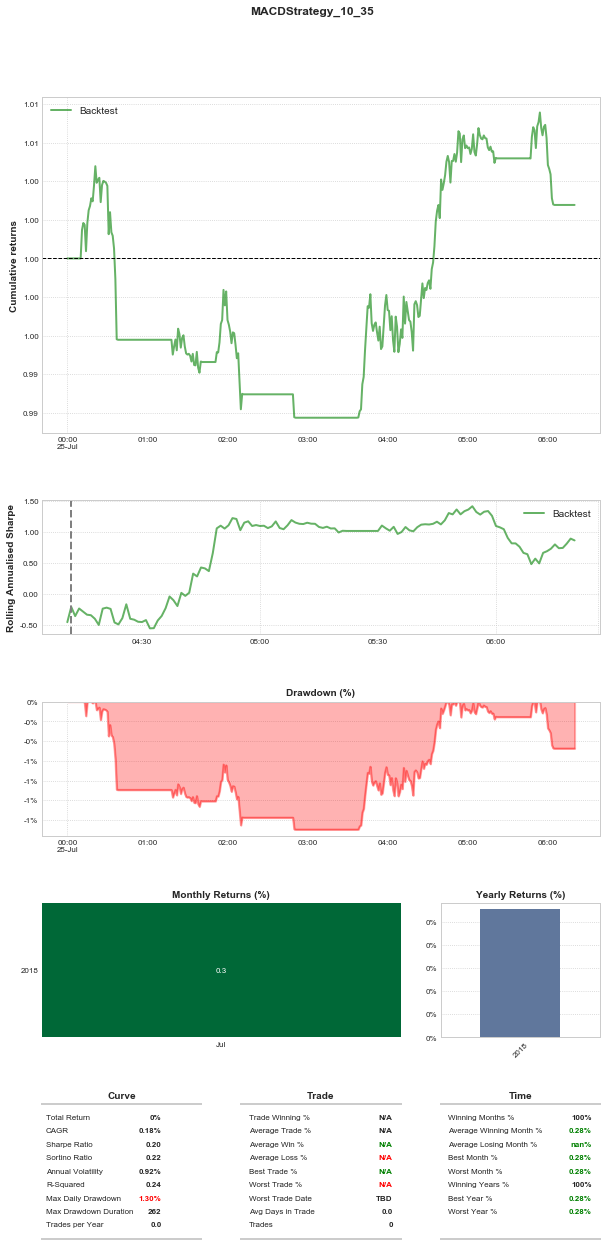

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:20:00+00:00
SHORT: 2018-07-25 01:45:00+00:00
LONG: 2018-07-25 01:46:00+00:00
SHORT: 2018-07-25 02:12:00+00:00
LONG: 2018-07-25 03:40:00+00:00
SHORT: 2018-07-25 05:24:00+00:00
LONG: 2018-07-25 05:49:00+00:00
SHORT: 2018-07-25 06:05:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.1509531052
Max Drawdown: 1.1787725399
Max Drawdown Duration: 258
Total Returns: 0.0020400000


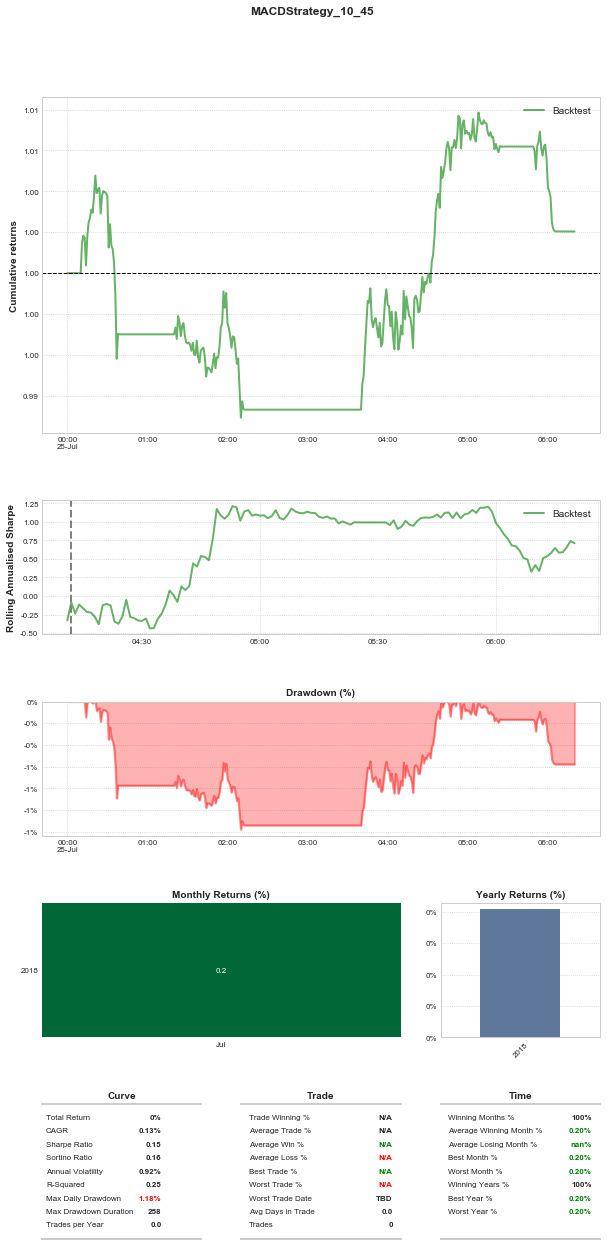

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:26:00+00:00
SHORT: 2018-07-25 01:44:00+00:00
LONG: 2018-07-25 01:46:00+00:00
SHORT: 2018-07-25 02:13:00+00:00
LONG: 2018-07-25 03:42:00+00:00
SHORT: 2018-07-25 05:31:00+00:00
LONG: 2018-07-25 05:49:00+00:00
SHORT: 2018-07-25 06:04:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1126969057
Max Drawdown: 1.2908375416
Max Drawdown Duration: 359
Total Returns: -0.0016200000


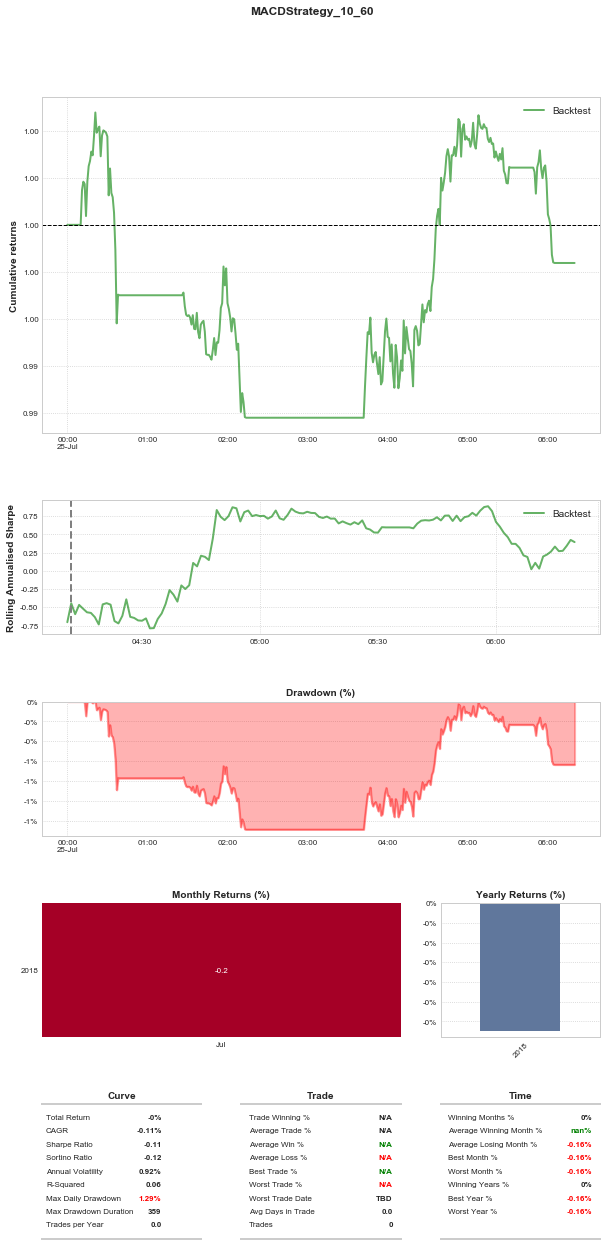

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:48:00+00:00
SHORT: 2018-07-25 02:14:00+00:00
LONG: 2018-07-25 03:43:00+00:00
SHORT: 2018-07-25 06:04:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.0408311817
Max Drawdown: 1.1907155241
Max Drawdown Duration: 331
Total Returns: 0.0005040000


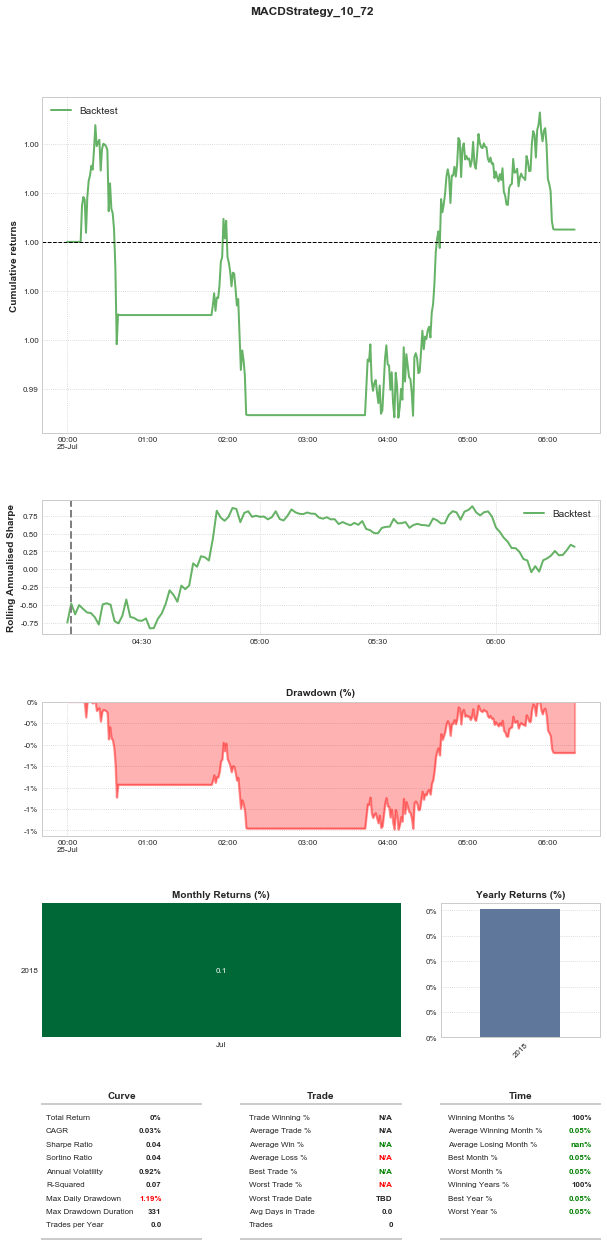

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:52:00+00:00
SHORT: 2018-07-25 02:14:00+00:00
LONG: 2018-07-25 03:44:00+00:00
SHORT: 2018-07-25 06:04:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.0997431669
Max Drawdown: 1.3837937685
Max Drawdown Duration: 359
Total Returns: -0.0014360000


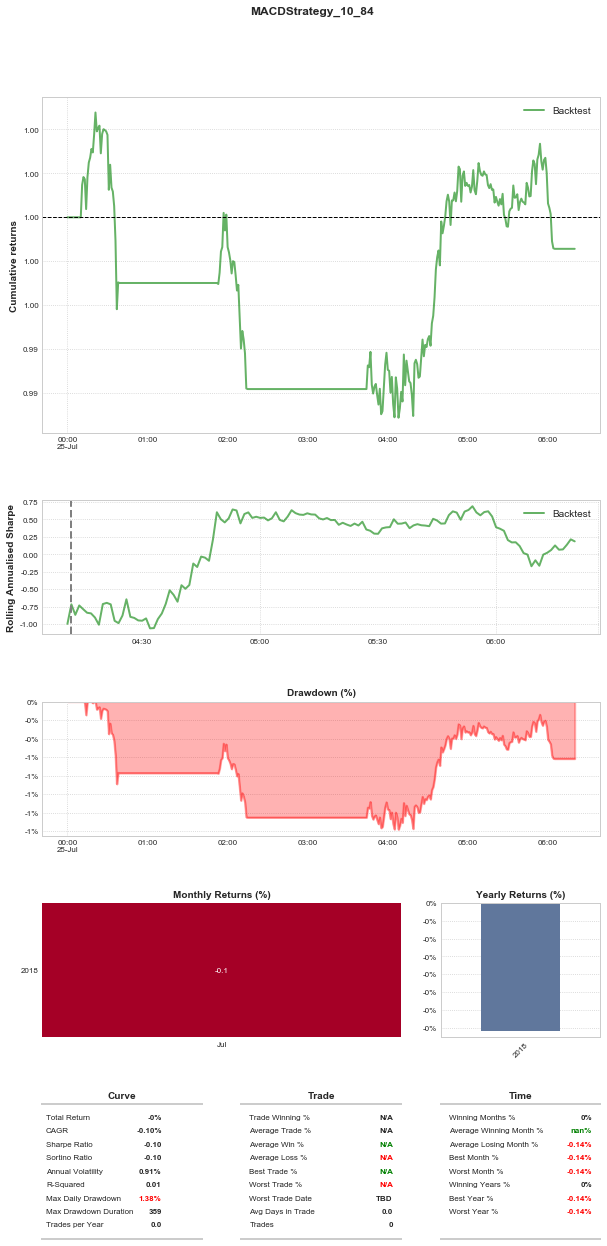

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:55:00+00:00
SHORT: 2018-07-25 02:14:00+00:00
LONG: 2018-07-25 03:44:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.2431490948
Max Drawdown: 1.5291000762
Max Drawdown Duration: 359
Total Returns: -0.0033960000


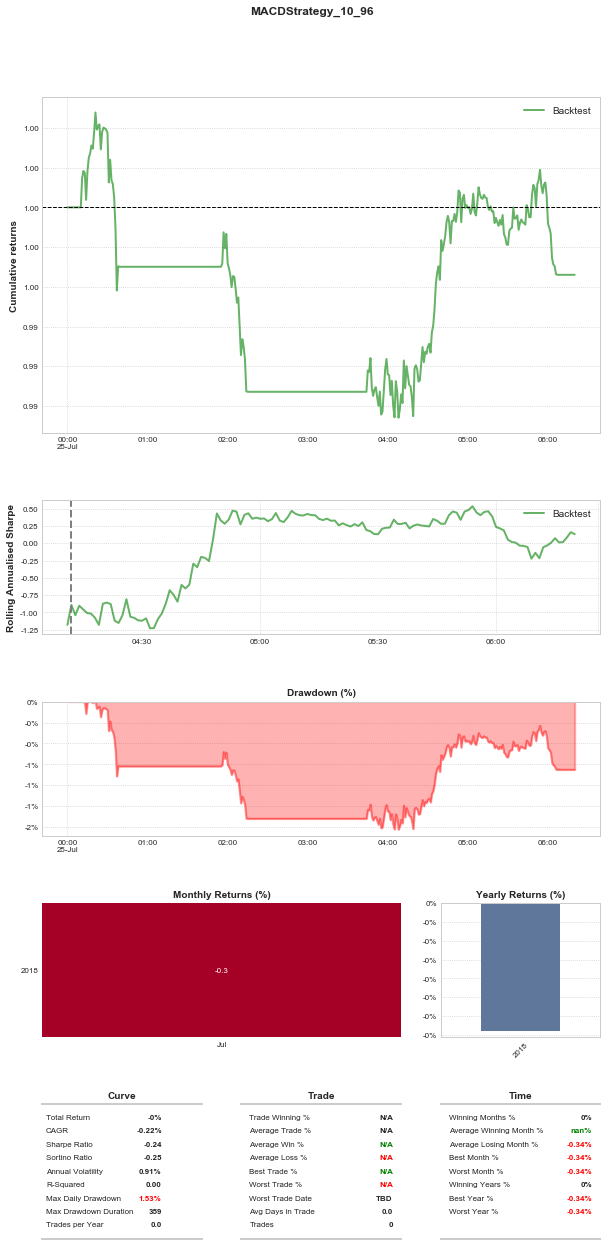

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:56:00+00:00
SHORT: 2018-07-25 02:10:00+00:00
LONG: 2018-07-25 03:47:00+00:00
SHORT: 2018-07-25 06:09:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.2510591814
Max Drawdown: 1.5390525631
Max Drawdown Duration: 359
Total Returns: -0.0034360000


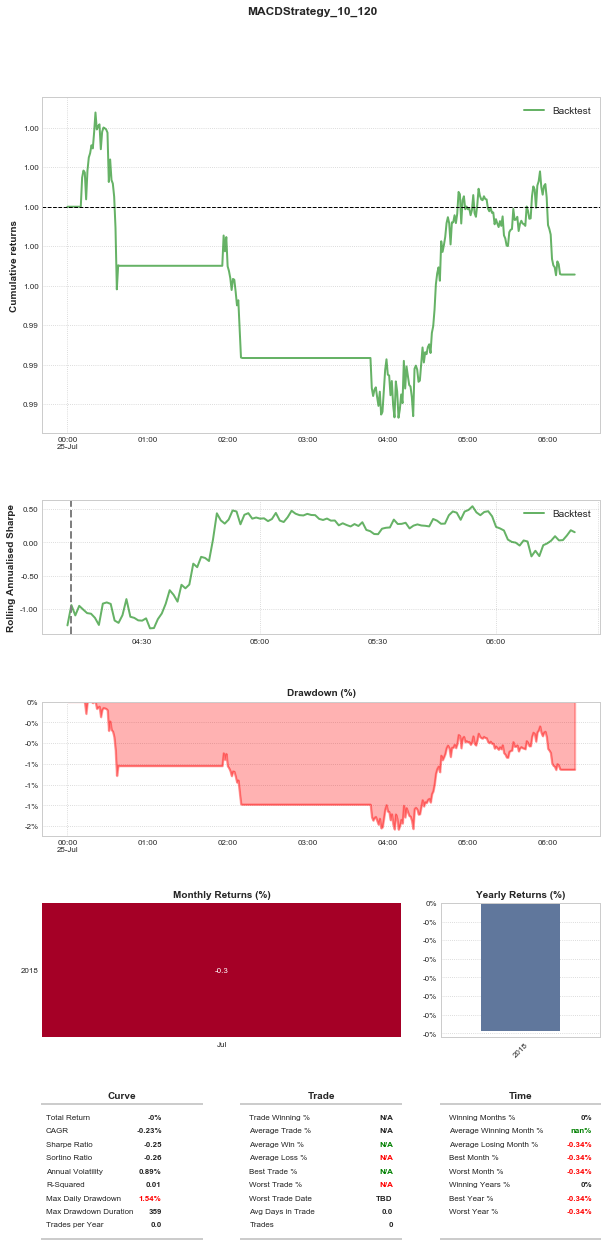

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:10:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:56:00+00:00
SHORT: 2018-07-25 02:10:00+00:00
LONG: 2018-07-25 04:25:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.6210534350
Max Drawdown: 1.2378903117
Max Drawdown Duration: 359
Total Returns: -0.0075700000


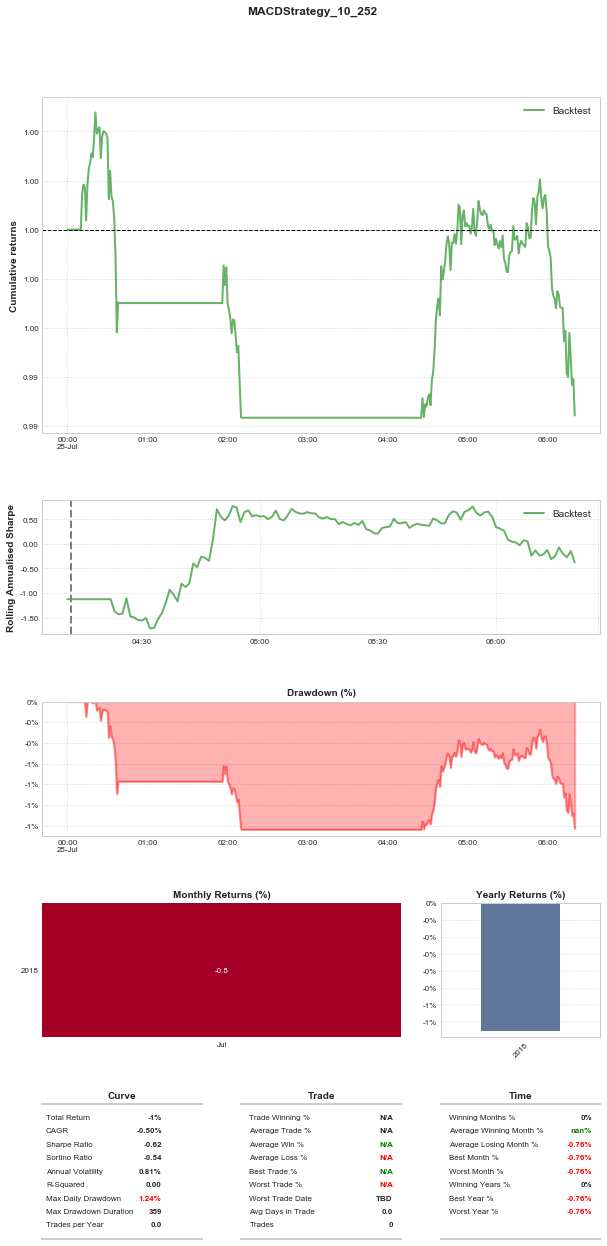

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:36:00+00:00
LONG: 2018-07-25 01:15:00+00:00
SHORT: 2018-07-25 01:37:00+00:00
LONG: 2018-07-25 01:50:00+00:00
SHORT: 2018-07-25 02:11:00+00:00
LONG: 2018-07-25 02:37:00+00:00
SHORT: 2018-07-25 02:49:00+00:00
LONG: 2018-07-25 03:28:00+00:00
SHORT: 2018-07-25 03:29:00+00:00
LONG: 2018-07-25 03:31:00+00:00
SHORT: 2018-07-25 04:10:00+00:00
LONG: 2018-07-25 04:17:00+00:00
SHORT: 2018-07-25 04:19:00+00:00
LONG: 2018-07-25 04:20:00+00:00
SHORT: 2018-07-25 05:21:00+00:00
LONG: 2018-07-25 05:42:00+00:00
SHORT: 2018-07-25 06:05:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.4807395096
Max Drawdown: 0.9169280716
Max Drawdown Duration: 203
Total Returns: 0.0062320000


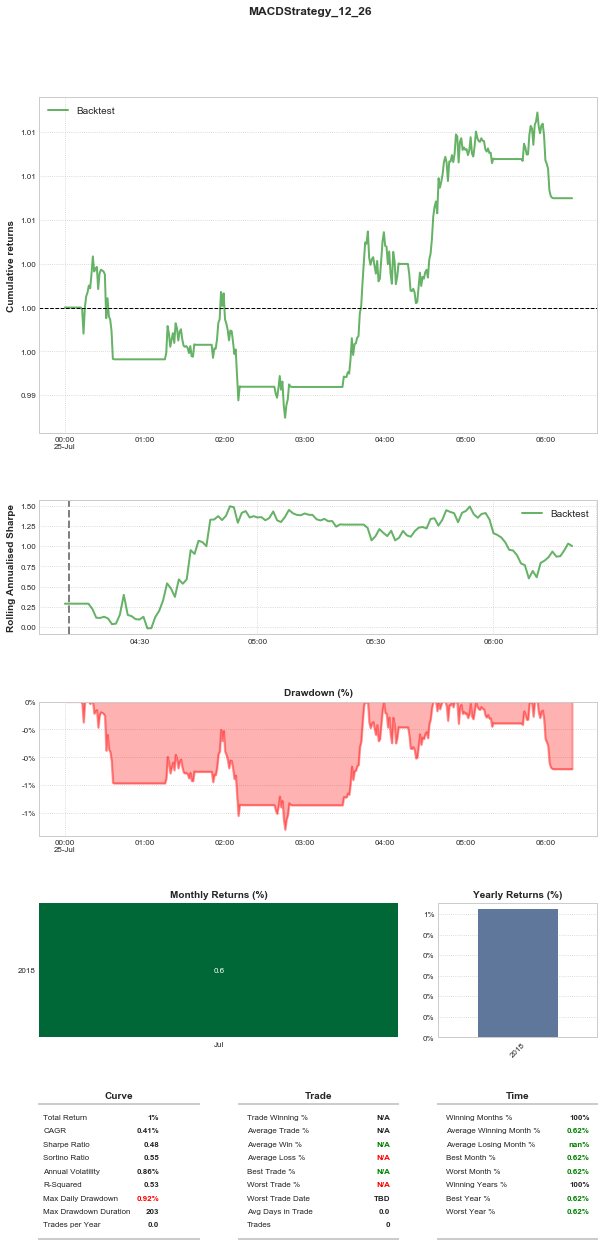

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:37:00+00:00
LONG: 2018-07-25 01:17:00+00:00
SHORT: 2018-07-25 01:39:00+00:00
LONG: 2018-07-25 01:51:00+00:00
SHORT: 2018-07-25 02:12:00+00:00
LONG: 2018-07-25 02:41:00+00:00
SHORT: 2018-07-25 02:52:00+00:00
LONG: 2018-07-25 03:35:00+00:00
SHORT: 2018-07-25 04:11:00+00:00
LONG: 2018-07-25 04:17:00+00:00
SHORT: 2018-07-25 04:19:00+00:00
LONG: 2018-07-25 04:20:00+00:00
SHORT: 2018-07-25 05:21:00+00:00
LONG: 2018-07-25 05:44:00+00:00
SHORT: 2018-07-25 06:05:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.4275222583
Max Drawdown: 1.6240674674
Max Drawdown Duration: 359
Total Returns: -0.0057760000


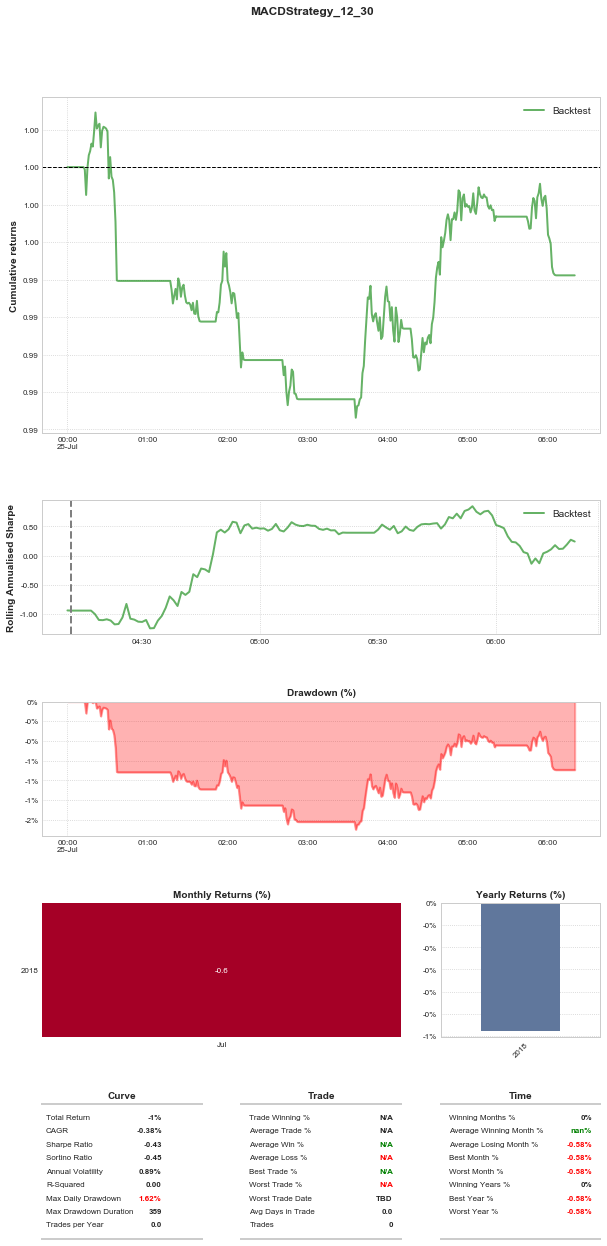

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:38:00+00:00
LONG: 2018-07-25 01:19:00+00:00
SHORT: 2018-07-25 01:41:00+00:00
LONG: 2018-07-25 01:52:00+00:00
SHORT: 2018-07-25 02:12:00+00:00
LONG: 2018-07-25 02:49:00+00:00
SHORT: 2018-07-25 02:50:00+00:00
LONG: 2018-07-25 03:37:00+00:00
SHORT: 2018-07-25 04:16:00+00:00
LONG: 2018-07-25 04:17:00+00:00
SHORT: 2018-07-25 04:18:00+00:00
LONG: 2018-07-25 04:20:00+00:00
SHORT: 2018-07-25 05:22:00+00:00
LONG: 2018-07-25 05:45:00+00:00
SHORT: 2018-07-25 06:05:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.0056140384
Max Drawdown: 1.1847476454
Max Drawdown Duration: 263
Total Returns: -0.0001360000


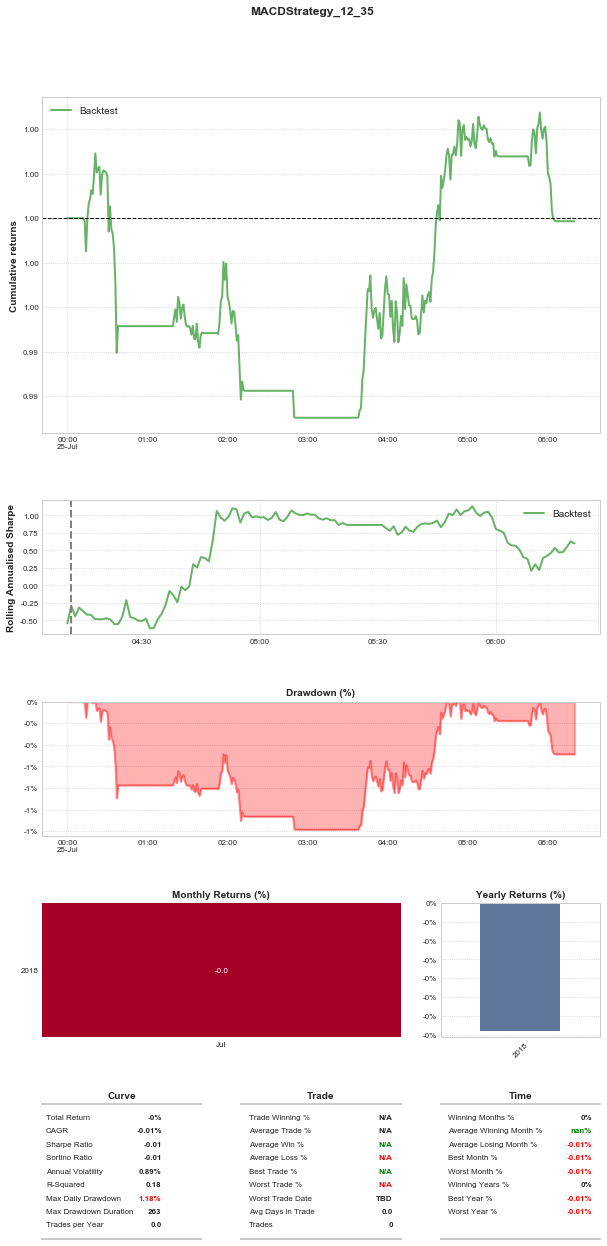

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:39:00+00:00
LONG: 2018-07-25 01:21:00+00:00
SHORT: 2018-07-25 02:13:00+00:00
LONG: 2018-07-25 03:41:00+00:00
SHORT: 2018-07-25 05:24:00+00:00
LONG: 2018-07-25 05:49:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1035869459
Max Drawdown: 1.1424708400
Max Drawdown Duration: 262
Total Returns: -0.0015280000


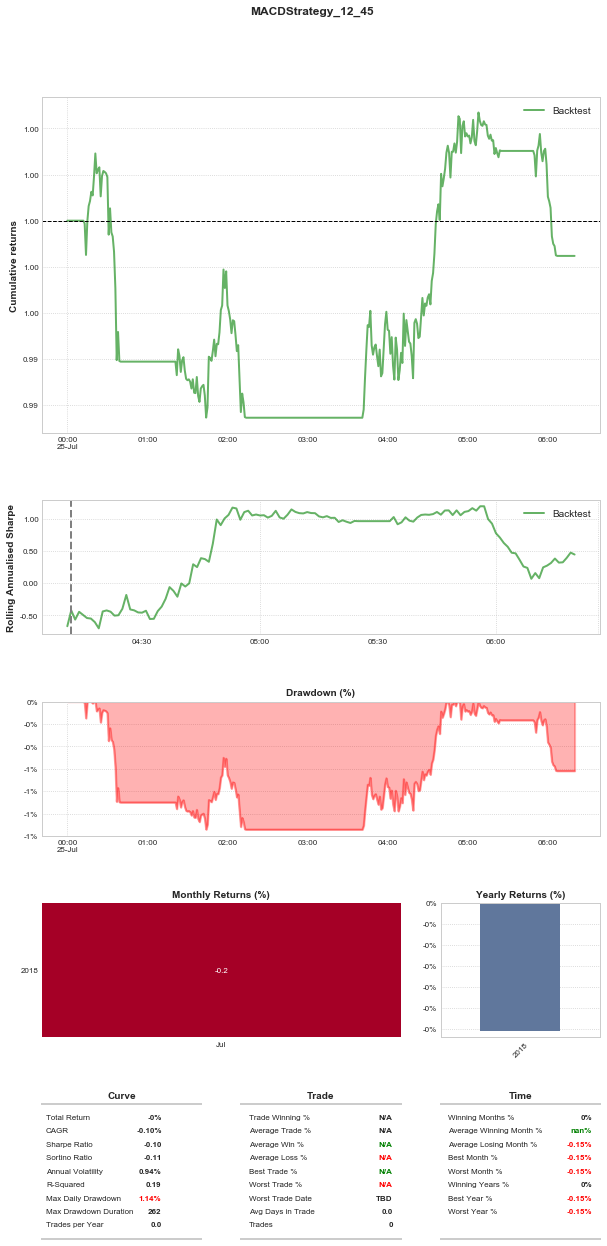

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:39:00+00:00
LONG: 2018-07-25 01:27:00+00:00
SHORT: 2018-07-25 01:44:00+00:00
LONG: 2018-07-25 01:46:00+00:00
SHORT: 2018-07-25 02:14:00+00:00
LONG: 2018-07-25 03:43:00+00:00
SHORT: 2018-07-25 05:31:00+00:00
LONG: 2018-07-25 05:50:00+00:00
SHORT: 2018-07-25 06:05:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.5579339041
Max Drawdown: 1.6029290647
Max Drawdown Duration: 359
Total Returns: -0.0077800000


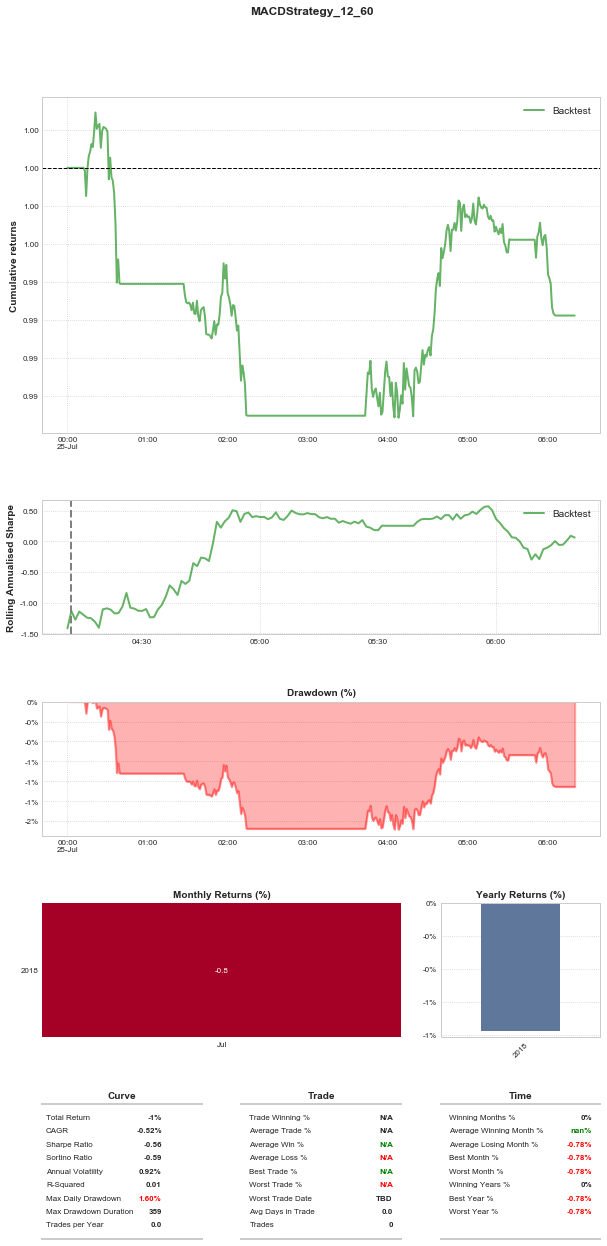

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:39:00+00:00
LONG: 2018-07-25 01:48:00+00:00
SHORT: 2018-07-25 02:15:00+00:00
LONG: 2018-07-25 03:44:00+00:00
SHORT: 2018-07-25 06:05:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3304310366
Max Drawdown: 1.5099998604
Max Drawdown Duration: 359
Total Returns: -0.0046360000


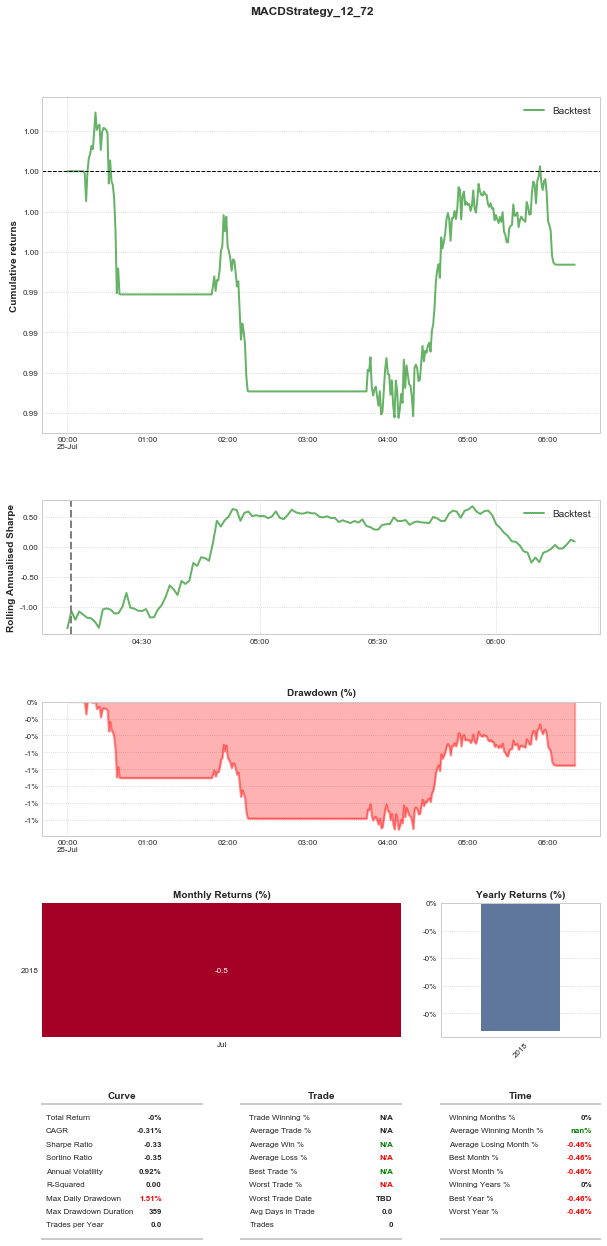

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:39:00+00:00
LONG: 2018-07-25 01:52:00+00:00
SHORT: 2018-07-25 02:15:00+00:00
LONG: 2018-07-25 03:44:00+00:00
SHORT: 2018-07-25 06:05:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3857760753
Max Drawdown: 1.5837848509
Max Drawdown Duration: 359
Total Returns: -0.0053760000


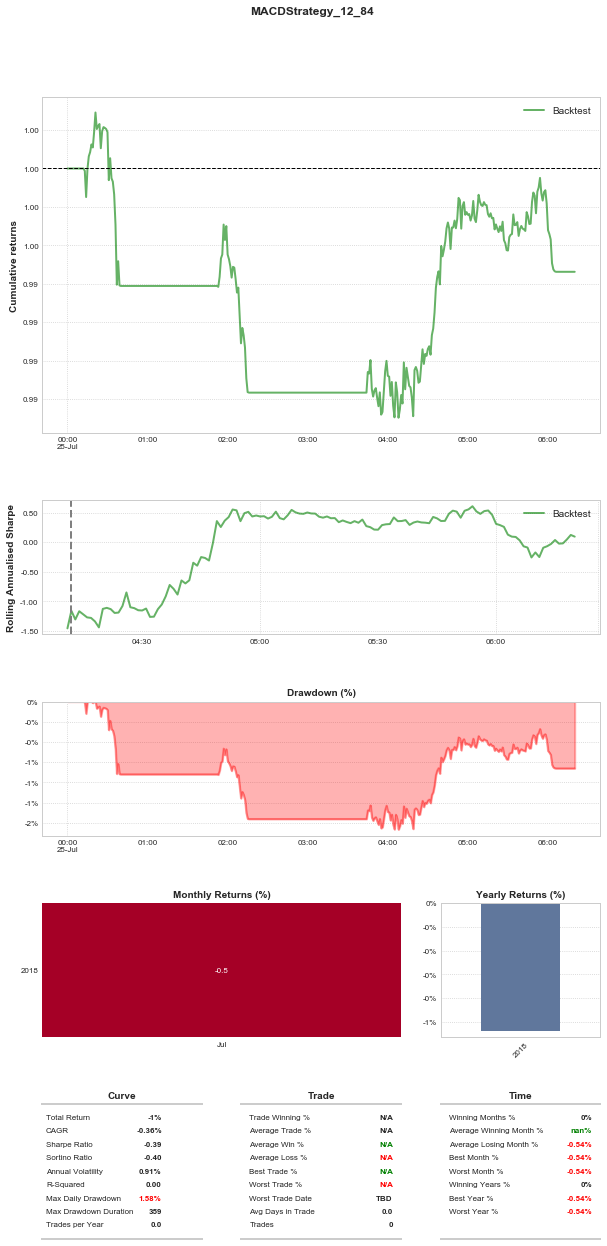

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:39:00+00:00
LONG: 2018-07-25 01:56:00+00:00
SHORT: 2018-07-25 02:15:00+00:00
LONG: 2018-07-25 03:45:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.6212035227
Max Drawdown: 1.8589829238
Max Drawdown Duration: 359
Total Returns: -0.0085360000


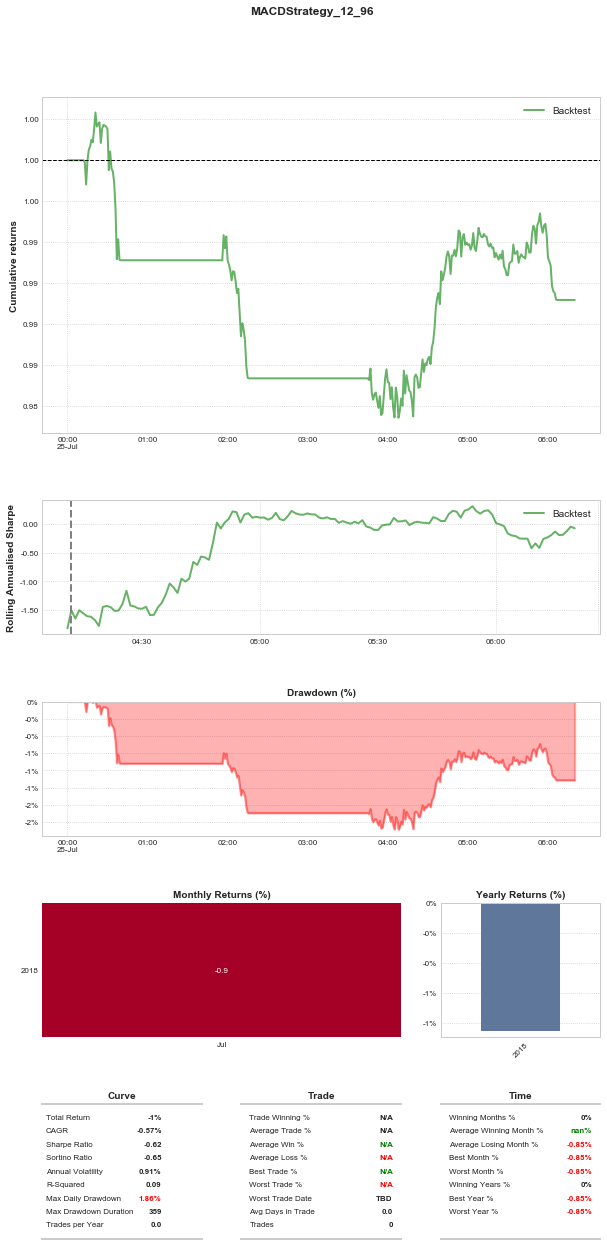

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:39:00+00:00
LONG: 2018-07-25 01:57:00+00:00
SHORT: 2018-07-25 02:11:00+00:00
LONG: 2018-07-25 03:48:00+00:00
SHORT: 2018-07-25 06:10:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.4394800220
Max Drawdown: 1.5937557956
Max Drawdown Duration: 359
Total Returns: -0.0058560000


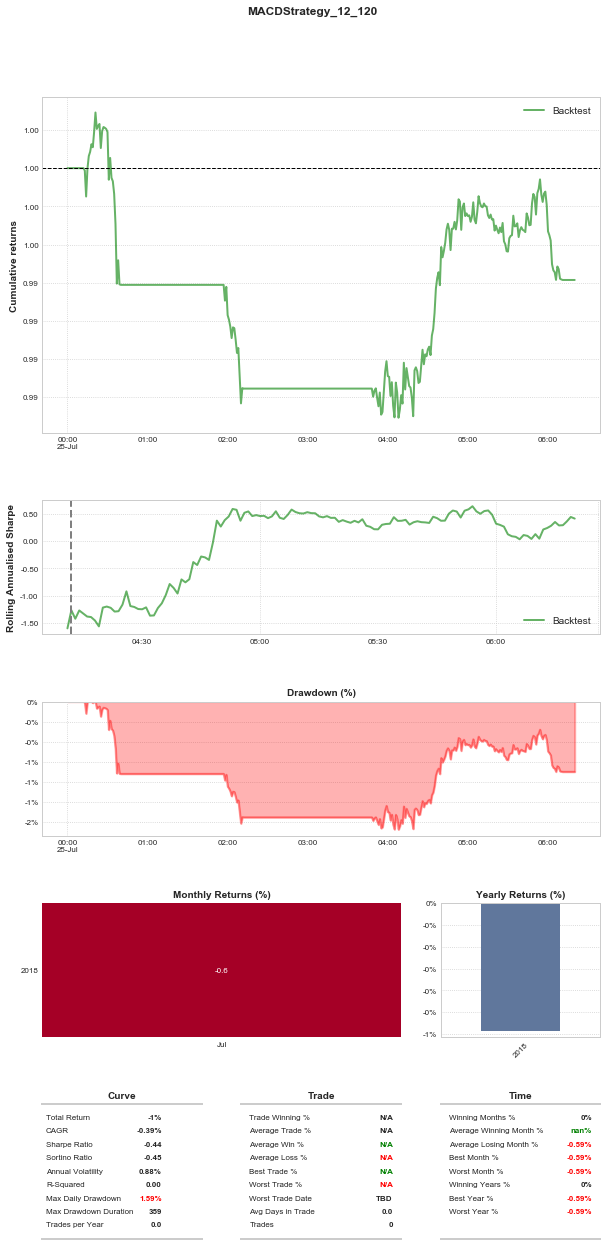

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:12:00+00:00
SHORT: 2018-07-25 00:39:00+00:00
LONG: 2018-07-25 01:57:00+00:00
SHORT: 2018-07-25 02:11:00+00:00
LONG: 2018-07-25 04:23:00+00:00
SHORT: 2018-07-25 04:24:00+00:00
LONG: 2018-07-25 04:25:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.9522070509
Max Drawdown: 1.5187742917
Max Drawdown Duration: 359
Total Returns: -0.0114420000


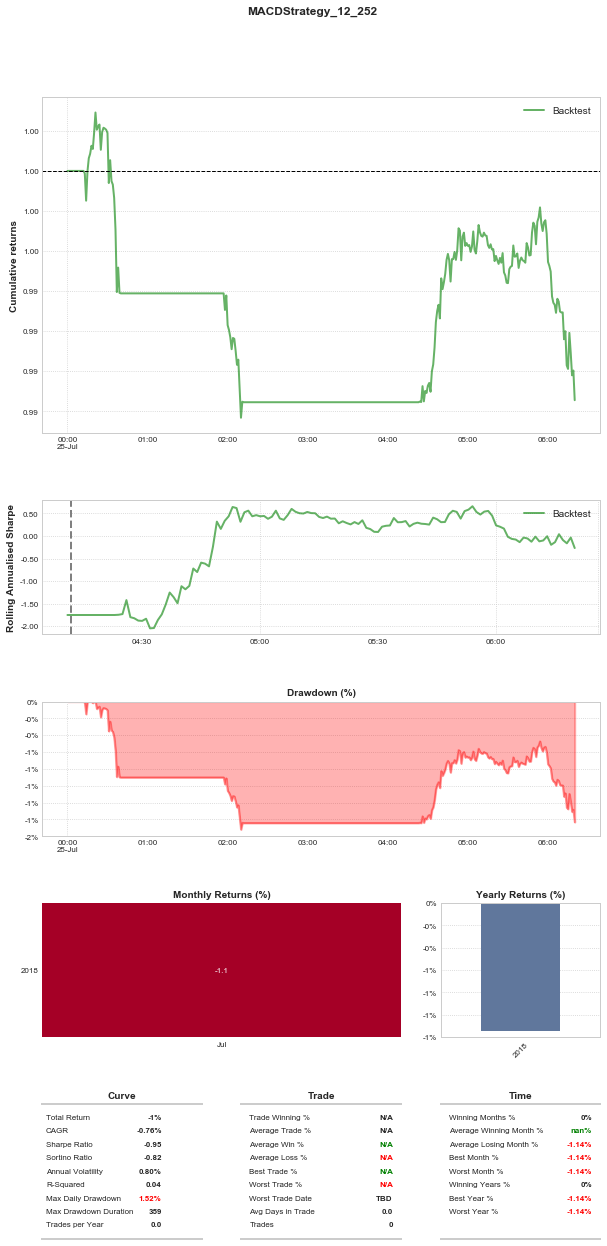

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:42:00+00:00
LONG: 2018-07-25 01:23:00+00:00
SHORT: 2018-07-25 01:44:00+00:00
LONG: 2018-07-25 01:56:00+00:00
SHORT: 2018-07-25 02:17:00+00:00
LONG: 2018-07-25 02:48:00+00:00
SHORT: 2018-07-25 02:55:00+00:00
LONG: 2018-07-25 03:36:00+00:00
SHORT: 2018-07-25 04:12:00+00:00
LONG: 2018-07-25 04:18:00+00:00
SHORT: 2018-07-25 04:25:00+00:00
LONG: 2018-07-25 04:30:00+00:00
SHORT: 2018-07-25 05:20:00+00:00
LONG: 2018-07-25 05:49:00+00:00
SHORT: 2018-07-25 06:10:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.6367906613
Max Drawdown: 2.0052109891
Max Drawdown Duration: 353
Total Returns: -0.0085960000


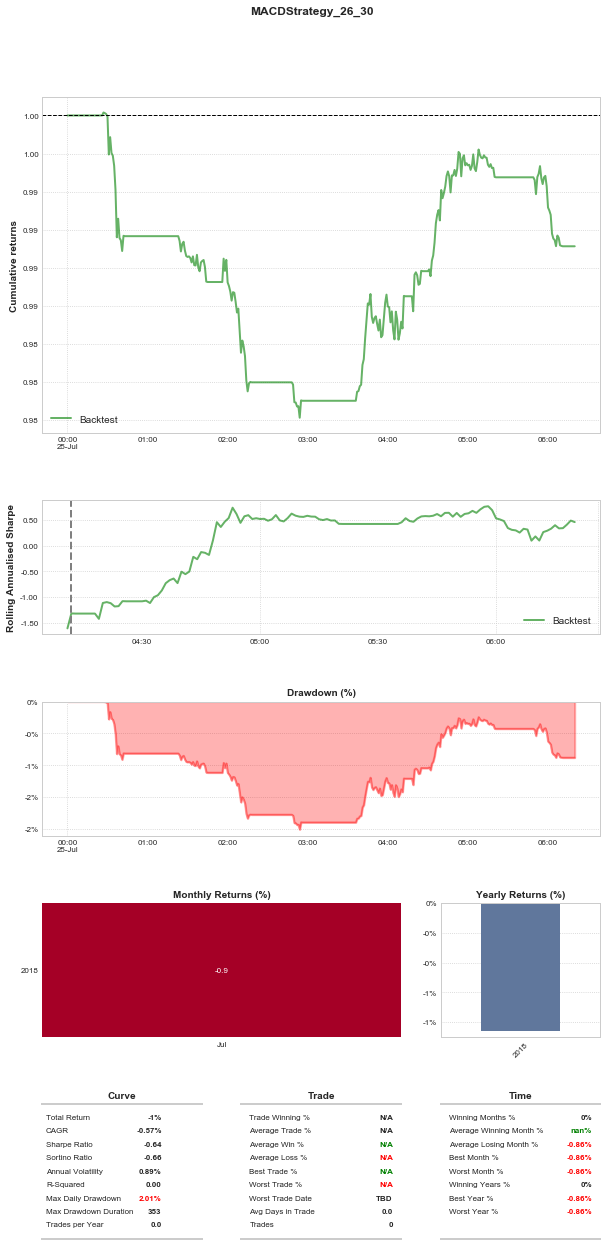

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:43:00+00:00
LONG: 2018-07-25 01:24:00+00:00
SHORT: 2018-07-25 01:48:00+00:00
LONG: 2018-07-25 01:57:00+00:00
SHORT: 2018-07-25 02:19:00+00:00
LONG: 2018-07-25 02:49:00+00:00
SHORT: 2018-07-25 02:58:00+00:00
LONG: 2018-07-25 03:38:00+00:00
SHORT: 2018-07-25 04:17:00+00:00
LONG: 2018-07-25 04:21:00+00:00
SHORT: 2018-07-25 05:24:00+00:00
LONG: 2018-07-25 05:52:00+00:00
SHORT: 2018-07-25 06:11:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.7627125432
Max Drawdown: 1.9152284457
Max Drawdown Duration: 353
Total Returns: -0.0102640000


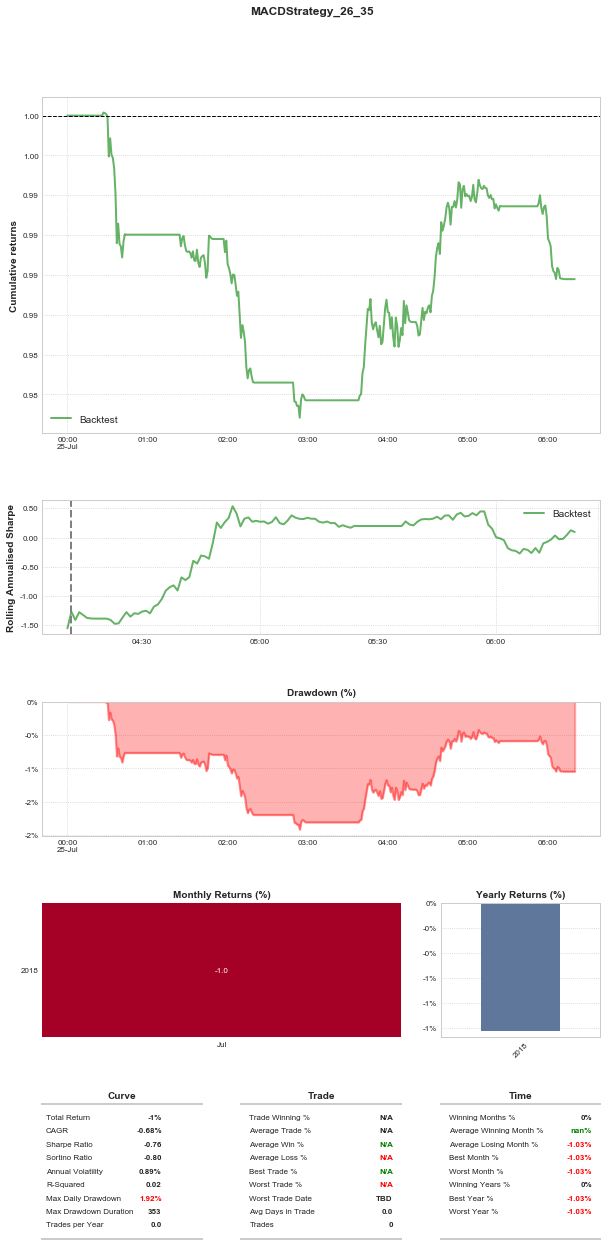

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:47:00+00:00
LONG: 2018-07-25 01:29:00+00:00
SHORT: 2018-07-25 02:21:00+00:00
LONG: 2018-07-25 03:43:00+00:00
SHORT: 2018-07-25 05:29:00+00:00
LONG: 2018-07-25 05:54:00+00:00
SHORT: 2018-07-25 06:12:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.6010057169
Max Drawdown: 1.0781908310
Max Drawdown Duration: 265
Total Returns: -0.0085280000


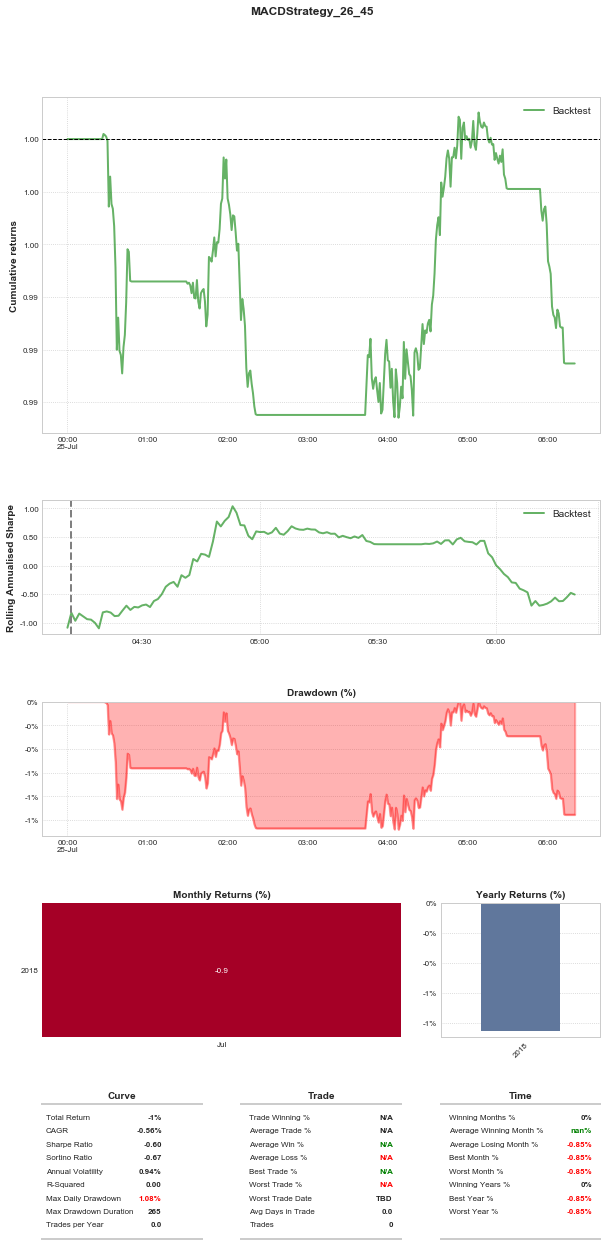

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:48:00+00:00
LONG: 2018-07-25 01:33:00+00:00
SHORT: 2018-07-25 02:21:00+00:00
LONG: 2018-07-25 03:47:00+00:00
SHORT: 2018-07-25 05:37:00+00:00
LONG: 2018-07-25 05:56:00+00:00
SHORT: 2018-07-25 06:10:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.5973316492
Max Drawdown: 1.4661155736
Max Drawdown Duration: 353
Total Returns: -0.0084280000


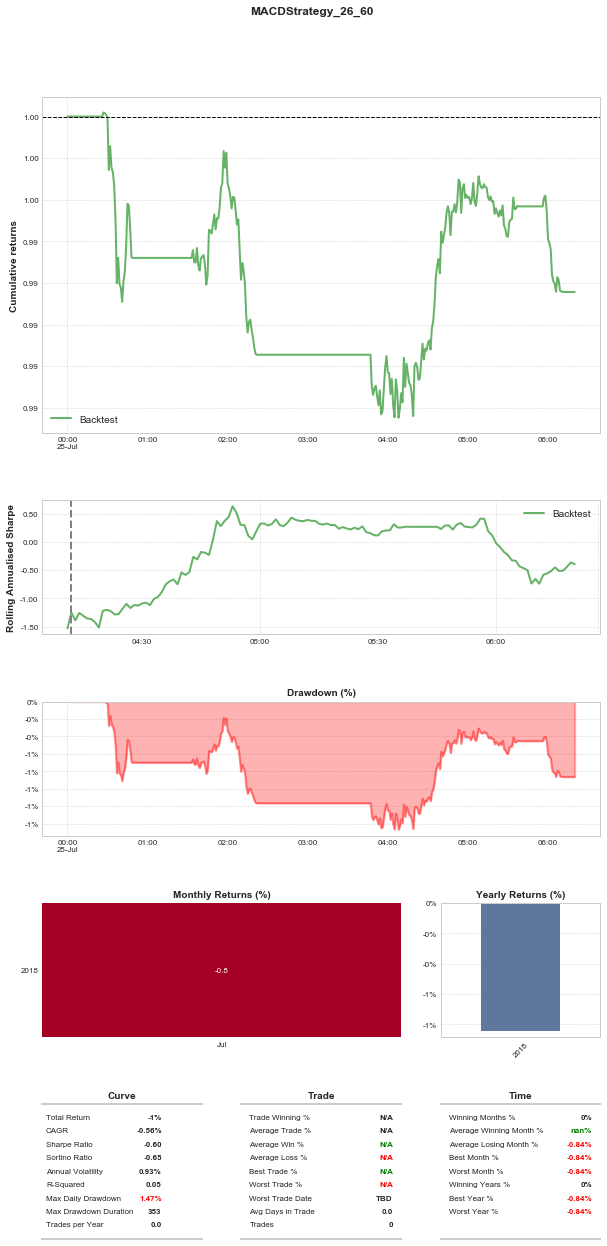

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:48:00+00:00
LONG: 2018-07-25 01:42:00+00:00
SHORT: 2018-07-25 02:21:00+00:00
LONG: 2018-07-25 03:49:00+00:00
SHORT: 2018-07-25 05:45:00+00:00
LONG: 2018-07-25 05:55:00+00:00
SHORT: 2018-07-25 06:08:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.4451294301
Max Drawdown: 1.2921493230
Max Drawdown Duration: 353
Total Returns: -0.0062280000


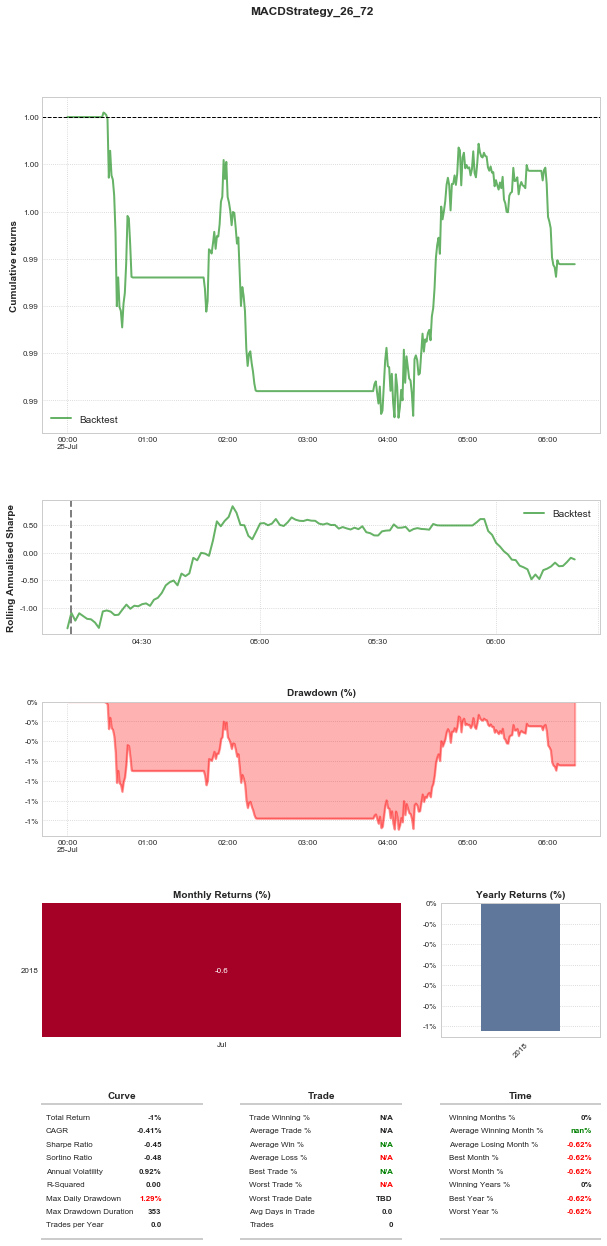

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:48:00+00:00
LONG: 2018-07-25 01:54:00+00:00
SHORT: 2018-07-25 02:22:00+00:00
LONG: 2018-07-25 03:50:00+00:00
SHORT: 2018-07-25 06:08:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.5491130109
Max Drawdown: 1.5520988928
Max Drawdown Duration: 353
Total Returns: -0.0075760000


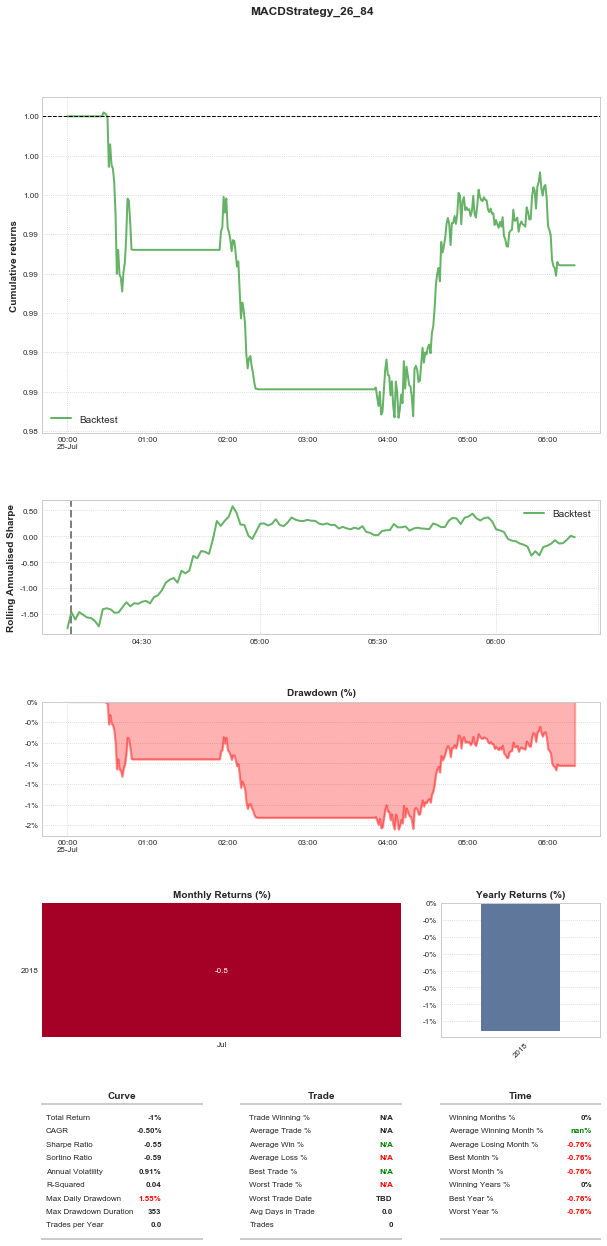

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:48:00+00:00
LONG: 2018-07-25 01:59:00+00:00
SHORT: 2018-07-25 02:23:00+00:00
LONG: 2018-07-25 03:51:00+00:00
SHORT: 2018-07-25 06:11:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.9542688840
Max Drawdown: 2.0580007479
Max Drawdown Duration: 353
Total Returns: -0.0131760000


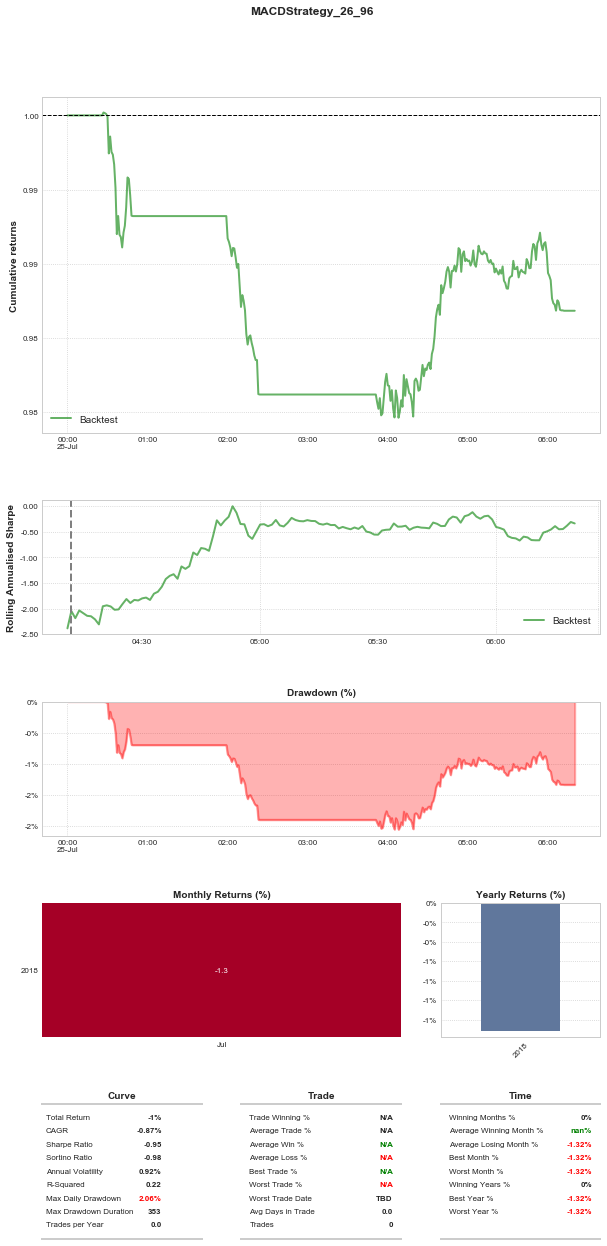

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:48:00+00:00
LONG: 2018-07-25 02:07:00+00:00
SHORT: 2018-07-25 02:16:00+00:00
LONG: 2018-07-25 03:56:00+00:00
SHORT: 2018-07-25 06:17:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.4841672487
Max Drawdown: 1.2189635211
Max Drawdown Duration: 326
Total Returns: -0.0066160000


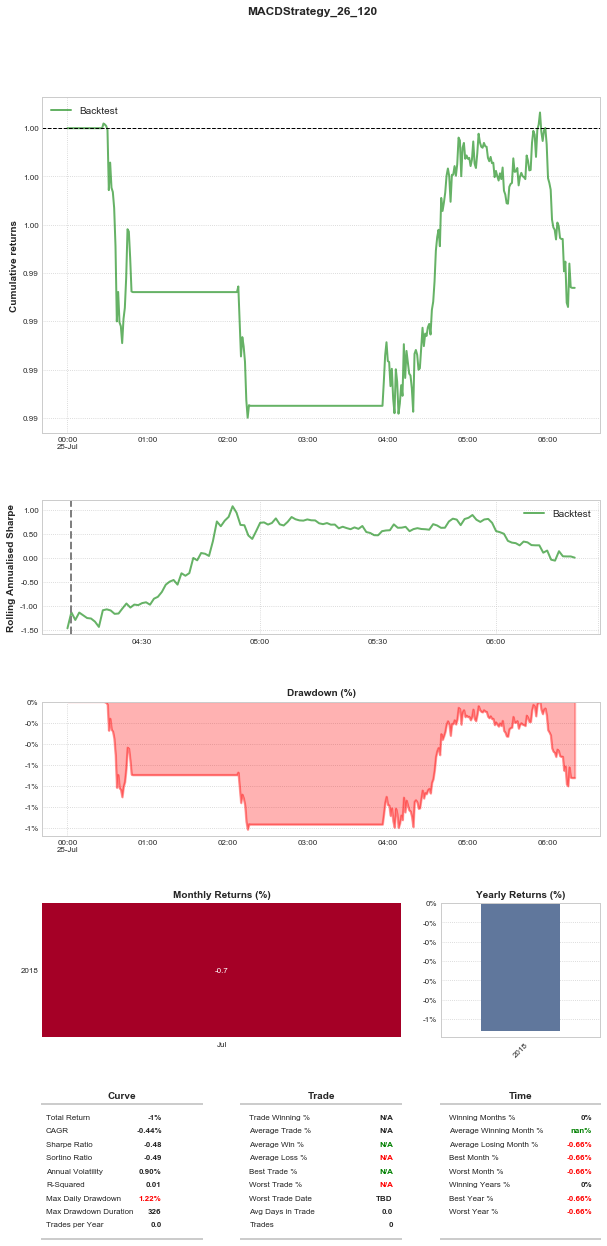

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:26:00+00:00
SHORT: 2018-07-25 00:48:00+00:00
LONG: 2018-07-25 02:06:00+00:00
SHORT: 2018-07-25 02:15:00+00:00
LONG: 2018-07-25 04:29:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -1.0995329671
Max Drawdown: 1.3301419525
Max Drawdown Duration: 353
Total Returns: -0.0131100000


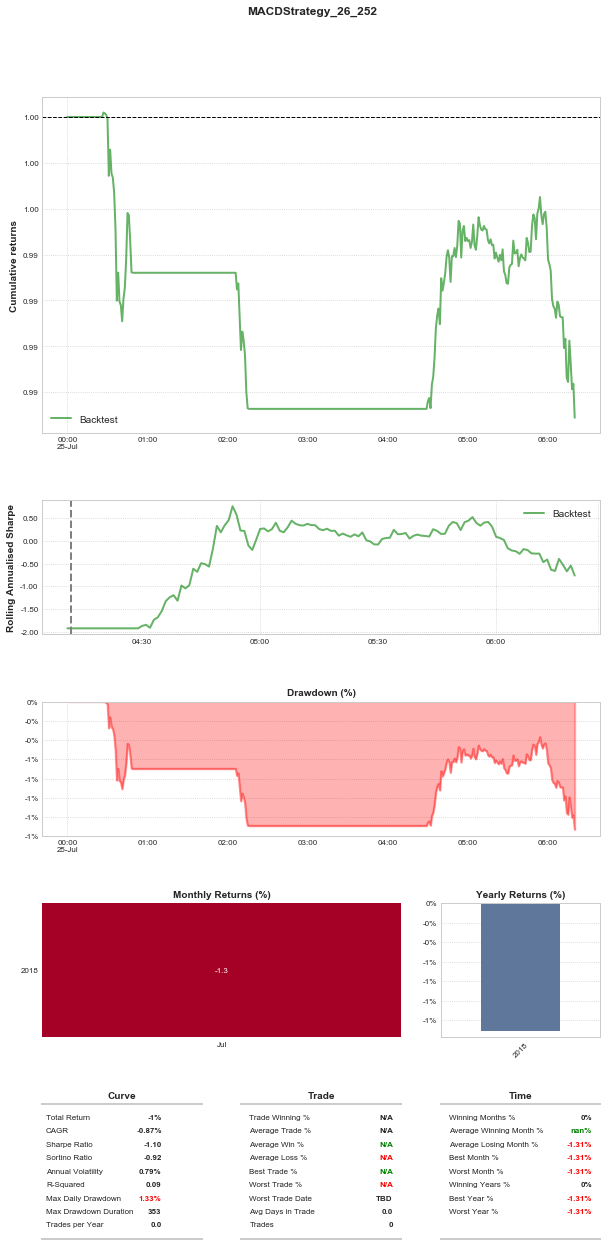

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:44:00+00:00
LONG: 2018-07-25 01:25:00+00:00
SHORT: 2018-07-25 01:49:00+00:00
LONG: 2018-07-25 01:59:00+00:00
SHORT: 2018-07-25 02:20:00+00:00
LONG: 2018-07-25 02:52:00+00:00
SHORT: 2018-07-25 02:59:00+00:00
LONG: 2018-07-25 03:40:00+00:00
SHORT: 2018-07-25 04:17:00+00:00
LONG: 2018-07-25 04:22:00+00:00
SHORT: 2018-07-25 04:31:00+00:00
LONG: 2018-07-25 04:34:00+00:00
SHORT: 2018-07-25 05:24:00+00:00
LONG: 2018-07-25 05:25:00+00:00
SHORT: 2018-07-25 05:26:00+00:00
LONG: 2018-07-25 05:53:00+00:00
SHORT: 2018-07-25 06:12:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.7293736124
Max Drawdown: 1.5542000000
Max Drawdown Duration: 350
Total Returns: -0.0097880000


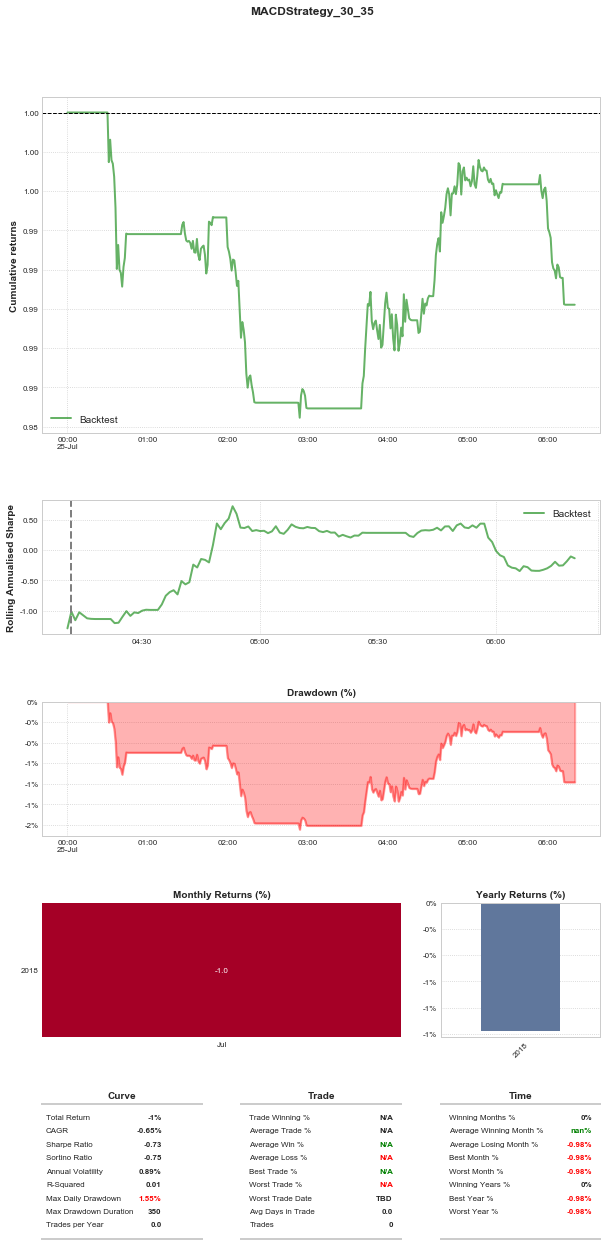

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:49:00+00:00
LONG: 2018-07-25 01:31:00+00:00
SHORT: 2018-07-25 02:22:00+00:00
LONG: 2018-07-25 02:57:00+00:00
SHORT: 2018-07-25 03:01:00+00:00
LONG: 2018-07-25 03:44:00+00:00
SHORT: 2018-07-25 05:30:00+00:00
LONG: 2018-07-25 05:57:00+00:00
SHORT: 2018-07-25 06:13:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.8499329904
Max Drawdown: 1.5302000000
Max Drawdown Duration: 350
Total Returns: -0.0121200000


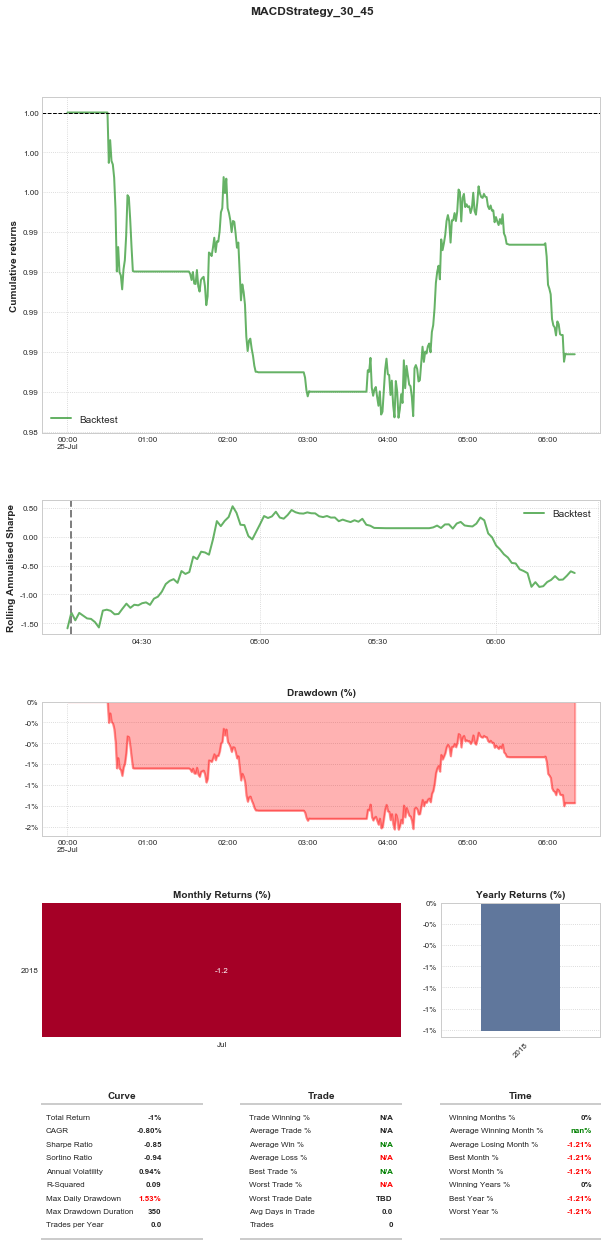

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 01:35:00+00:00
SHORT: 2018-07-25 02:22:00+00:00
LONG: 2018-07-25 03:48:00+00:00
SHORT: 2018-07-25 05:38:00+00:00
LONG: 2018-07-25 05:58:00+00:00
SHORT: 2018-07-25 06:10:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.7522248746
Max Drawdown: 1.5390000000
Max Drawdown Duration: 350
Total Returns: -0.0106080000


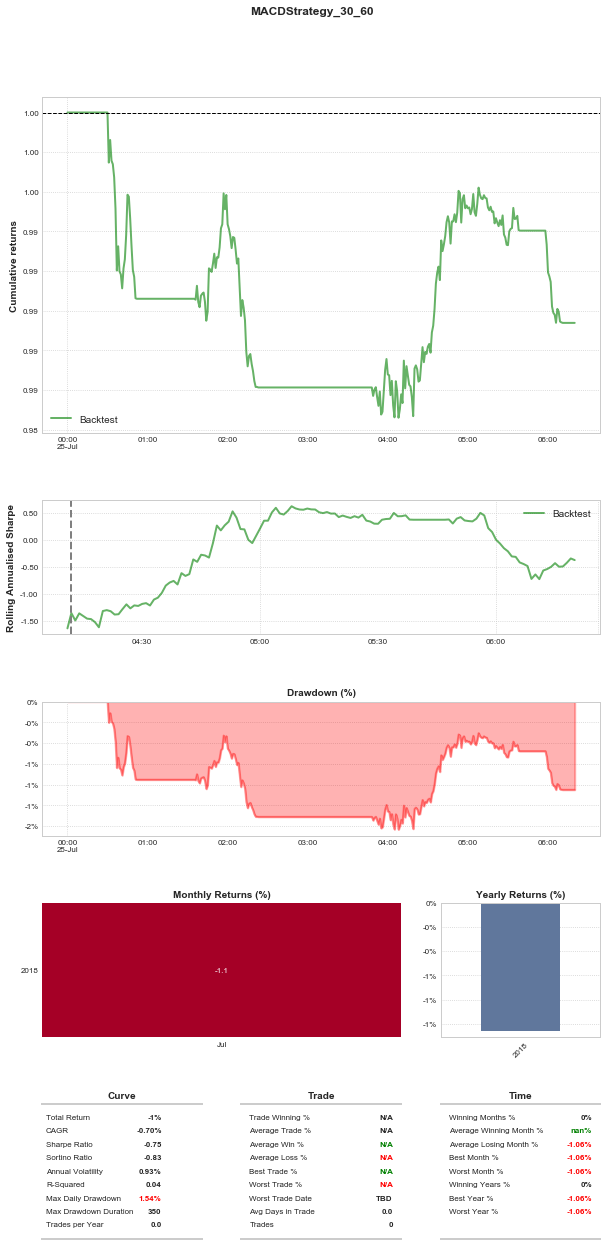

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 01:43:00+00:00
SHORT: 2018-07-25 02:23:00+00:00
LONG: 2018-07-25 03:50:00+00:00
SHORT: 2018-07-25 05:46:00+00:00
LONG: 2018-07-25 05:58:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.8465360839
Max Drawdown: 1.7490000000
Max Drawdown Duration: 350
Total Returns: -0.0121080000


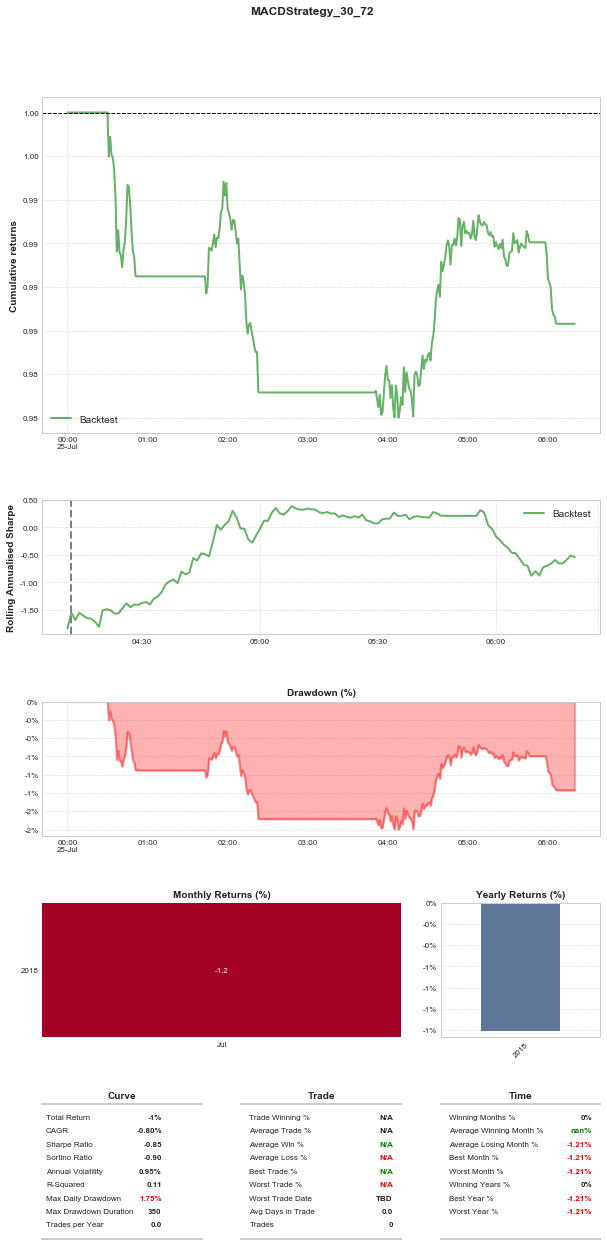

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 01:54:00+00:00
SHORT: 2018-07-25 02:24:00+00:00
LONG: 2018-07-25 03:52:00+00:00
SHORT: 2018-07-25 06:07:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.7759096315
Max Drawdown: 1.8950000000
Max Drawdown Duration: 350
Total Returns: -0.0110560000


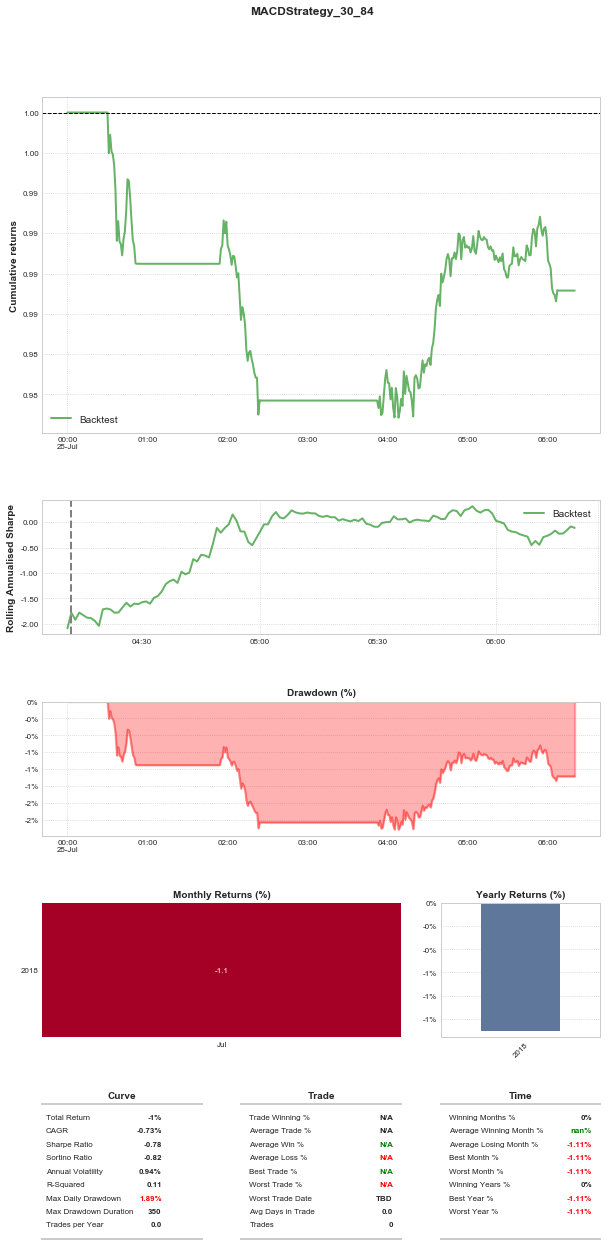

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 02:00:00+00:00
SHORT: 2018-07-25 02:24:00+00:00
LONG: 2018-07-25 03:53:00+00:00
SHORT: 2018-07-25 06:11:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.8983784360
Max Drawdown: 1.9918000000
Max Drawdown Duration: 350
Total Returns: -0.0124560000


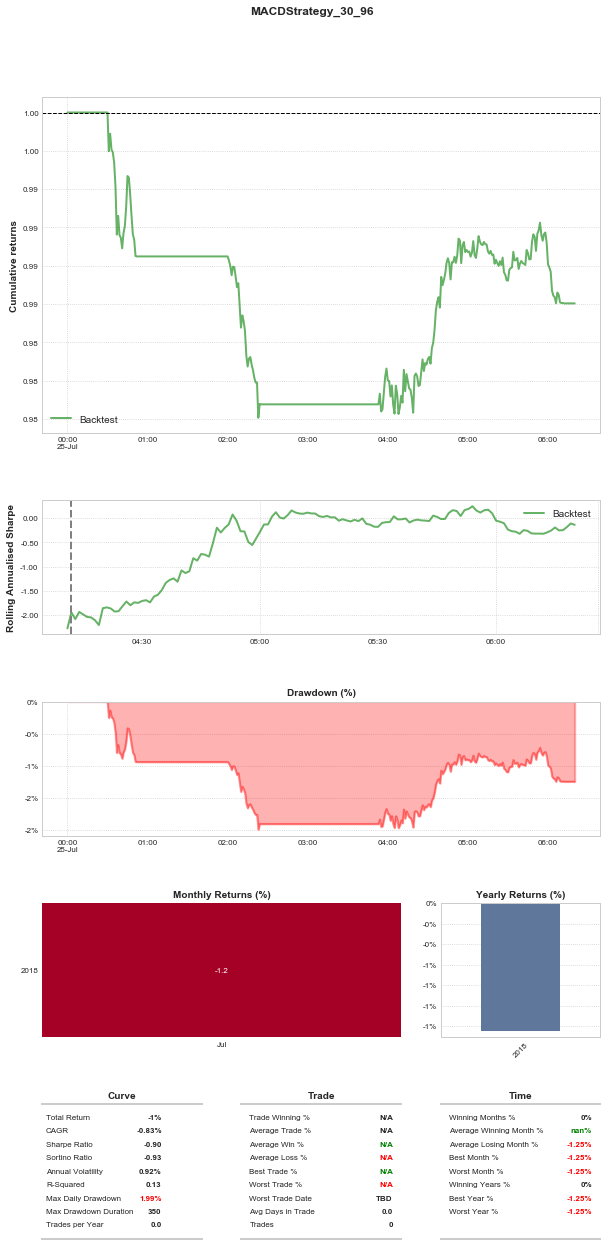

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 02:13:00+00:00
SHORT: 2018-07-25 02:16:00+00:00
LONG: 2018-07-25 03:59:00+00:00
SHORT: 2018-07-25 06:19:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.7398969972
Max Drawdown: 1.4230000000
Max Drawdown Duration: 350
Total Returns: -0.0099160000


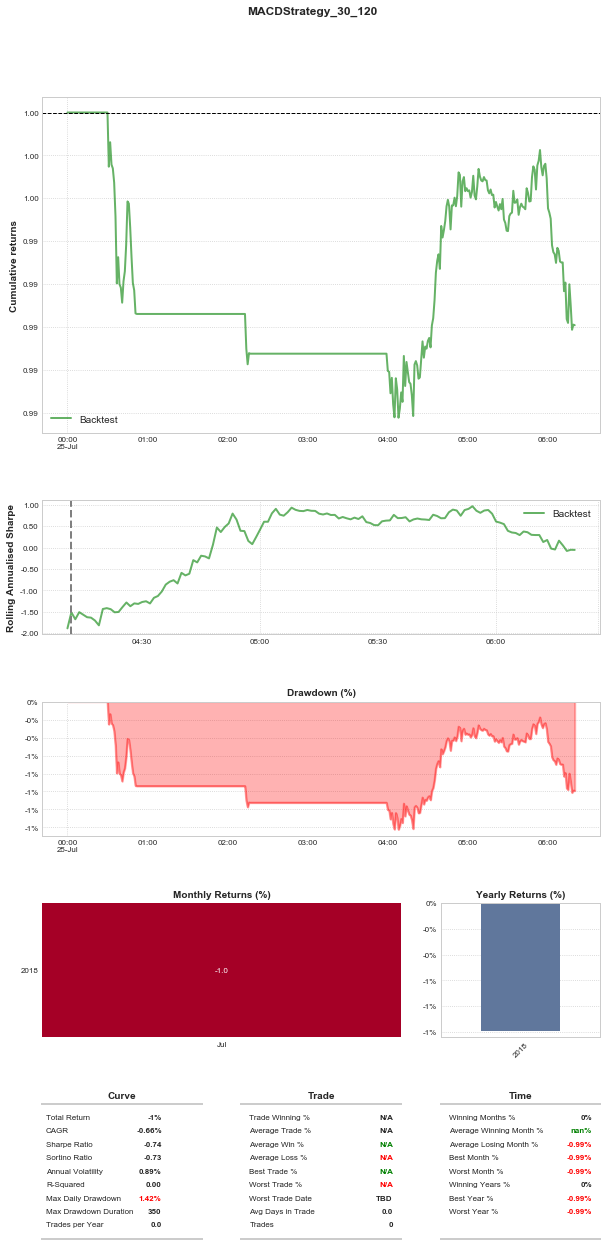

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:30:00+00:00
SHORT: 2018-07-25 00:51:00+00:00
LONG: 2018-07-25 04:28:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.8562048596
Max Drawdown: 0.9878000000
Max Drawdown Duration: 350
Total Returns: -0.0098780000


Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:35:00+00:00
SHORT: 2018-07-25 00:50:00+00:00
LONG: 2018-07-25 01:32:00+00:00
SHORT: 2018-07-25 02:24:00+00:00
LONG: 2018-07-25 02:59:00+00:00
SHORT: 2018-07-25 03:06:00+00:00
LONG: 2018-07-25 03:45:00+00:00
SHORT: 2018-07-25 05:32:00+00:00
LONG: 2018-07-25 05:58:00+00:00
SHORT: 2018-07-25 06:14:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.9548323997
Max Drawdown: 1.5862000000
Max Drawdown Duration: 345
Total Returns: -0.0136600000


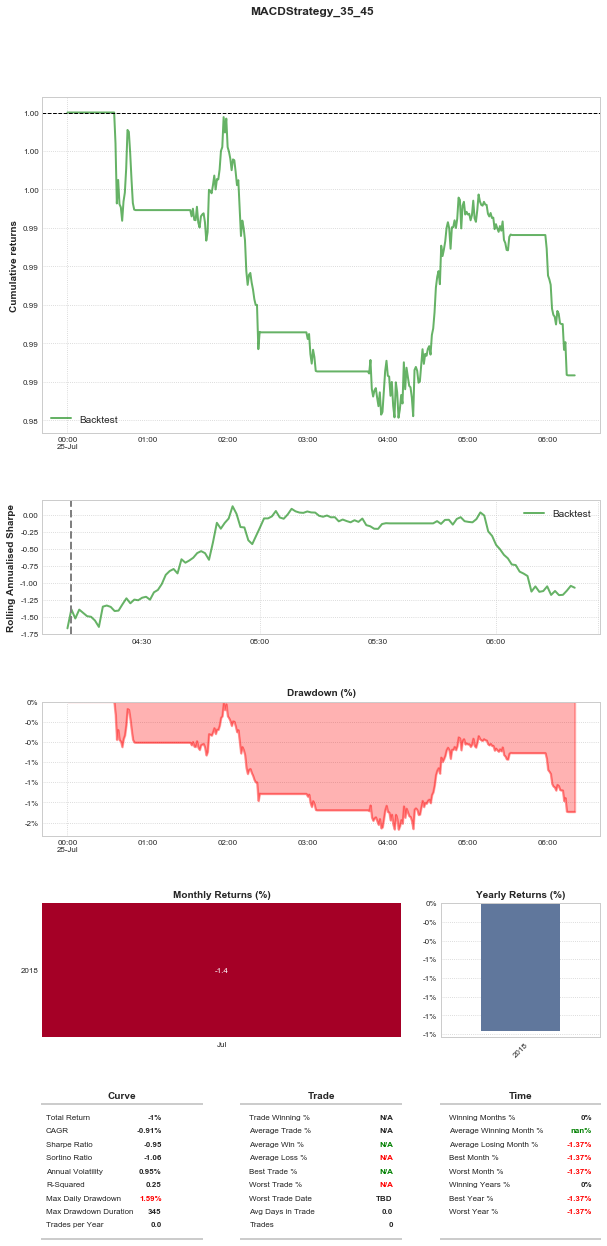

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:35:00+00:00
SHORT: 2018-07-25 00:54:00+00:00
LONG: 2018-07-25 01:38:00+00:00
SHORT: 2018-07-25 02:24:00+00:00
LONG: 2018-07-25 03:50:00+00:00
SHORT: 2018-07-25 05:40:00+00:00
LONG: 2018-07-25 06:05:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
LONG: 2018-07-25 06:07:00+00:00
SHORT: 2018-07-25 06:09:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3038633618
Max Drawdown: 1.2990000000
Max Drawdown Duration: 345
Total Returns: -0.0041800000


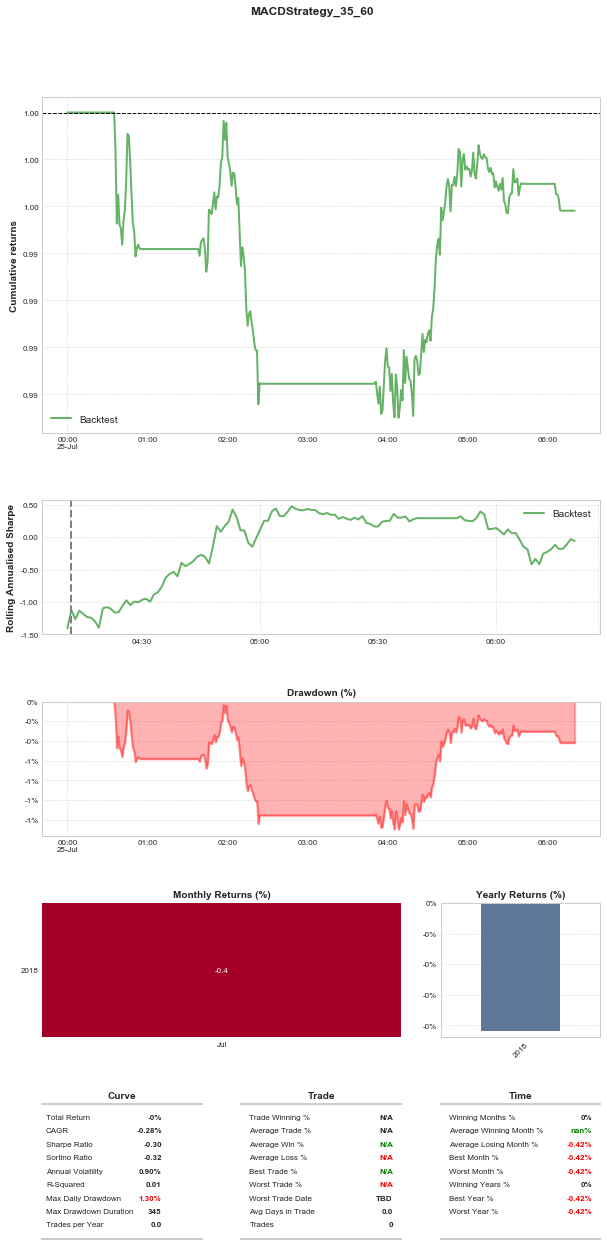

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:35:00+00:00
SHORT: 2018-07-25 00:54:00+00:00
LONG: 2018-07-25 01:45:00+00:00
SHORT: 2018-07-25 02:24:00+00:00
LONG: 2018-07-25 03:52:00+00:00
SHORT: 2018-07-25 05:47:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1464989734
Max Drawdown: 1.2250260463
Max Drawdown Duration: 263
Total Returns: -0.0020360000


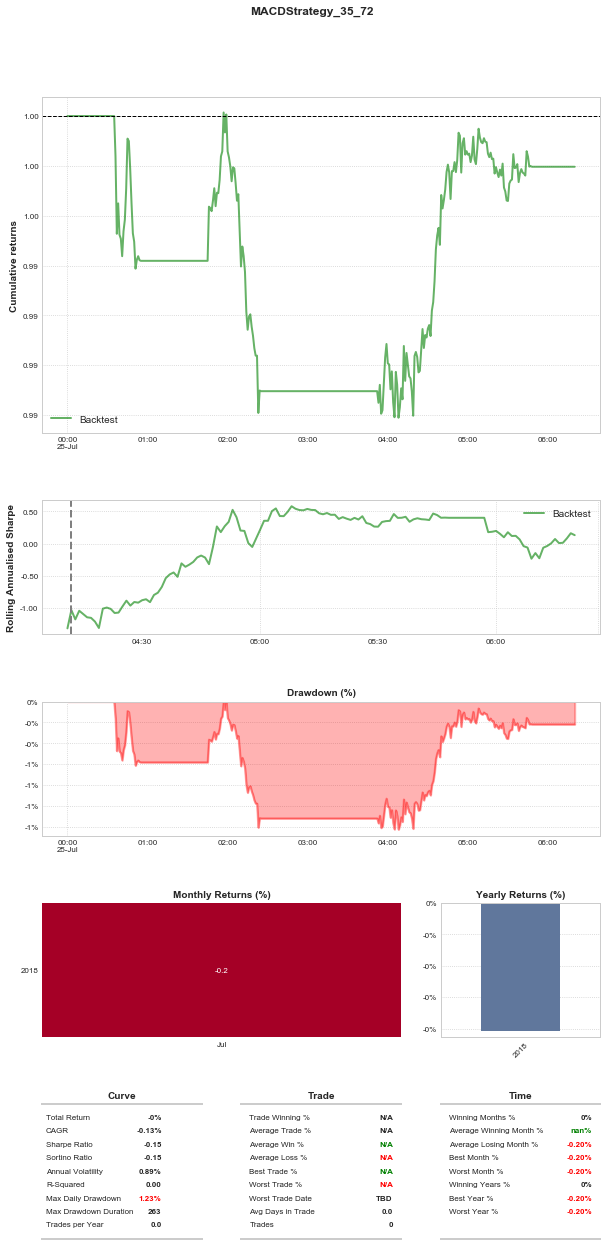

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:35:00+00:00
SHORT: 2018-07-25 00:54:00+00:00
LONG: 2018-07-25 01:53:00+00:00
SHORT: 2018-07-25 02:25:00+00:00
LONG: 2018-07-25 03:55:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.4313297207
Max Drawdown: 1.4658000000
Max Drawdown Duration: 345
Total Returns: -0.0059160000


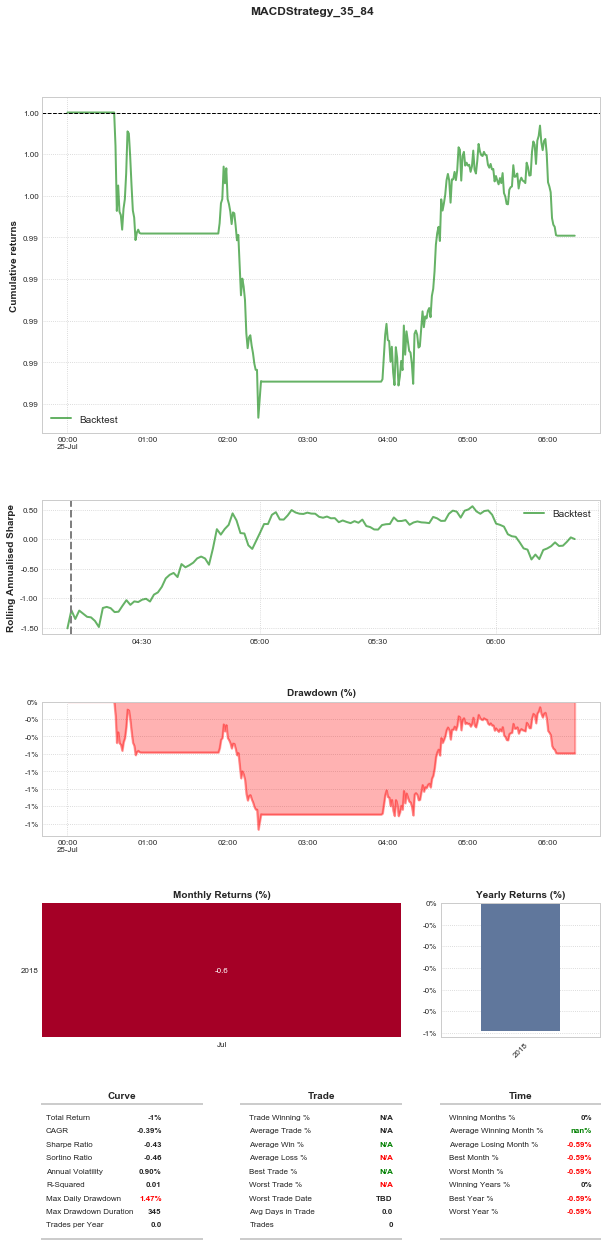

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:35:00+00:00
SHORT: 2018-07-25 00:54:00+00:00
LONG: 2018-07-25 02:01:00+00:00
SHORT: 2018-07-25 02:26:00+00:00
LONG: 2018-07-25 03:56:00+00:00
SHORT: 2018-07-25 06:11:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.5211971434
Max Drawdown: 1.6098000000
Max Drawdown Duration: 345
Total Returns: -0.0069560000


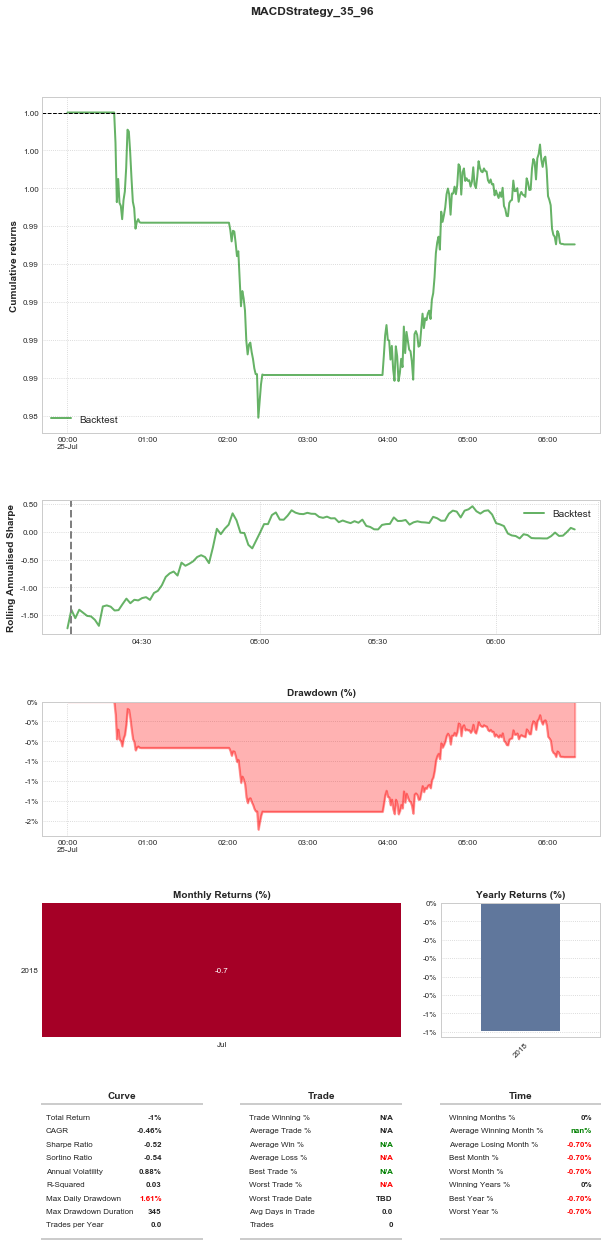

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:35:00+00:00
SHORT: 2018-07-25 00:54:00+00:00
LONG: 2018-07-25 04:01:00+00:00
SHORT: 2018-07-25 06:20:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3997576848
Max Drawdown: 0.9576884864
Max Drawdown Duration: 244
Total Returns: -0.0051180000


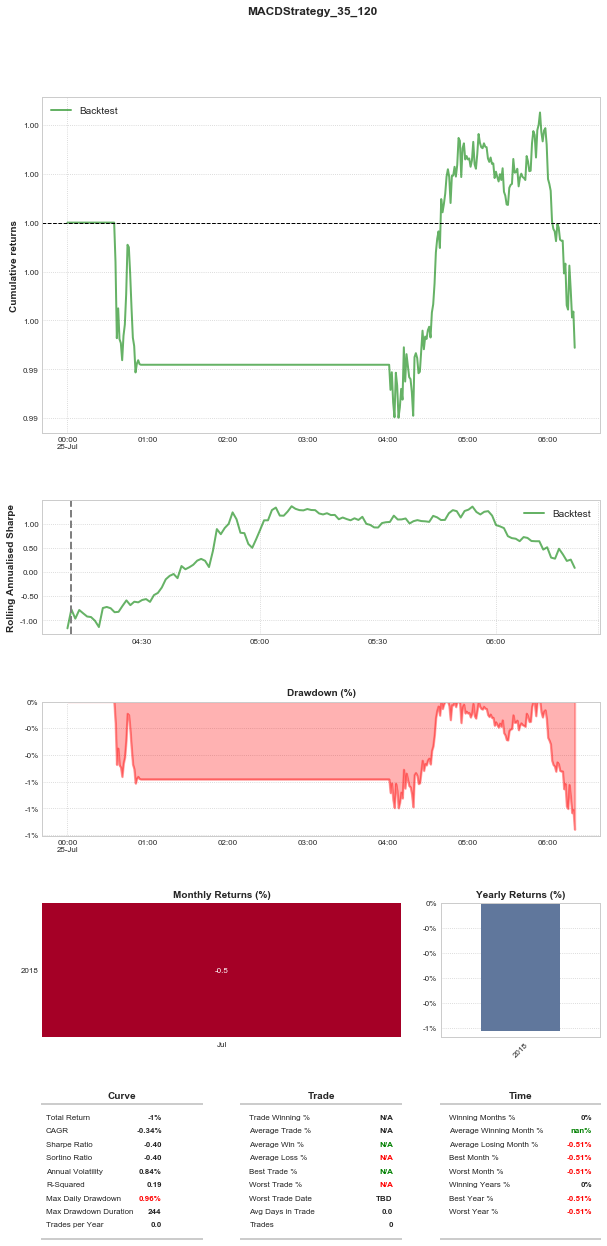

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:35:00+00:00
SHORT: 2018-07-25 00:54:00+00:00
LONG: 2018-07-25 04:29:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.5663350998
Max Drawdown: 0.9587192627
Max Drawdown Duration: 247
Total Returns: -0.0061980000


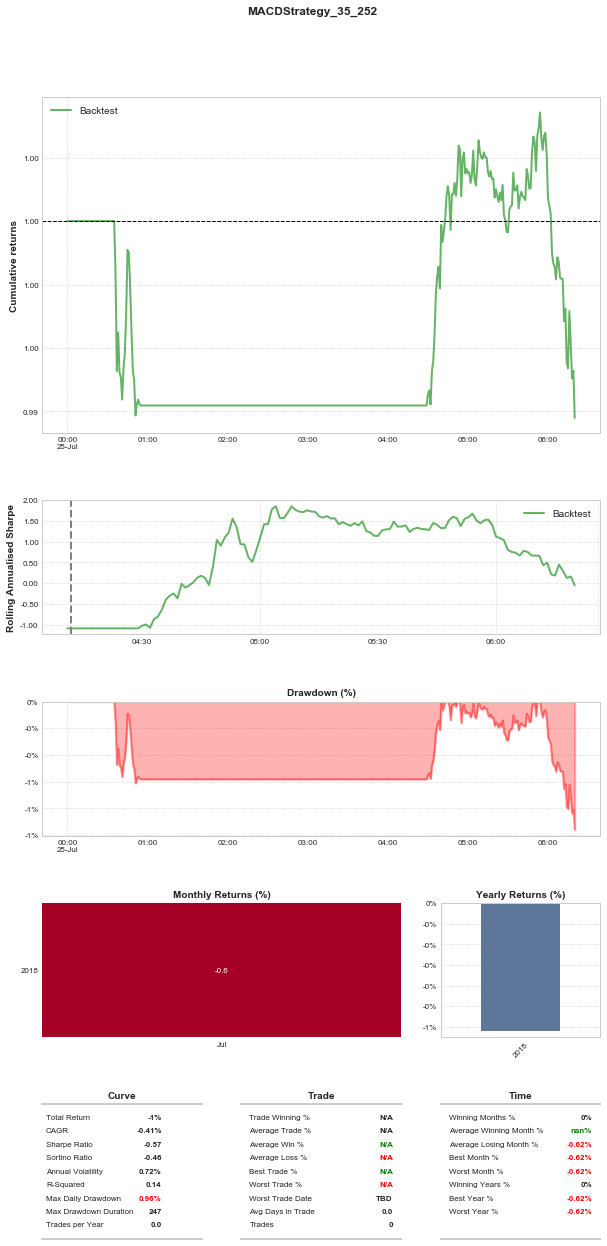

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:45:00+00:00
SHORT: 2018-07-25 01:00:00+00:00
LONG: 2018-07-25 01:46:00+00:00
SHORT: 2018-07-25 02:20:00+00:00
LONG: 2018-07-25 03:55:00+00:00
SHORT: 2018-07-25 05:43:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1733610547
Max Drawdown: 1.1690000000
Max Drawdown Duration: 335
Total Returns: -0.0019960000


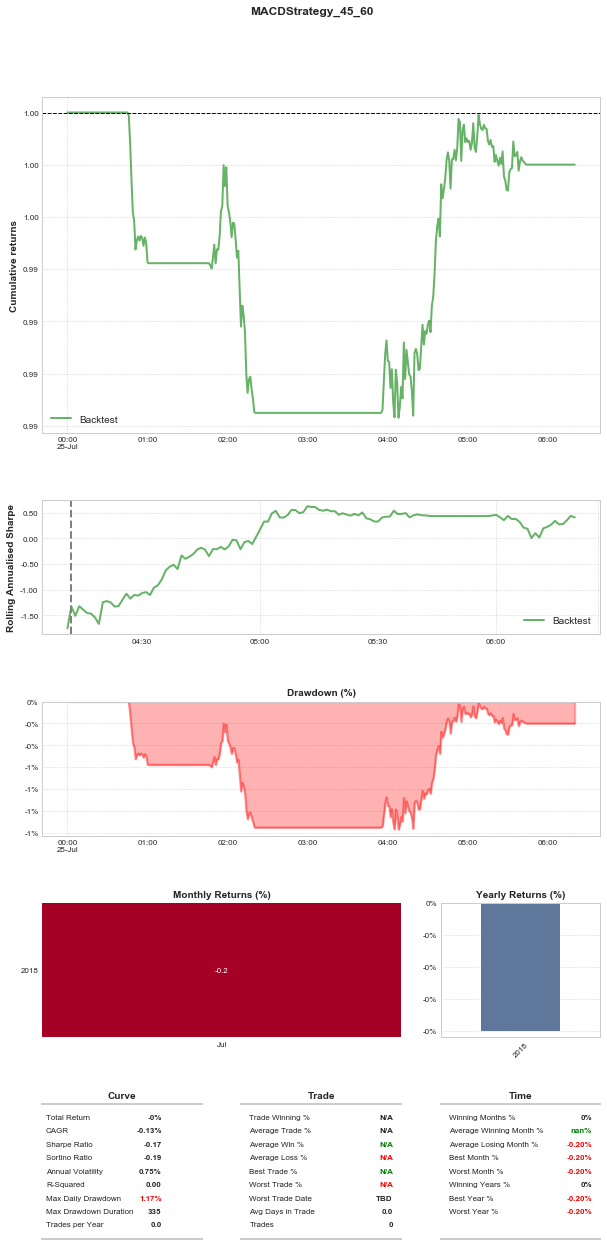

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:45:00+00:00
SHORT: 2018-07-25 01:01:00+00:00
LONG: 2018-07-25 01:48:00+00:00
SHORT: 2018-07-25 02:23:00+00:00
LONG: 2018-07-25 03:57:00+00:00
SHORT: 2018-07-25 05:53:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.4621549351
Max Drawdown: 1.7670000000
Max Drawdown Duration: 335
Total Returns: -0.0057160000


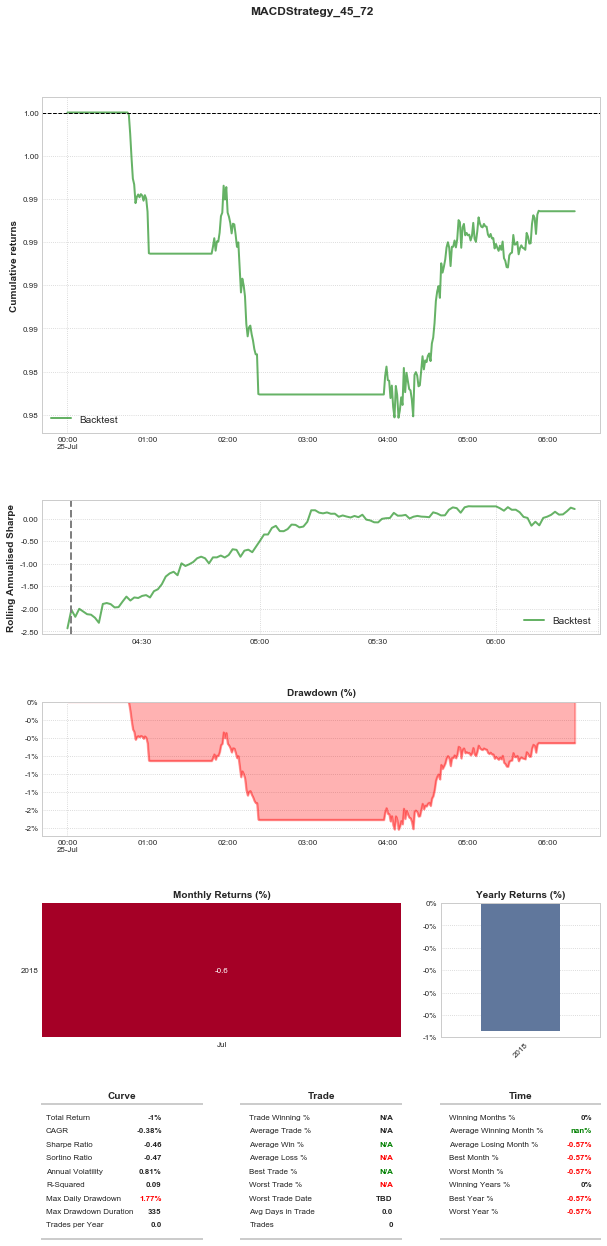

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:45:00+00:00
SHORT: 2018-07-25 01:01:00+00:00
LONG: 2018-07-25 01:55:00+00:00
SHORT: 2018-07-25 02:27:00+00:00
LONG: 2018-07-25 03:59:00+00:00
SHORT: 2018-07-25 06:02:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.7188189483
Max Drawdown: 1.8498000000
Max Drawdown Duration: 335
Total Returns: -0.0089760000


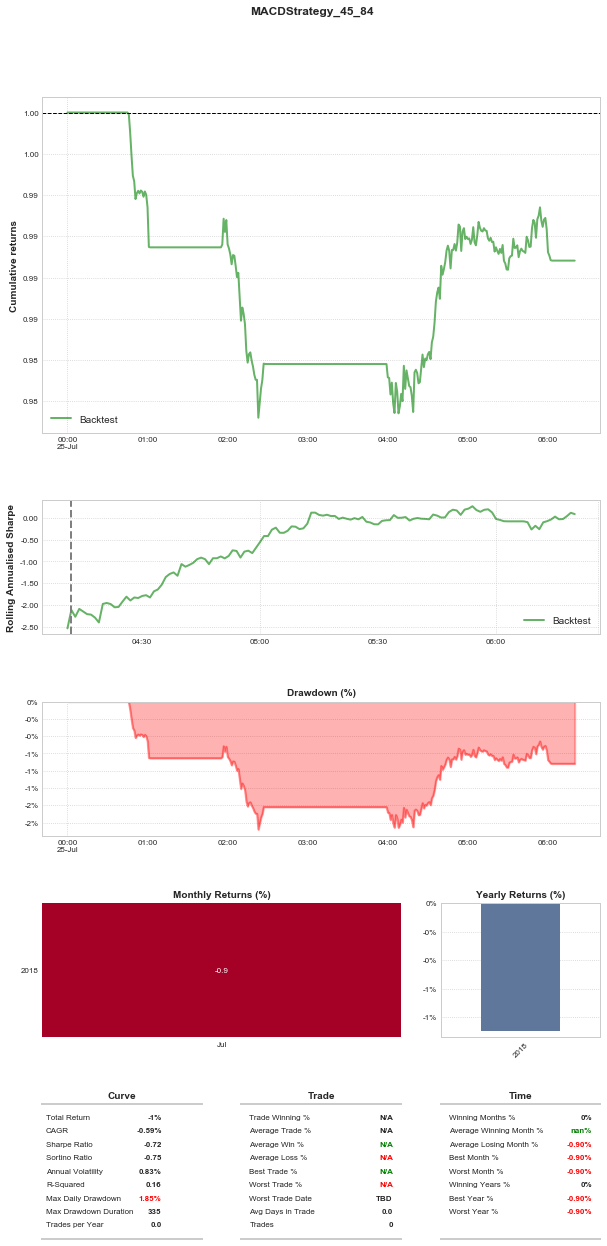

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:45:00+00:00
SHORT: 2018-07-25 01:01:00+00:00
LONG: 2018-07-25 02:01:00+00:00
SHORT: 2018-07-25 02:31:00+00:00
LONG: 2018-07-25 04:01:00+00:00
SHORT: 2018-07-25 06:10:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.8113613975
Max Drawdown: 1.8458000000
Max Drawdown Duration: 335
Total Returns: -0.0099560000


Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:45:00+00:00
SHORT: 2018-07-25 01:01:00+00:00
LONG: 2018-07-25 04:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.6358006414
Max Drawdown: 1.0038000000
Max Drawdown Duration: 239
Total Returns: -0.0071780000


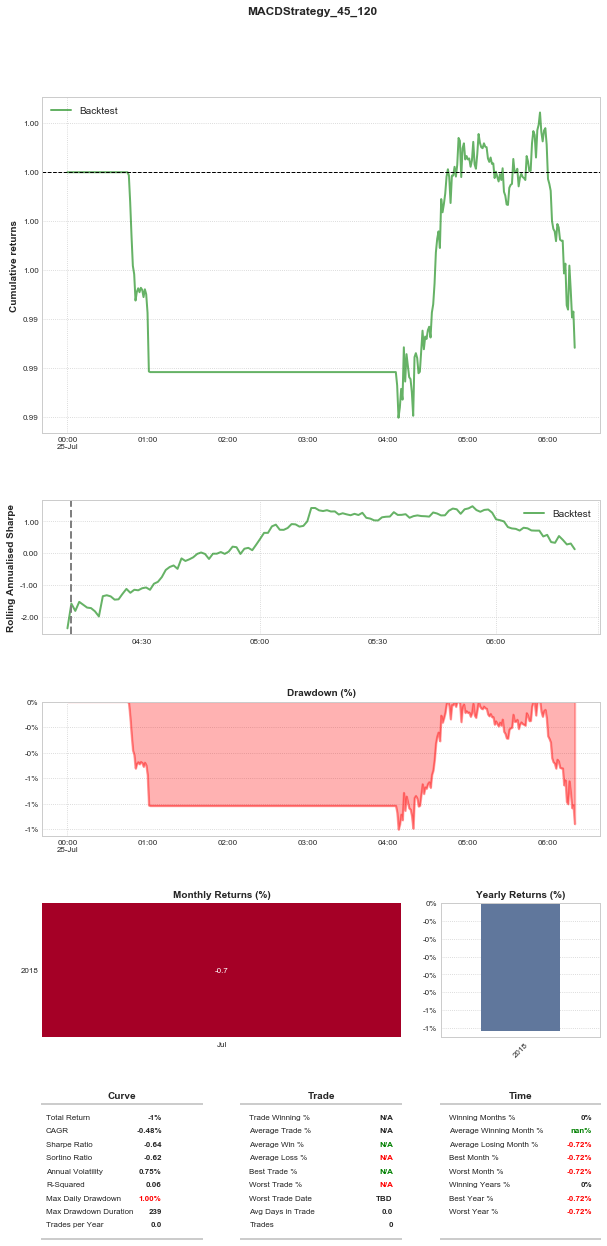

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 00:45:00+00:00
SHORT: 2018-07-25 01:01:00+00:00
LONG: 2018-07-25 04:30:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.9177004010
Max Drawdown: 0.9613251497
Max Drawdown Duration: 307
Total Returns: -0.0089180000


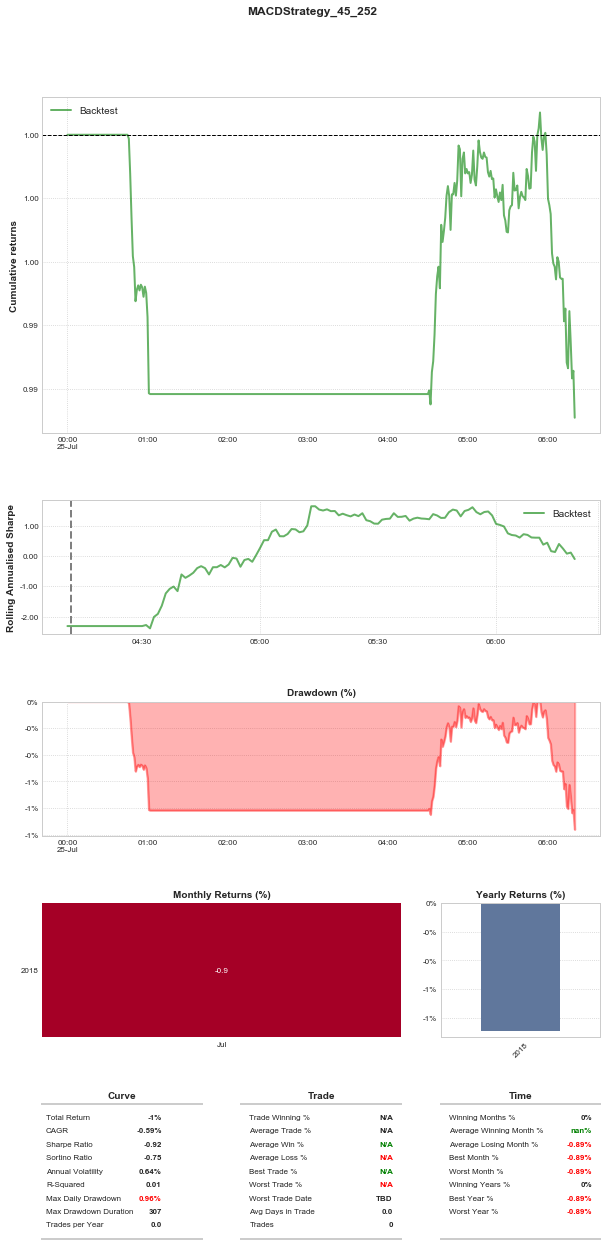

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:00:00+00:00
SHORT: 2018-07-25 01:12:00+00:00
LONG: 2018-07-25 01:58:00+00:00
SHORT: 2018-07-25 02:24:00+00:00
LONG: 2018-07-25 04:06:00+00:00
SHORT: 2018-07-25 05:59:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.0486923879
Max Drawdown: 1.2955908761
Max Drawdown Duration: 261
Total Returns: -0.0005960000


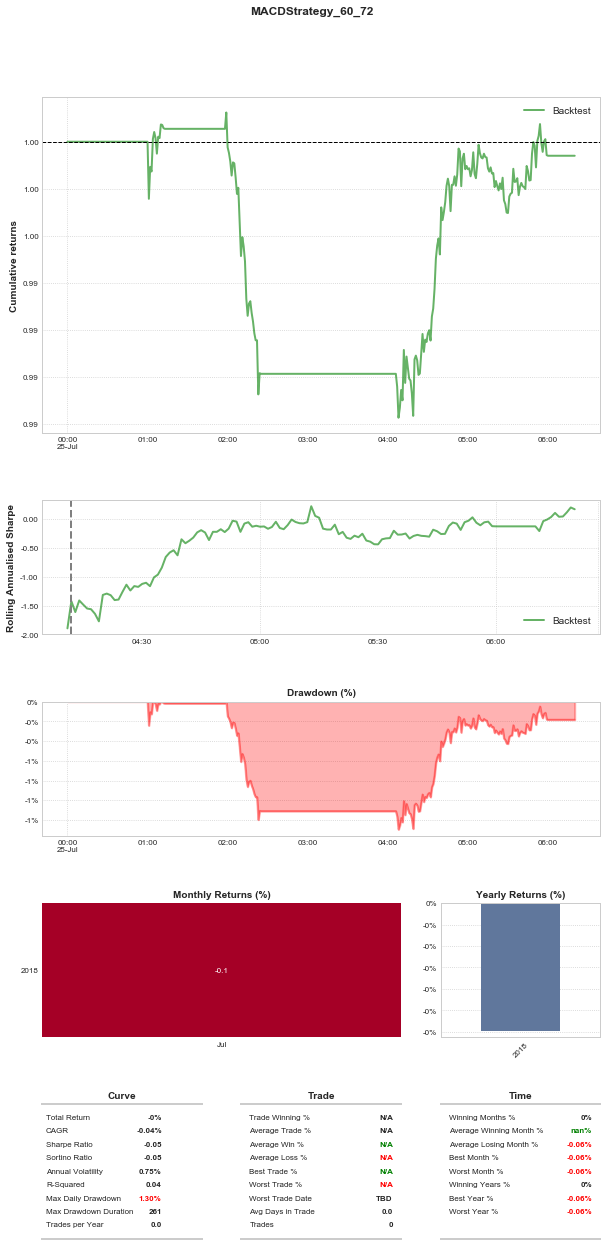

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:00:00+00:00
SHORT: 2018-07-25 01:12:00+00:00
LONG: 2018-07-25 02:00:00+00:00
SHORT: 2018-07-25 02:28:00+00:00
LONG: 2018-07-25 04:08:00+00:00
SHORT: 2018-07-25 06:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.0968381793
Max Drawdown: 1.0704143159
Max Drawdown Duration: 206
Total Returns: 0.0010640000


Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:00:00+00:00
SHORT: 2018-07-25 01:12:00+00:00
LONG: 2018-07-25 02:06:00+00:00
SHORT: 2018-07-25 02:32:00+00:00
LONG: 2018-07-25 04:10:00+00:00
SHORT: 2018-07-25 06:11:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.0093812148
Max Drawdown: 0.9425081990
Max Drawdown Duration: 209
Total Returns: 0.0000640000


Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:00:00+00:00
SHORT: 2018-07-25 01:12:00+00:00
LONG: 2018-07-25 04:13:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.1861137317
Max Drawdown: 0.9510420930
Max Drawdown Duration: 183
Total Returns: 0.0019020000


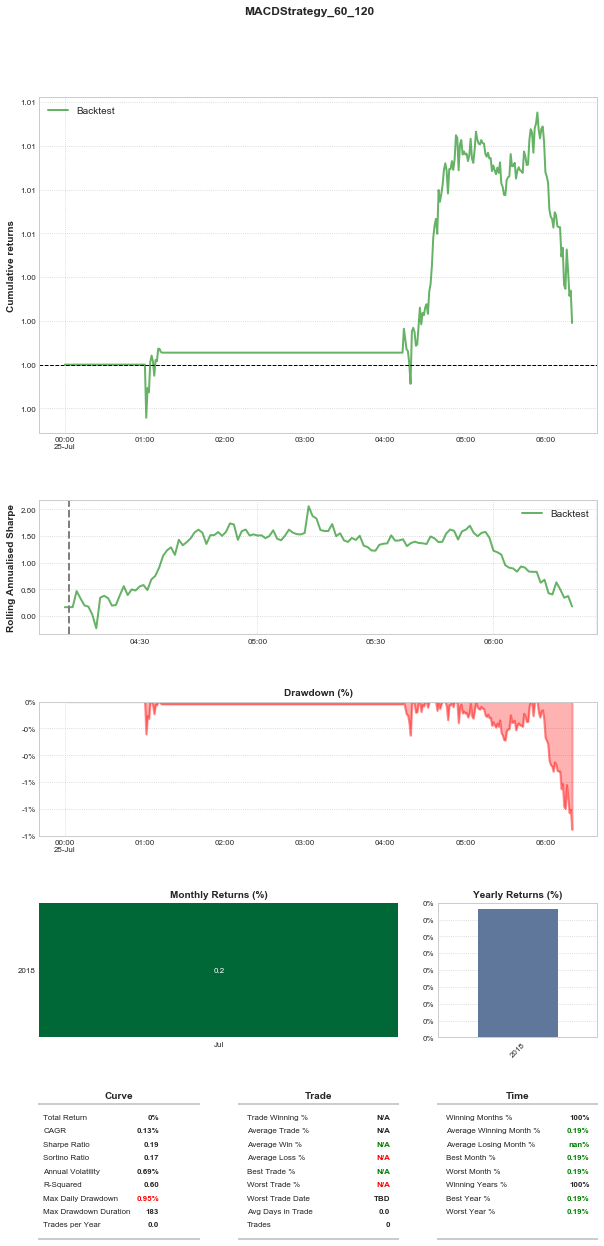

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:00:00+00:00
SHORT: 2018-07-25 01:12:00+00:00
LONG: 2018-07-25 04:36:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3619339395
Max Drawdown: 0.9560324455
Max Drawdown Duration: 206
Total Returns: -0.0033780000


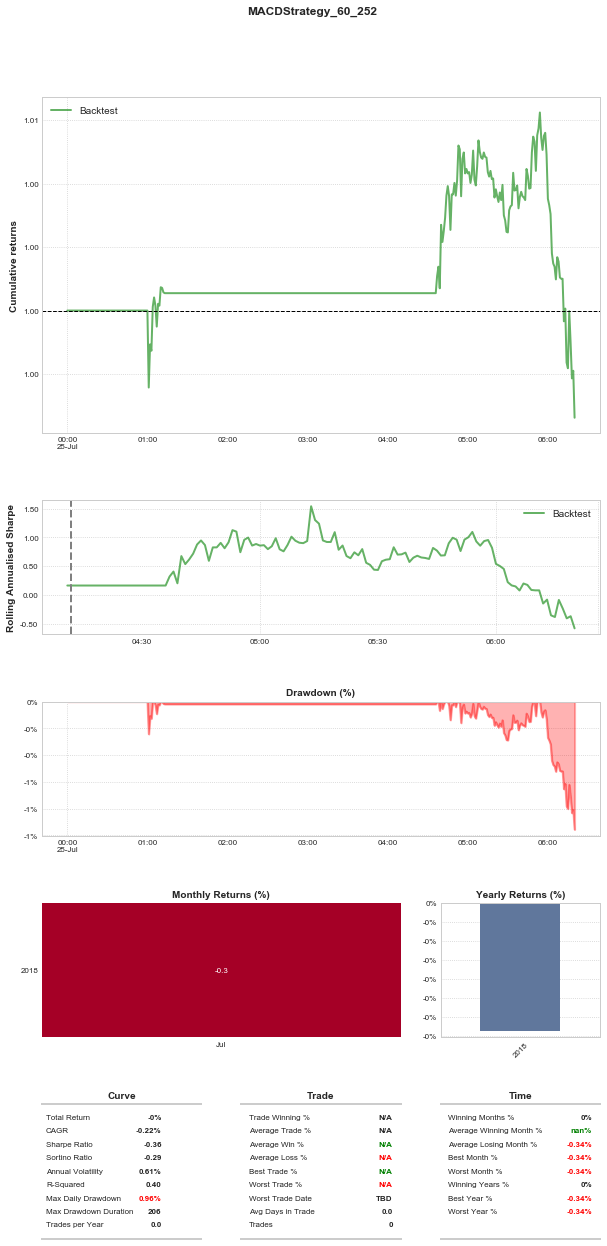

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:12:00+00:00
SHORT: 2018-07-25 01:23:00+00:00
LONG: 2018-07-25 02:09:00+00:00
SHORT: 2018-07-25 02:33:00+00:00
LONG: 2018-07-25 04:15:00+00:00
SHORT: 2018-07-25 06:09:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.3830207724
Max Drawdown: 0.7312446518
Max Drawdown Duration: 192
Total Returns: 0.0039240000


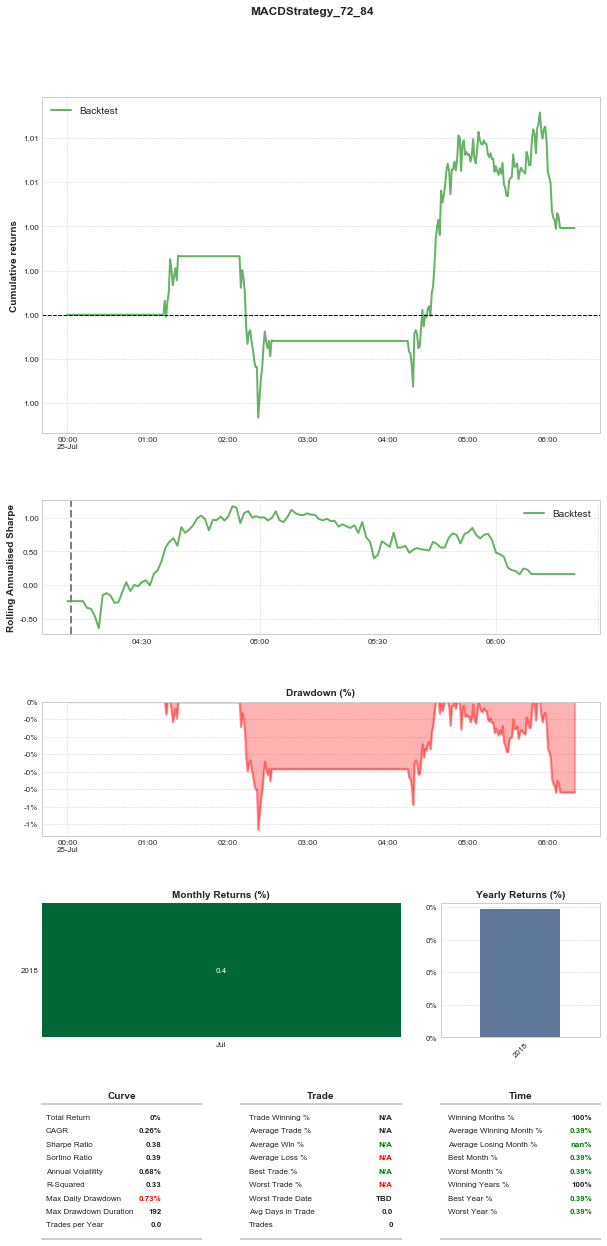

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:12:00+00:00
SHORT: 2018-07-25 01:23:00+00:00
LONG: 2018-07-25 02:11:00+00:00
SHORT: 2018-07-25 02:37:00+00:00
LONG: 2018-07-25 04:18:00+00:00
SHORT: 2018-07-25 06:14:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.2628037008
Max Drawdown: 0.7822688369
Max Drawdown Duration: 190
Total Returns: 0.0027440000


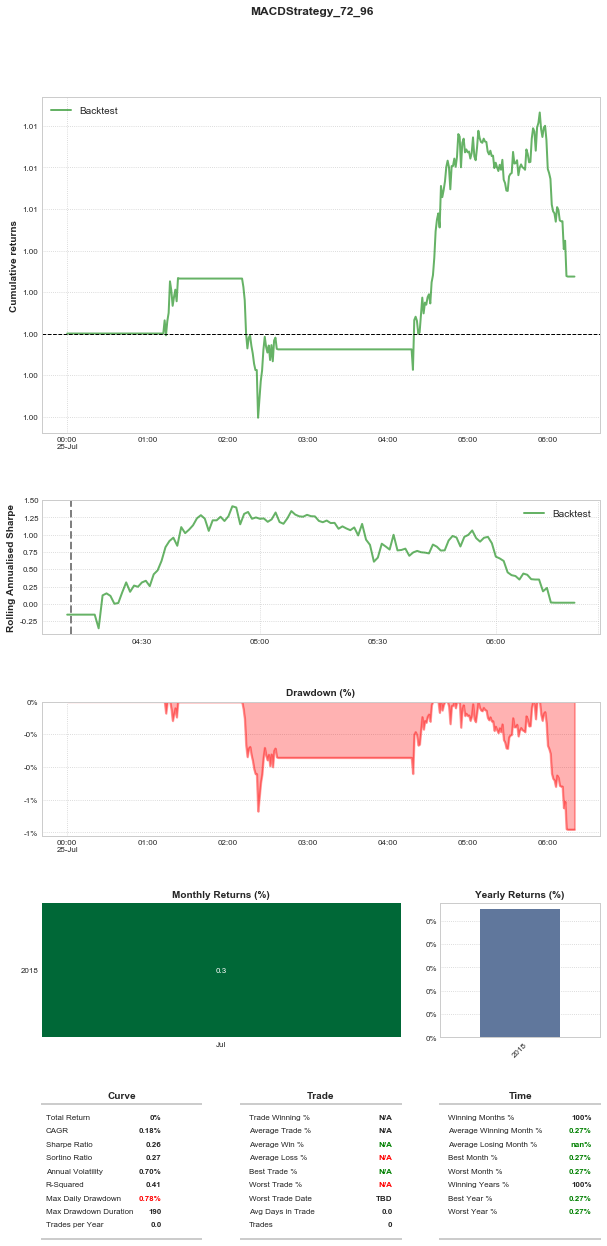

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:12:00+00:00
SHORT: 2018-07-25 01:23:00+00:00
LONG: 2018-07-25 04:21:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.3058796199
Max Drawdown: 0.9501591171
Max Drawdown Duration: 181
Total Returns: 0.0028420000


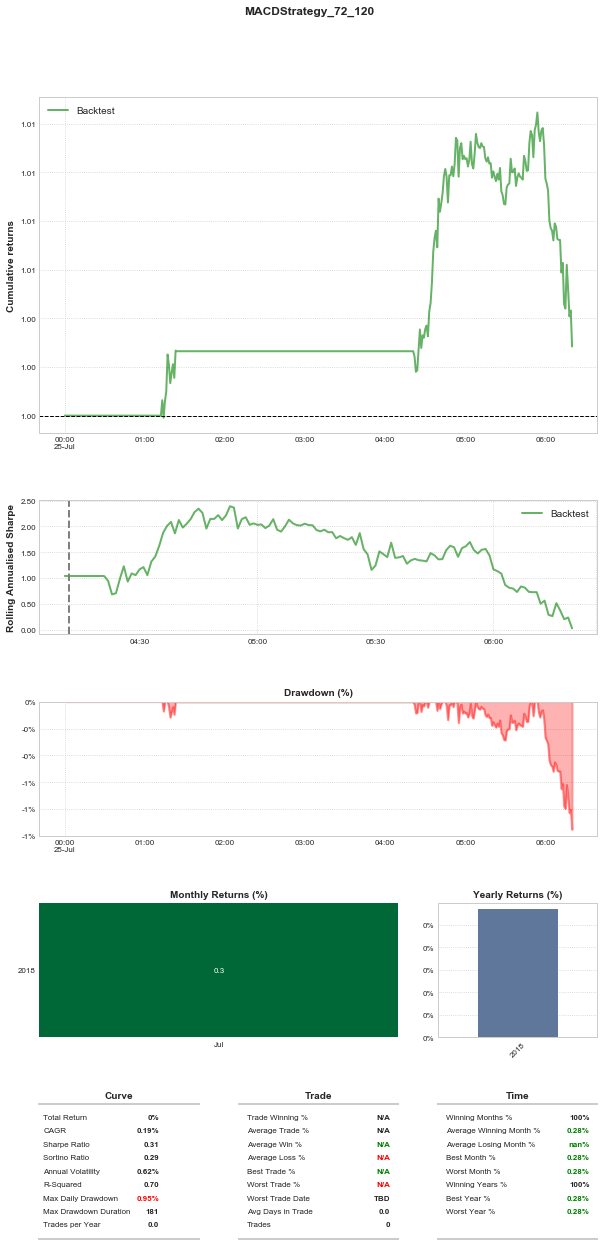

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:12:00+00:00
SHORT: 2018-07-25 01:23:00+00:00
LONG: 2018-07-25 04:42:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3848855691
Max Drawdown: 0.9559184468
Max Drawdown Duration: 199
Total Returns: -0.0032580000


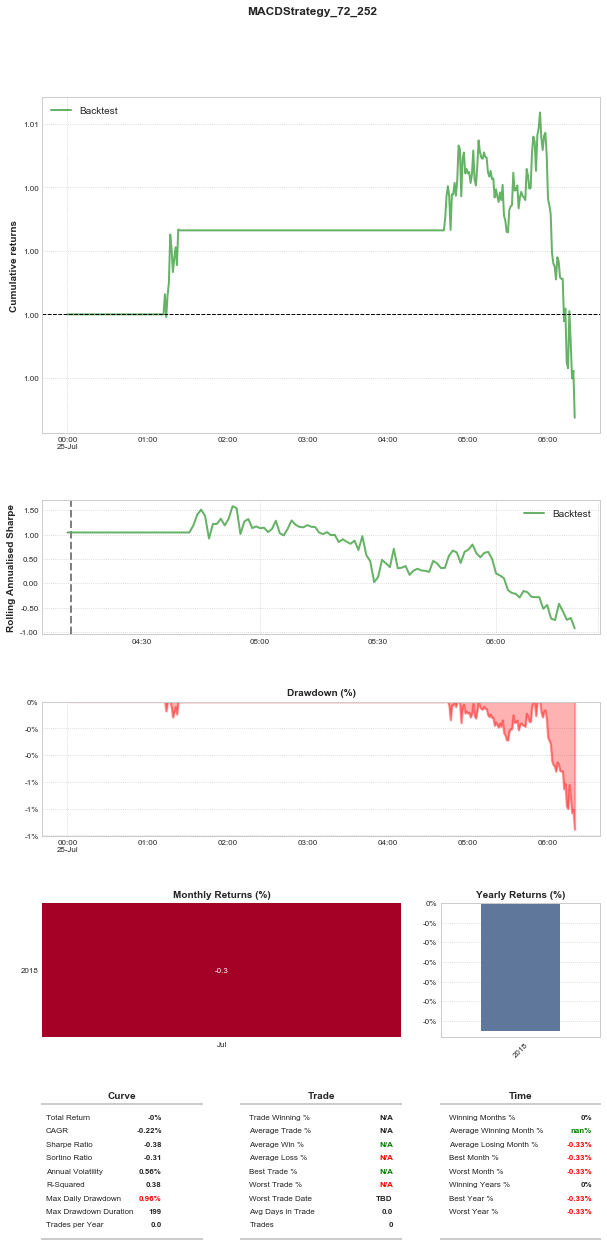

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:24:00+00:00
SHORT: 2018-07-25 01:34:00+00:00
LONG: 2018-07-25 02:22:00+00:00
SHORT: 2018-07-25 02:43:00+00:00
LONG: 2018-07-25 04:25:00+00:00
SHORT: 2018-07-25 06:17:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.2769282055
Max Drawdown: 0.7980751141
Max Drawdown Duration: 104
Total Returns: 0.0026640000


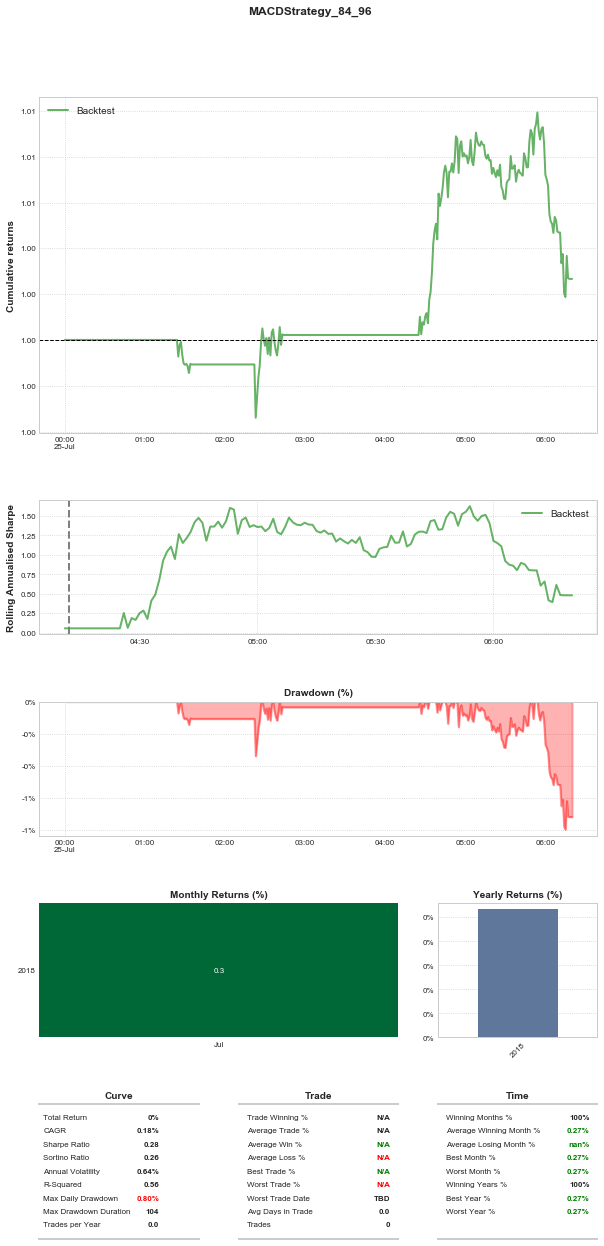

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:24:00+00:00
SHORT: 2018-07-25 01:34:00+00:00
LONG: 2018-07-25 02:36:00+00:00
SHORT: 2018-07-25 02:41:00+00:00
LONG: 2018-07-25 04:29:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1558742337
Max Drawdown: 0.9541662947
Max Drawdown Duration: 188
Total Returns: -0.0014100000


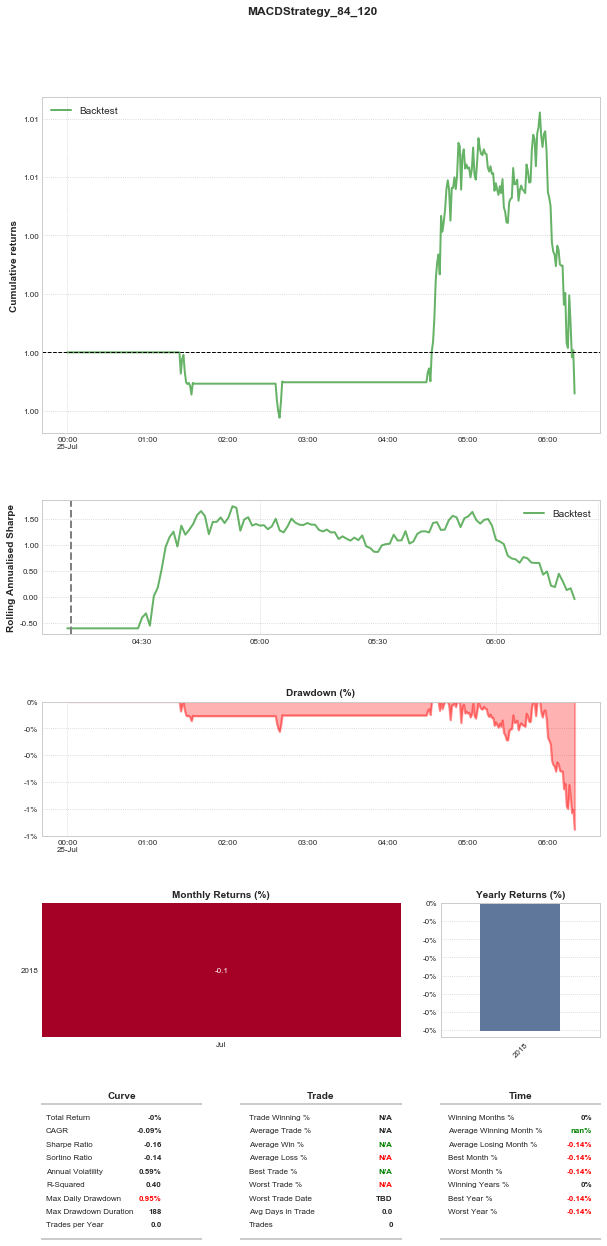

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:24:00+00:00
SHORT: 2018-07-25 01:34:00+00:00
LONG: 2018-07-25 04:47:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.9016238304
Max Drawdown: 0.9595033722
Max Drawdown Duration: 203
Total Returns: -0.0070180000


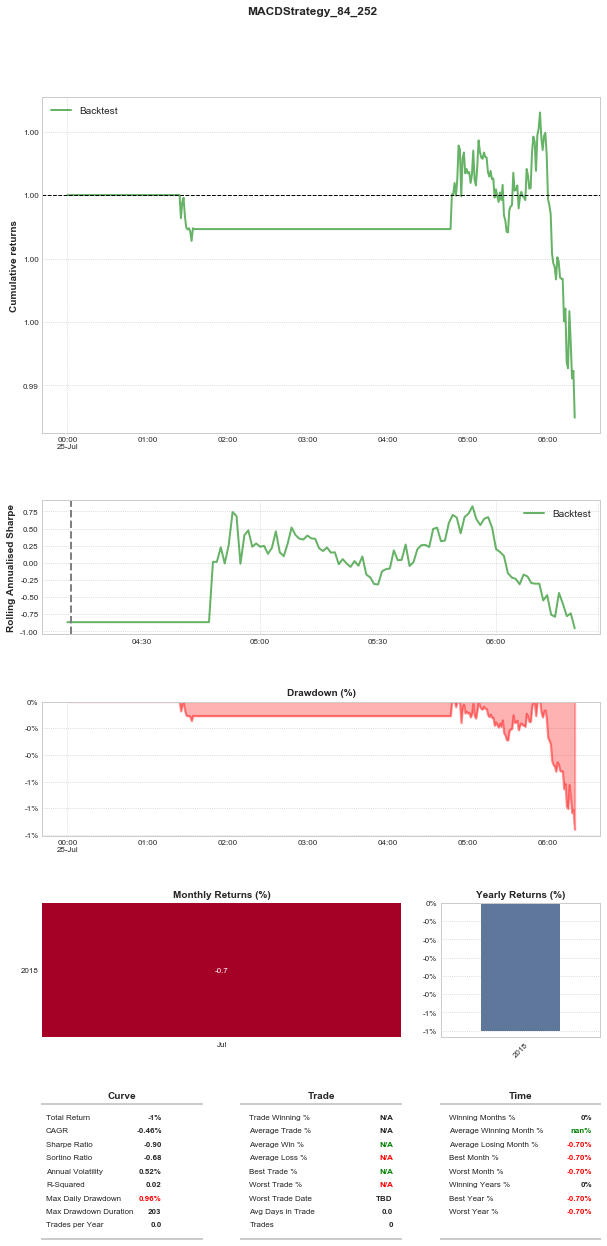

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:36:00+00:00
SHORT: 2018-07-25 01:45:00+00:00
LONG: 2018-07-25 02:45:00+00:00
SHORT: 2018-07-25 02:55:00+00:00
LONG: 2018-07-25 04:35:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.2865114695
Max Drawdown: 0.9553222971
Max Drawdown Duration: 107
Total Returns: -0.0026300000


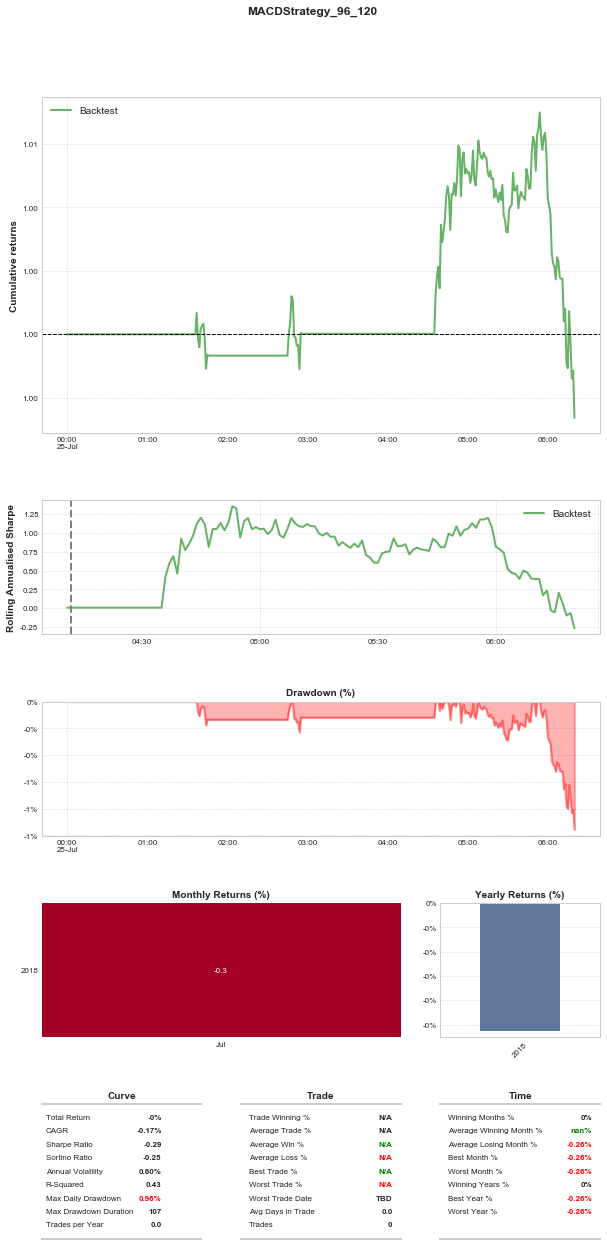

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 01:36:00+00:00
SHORT: 2018-07-25 01:45:00+00:00
LONG: 2018-07-25 04:53:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -1.2174545344
Max Drawdown: 0.9945296870
Max Drawdown Duration: 283
Total Returns: -0.0092780000


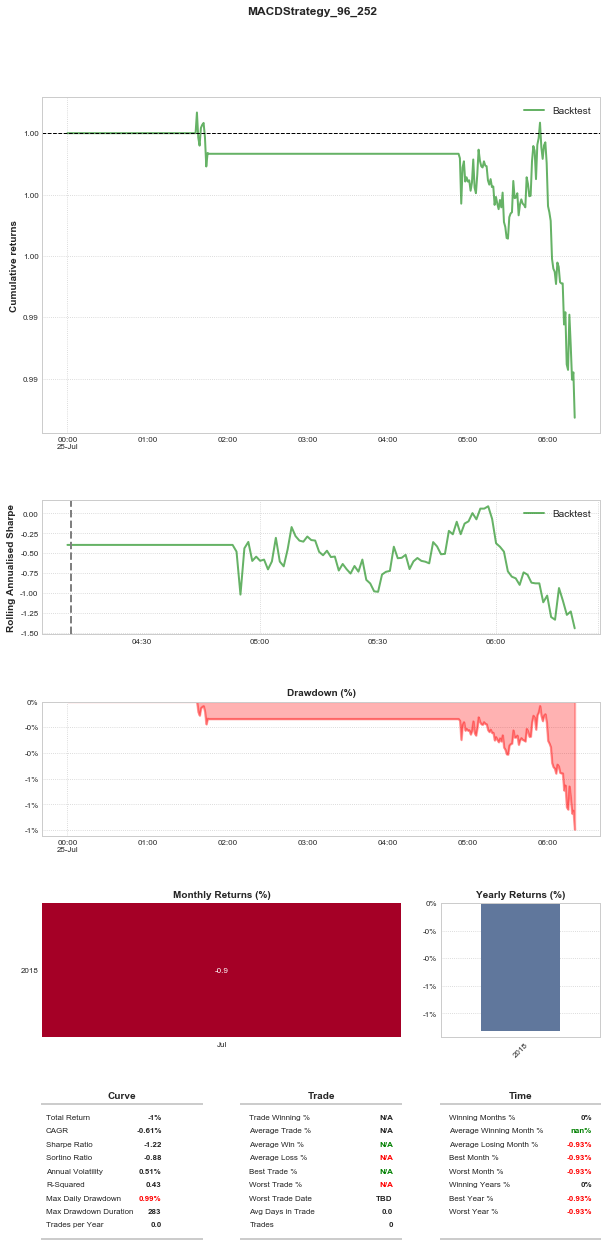

Data Time Interval:
Start Date: 2018-07-25 00:00:00+00:00
End Date: 2018-07-25 06:20:00+00:00
---------------------------------
Running Backtest...
---------------------------------
LONG: 2018-07-25 02:00:00+00:00
SHORT: 2018-07-25 02:09:00+00:00
LONG: 2018-07-25 05:06:00+00:00
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -1.4865019803
Max Drawdown: 1.0618000000
Max Drawdown Duration: 260
Total Returns: -0.0106180000


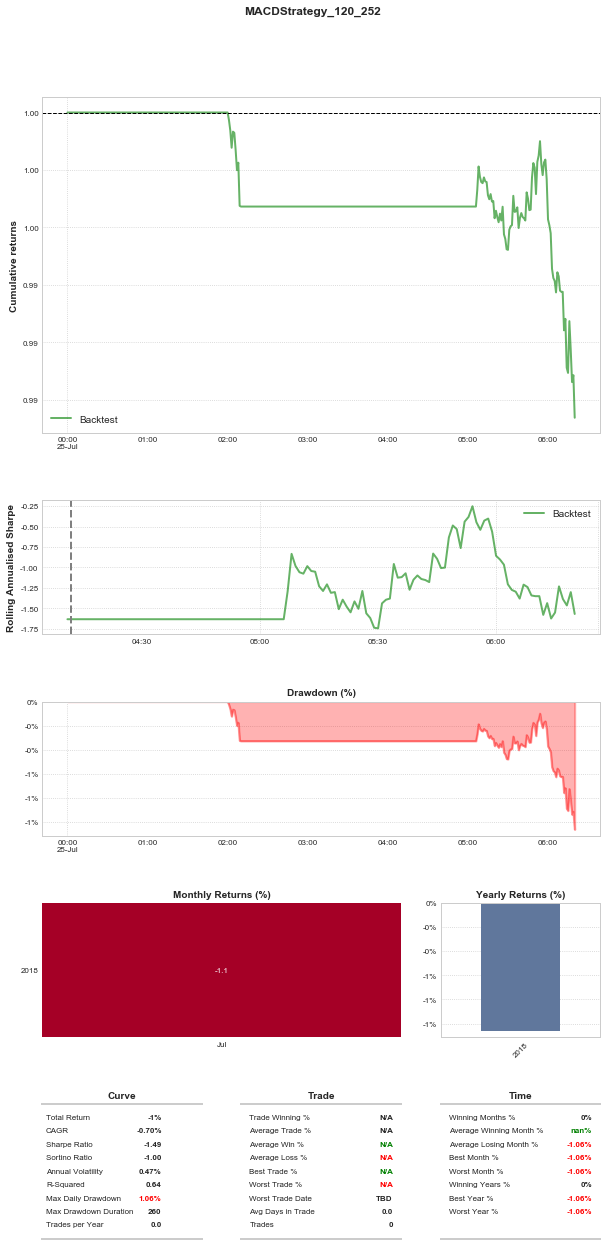

In [6]:
for i in range(len(interval)):
    for j in range(i + 1, len(interval)):
        short_window = interval[i]
        long_window = interval[j]
        config['title'] = "MACDStrategy" + "_" + str(short_window) + "_" + str(long_window)
        backtest, results = run(config, short_window = short_window, long_window = long_window)
        dict_ans = {
            'short_window': short_window, 
            'long_window': long_window, 
            'Sharpe Ratio': results['sharpe'], 
            'Total Returns': (results['cum_returns'][-1] - 1), 
            'Max Drawdown': (results["max_drawdown"] * 100.0), 
            'Max Drawdown Duration': (results['max_drawdown_duration'])
        }
        ans.append(dict_ans)
ans = pd.DataFrame(ans)

In [11]:
ans.columns

Index(['Max Drawdown', 'Max Drawdown Duration', 'Sharpe Ratio',
       'Total Returns', 'long_window', 'short_window'],
      dtype='object')

In [8]:
ans.to_csv(config['out_dir'] + "\\ans.csv")

In [14]:
ans.sort_values(by = "Total Returns", ascending=False)

Max Drawdown  Max Drawdown Duration  Sharpe Ratio  Total Returns  \
7       0.817093                    254      0.823456       0.010904   
2       0.902175                    160      0.815881       0.010560   
8       0.846870                    255      0.647261       0.008604   
5       1.015411                    255      0.618363       0.008340   
13      0.893335                    203      0.624582       0.008256   
0       0.806639                    166      0.663809       0.008092   
4       1.006081                    258      0.611445       0.007888   
3       0.744821                    162      0.622976       0.007804   
9       0.878633                    258      0.556967       0.007304   
23      0.916928                    203      0.480740       0.006232   
6       1.009455                    255      0.469884       0.006168   
10      1.030697                    271      0.335912       0.004284   
68      0.731245                    192      0.383021       0.003924   
70      0.950159                    181      0.305880       0.002842   
15      1.296013                    262      0.203214       0.002768   
69      0.782269                    190      0.262804       0.002744   
72      0.798075                    104      0.276928       0.002664   
12      0.954643                    327      0.210637       0.002604   
14      1.292629                    263      0.190013       0.002476   
16      1.178773                    258      0.150953       0.002040   
1       1.235962                    359      0.156616       0.001904   
66      0.951042                    183      0.186114       0.001902   
64      1.070414                    206      0.096838       0.001064   
18      1.190716                    331      0.040831       0.000504   
65      0.942508                    209      0.009381       0.000064   
11      0.952790                    270      0.007801       0.000046   
25      1.184748                    263     -0.005614      -0.000136   
63      1.295591                    261     -0.048692      -0.000596   
73      0.954166                    188     -0.155874      -0.001410   
19      1.383794                    359     -0.099743      -0.001436   
..           ...                    ...           ...            ...   
37      1.292149                    353     -0.445129      -0.006228   
40      1.218964                    326     -0.484167      -0.006616   
54      1.609800                    345     -0.521197      -0.006956   
74      0.959503                    203     -0.901624      -0.007018   
61      1.003800                    239     -0.635801      -0.007178   
22      1.237890                    359     -0.621053      -0.007570   
38      1.552099                    353     -0.549113      -0.007576   
27      1.602929                    359     -0.557934      -0.007780   
36      1.466116                    353     -0.597332      -0.008428   
35      1.078191                    265     -0.601006      -0.008528   
30      1.858983                    359     -0.621204      -0.008536   
33      2.005211                    353     -0.636791      -0.008596   
62      0.961325                    307     -0.917700      -0.008918   
59      1.849800                    335     -0.718819      -0.008976   
76      0.994530                    283     -1.217455      -0.009278   
42      1.554200                    350     -0.729374      -0.009788   
49      0.987800                    350     -0.856205      -0.009878   
48      1.423000                    350     -0.739897      -0.009916   
60      1.845800                    335     -0.811361      -0.009956   
34      1.915228                    353     -0.762713      -0.010264   
44      1.539000                    350     -0.752225      -0.010608   
77      1.061800                    260     -1.486502      -0.010618   
46      1.895000                    350     -0.775910      -0.011056   
32      1.518774                    359     

In [57]:
short_ma = backtest.strategy.short_ma

In [58]:
long_ma = backtest.strategy.long_ma

In [63]:
ma = pd.DataFrame({"short": short_ma, "long": long_ma, "signal": short_ma > long_ma}, index=short_ma.index)

In [70]:
ma.head(10)

long       short  signal
2018-07-25 00:00:00+00:00    0.000000    0.000000   False
2018-07-25 00:01:00+00:00  480.265000  480.265000   False
2018-07-25 00:02:00+00:00  480.346667  480.346667   False
2018-07-25 00:03:00+00:00  480.562500  480.562500   False
2018-07-25 00:04:00+00:00  480.706000  480.706000   False
2018-07-25 00:05:00+00:00  480.785000  480.785000   False
2018-07-25 00:06:00+00:00  480.958571  480.958571   False
2018-07-25 00:07:00+00:00  481.077500  481.077500   False
2018-07-25 00:08:00+00:00  481.228889  481.228889   False
2018-07-25 00:09:00+00:00  481.355000  481.355000   False

In [53]:
signal = short_ma > long_ma

In [54]:
-signal.loc[np.diff(signal, 1)]

2018-07-25 00:09:00+00:00     True
2018-07-25 00:37:00+00:00    False
2018-07-25 01:18:00+00:00     True
2018-07-25 01:42:00+00:00    False
2018-07-25 01:48:00+00:00     True
2018-07-25 02:11:00+00:00    False
2018-07-25 03:38:00+00:00     True
2018-07-25 05:21:00+00:00    False
2018-07-25 05:47:00+00:00     True
2018-07-25 06:03:00+00:00    False
dtype: bool